### IMPORTING LIBRARIES


## IMPORTING WARNINGS AS WEDON'T WANT TO GET DISTURBED BY AWHOLE LOT OF WARNINGS

In [1]:
import warnings
warnings.filterwarnings("ignore")

## importing the actual libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

## READ APPLICATION.CSV

In [3]:
app_data = pd.read_csv("application_data.csv")
app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

# DATA INSPECTION IN APPLICATOIN DATASET

### GET INFO AND SHAPE ON THE DATASET

In [4]:
app_data.info()
app_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


(307511, 122)

# DATA QUALITY CHECK

### CHECK FOR PERCENTAGE NULL VALUES IN APPLICATION DATASET

In [5]:
pd.set_option("display.max_rows",200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### CONCLUSION : COLUMNS WITH NULL VALUUES MORE THAN 47% MAY GIVE WRONG INSIGHTS, HENCE WE HAVE TO DROP THEM

## DROPPING COLUMNS WITH MISSING VALUES GREATER THAN 47%

In [6]:
PERCENTAGE = 47
threshold = int((100 - PERCENTAGE)/100 * app_data.shape[0] + 1)
app_df = app_data.dropna(axis= 1,thresh=threshold)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [7]:
app_df.shape

(307511, 73)

In [8]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### IMPUTE THE MISSING VALUES

#### CHECK THE MISSING VALUES IN APPLICATION DATASET 

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### CONCLUSION:OCCUPATION_TYPE HAS 31% OF MISSING VALUES , SINCE ITS A CATEGORICAL COLUMN, IMPUTE IT WITH OTHER OR UNKNOWN VALUES

In [10]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [11]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [12]:
app_df.OCCUPATION_TYPE.fillna("Others",inplace=True)

In [13]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [14]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

#### EXT_SOURCE_3 COLUMN HAS 19% MISSING VALUES

In [15]:
app_df.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

In [16]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: proportion, Length: 814, dtype: float64

In [17]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

## sns.boxplot(x=app_df.EXT_SOURCE_3)
plt.show()

- SINCE IT'S A NUMERICAL COLUMN WITH NO OUTLIERS, AND THERE IDS NOT MUCH DIFFERENCE BETWEEN MEAN AND MEDIAN, HENCE WE CAN IMPUTE WITH MEAN OR MEDIAN

In [18]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

In [19]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [20]:
null_cols = list(app_df.isna().any())
len(null_cols) 

73

In [21]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### HANDLING MISSNG VALUES IN COLUMNS WITH 13% NULL VALUES

In [22]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [23]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY  .value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [24]:
Cols =  ["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON" ,"AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR" ]

In [25]:
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace = True)

In [26]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


### HANDLING MISSNG VALUES VALUES LESS THAN 1%

In [27]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [28]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [29]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: proportion, Length: 119831, dtype: float64

In [30]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
29.0      0.000326
47.0      0.000326
348.0     0.000326
Name: proportion, dtype: float64

### Conclusion :
            1. FOR CATEGORICAL COLUMNS,IMPUTE THE MISSIMG VALUES WITH MODE
            2. FOR NUMERICAL COLUMNS,IMPUTE THE MISSIMG VALUES WITH MEDIAN

In [31]:
 app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace = True)

In [32]:
 app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0],inplace = True)

### IMPUTING NUMERICAL COLUMNS

In [33]:
 app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.mode()[0],inplace = True)
 app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.mode()[0],inplace = True)
 app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.mode()[0],inplace = True)
 app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)
 app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)
 app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)
 app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)
 app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True)

In [34]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [35]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

## CONVERT NEGATIVE VALUES TO POSITIVE IN DAYS VARIABLE SO THAT MEDIAN IS NOT AFFECTED  

In [36]:
app_df.DAYS_BIRTH =  app_df.DAYS_BIRTH.apply(lambda x : abs(x))
app_df.DAYS_EMPLOYED =  app_df.DAYS_EMPLOYED.apply(lambda x : abs(x))
app_df.DAYS_ID_PUBLISH =  app_df.DAYS_ID_PUBLISH.apply(lambda x : abs(x))
app_df.DAYS_REGISTRATION =  app_df.DAYS_REGISTRATION.apply(lambda x : abs(x))
app_df.DAYS_LAST_PHONE_CHANGE =  app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x : abs(x))


### BINNING OF CONTINUOUS VARIABLES

#### STANDARDIZING DAYS COLUMN IN YEARS FOR EASY BINNING

In [37]:
app_df["YEARS_BIRTH"] = app_df.DAYS_BIRTH.apply(lambda x: int(x//356))
app_df["YEARS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply(lambda x: int(x//356))
app_df["YEARS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply(lambda x: int(x//356))
app_df["YEARS_ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//356))
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//356))


### BINNING AMT_CREDIT COLUMN

In [38]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [39]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [40]:
app_df["AMT_CREDIT_CATEGORY"] = pd.cut(app_df.AMT_CREDIT, [0, 200000, 400000, 600000, 800000, 1000000], labels= ["VERY LOW CREDIT", "LOW CREDIT", "MEDIUM CREDIT", "HIGH CREDIT", "VERY HIGH CREDIT"])

In [41]:
app_df.AMT_CREDIT_CATEGORY.value_counts(normalize=True)*100

AMT_CREDIT_CATEGORY
LOW CREDIT          31.511770
MEDIUM CREDIT       25.733324
HIGH CREDIT         16.791314
VERY LOW CREDIT     14.035088
VERY HIGH CREDIT    11.928504
Name: proportion, dtype: float64

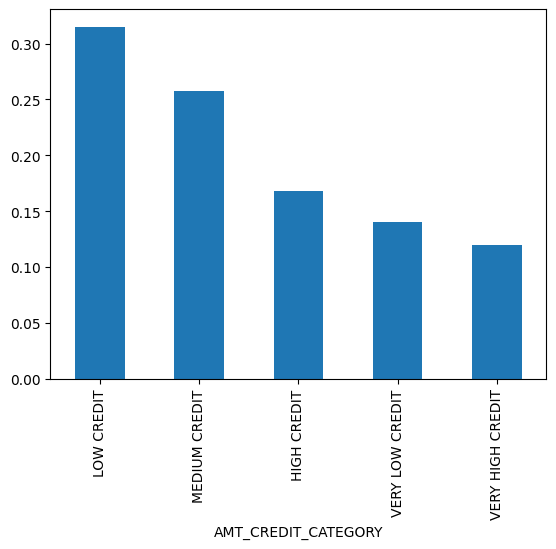

In [42]:
app_df["AMT_CREDIT_CATEGORY"].value_counts(normalize= True).plot.bar()
plt.show()

- CONCCLSION : THE CREDIT AMOUNT OF LOAN FOR THE AMOUNT  LOW (2L - 4L) AND VERY HIGH (ABOVE 8L)  

### BINNING YEAR_BIRTH COLUMN

In [43]:
app_df["AGE_CATEGORY"] = pd.cut(app_df.YEARS_BIRTH,[0, 25, 45, 65, 85],
                               labels=["BELOW 25","25 - 45","45 -65","65 -85"])

In [44]:
app_df.AGE_CATEGORY.value_counts(normalize=True)*100

AGE_CATEGORY
25 - 45     50.094143
45 -65      41.772489
BELOW 25     4.426834
65 -85       3.706534
Name: proportion, dtype: float64

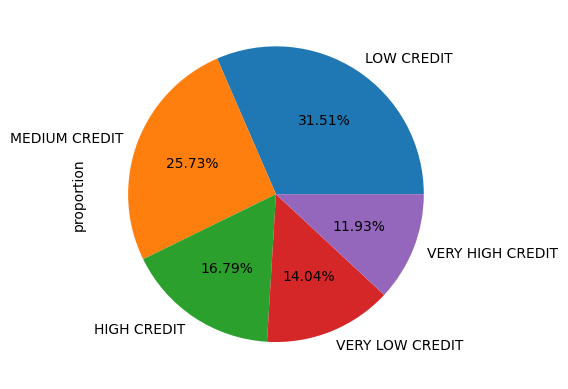

In [45]:
app_df["AMT_CREDIT_CATEGORY"].value_counts(normalize= True).plot.pie(autopct = '%1.2f%%')
plt.show()

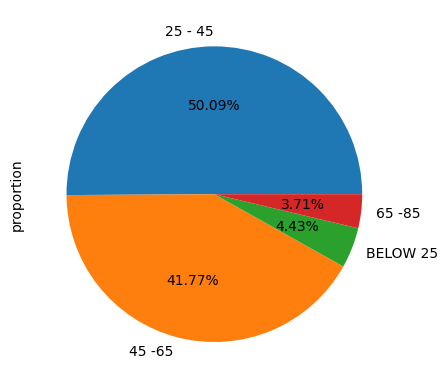

In [46]:
app_df["AGE_CATEGORY"].value_counts(normalize= True).plot.pie(autopct = '%1.2f%%')
plt.show()

- CONCLUSION : MOST OF THE APPLICANTS ARE BETWEEN 25 -45 YEARS AGE GROUP

### DATA IMBALANCE CHECK

In [47]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### DIVIDING APPLICATION WITH TARGET VALUES 0 AND 1

In [48]:
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [49]:
app_df.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

- CONCLUSION : 1 OUT 9/10 APPLICANTS ARE DEFAULTERS

### UNIVARIATE ANALYSIS

In [50]:
cat_columns = list(app_df.columns[app_df.dtypes == np.object_])
num_columns = list(app_df.columns[app_df.dtypes == np.int64]) +list(app_df.columns[app_df.dtypes == np.float64])

In [51]:
num_columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


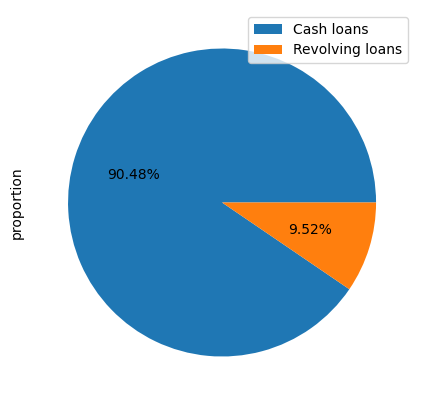

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


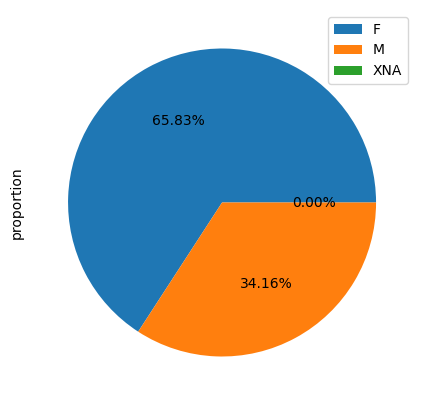

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


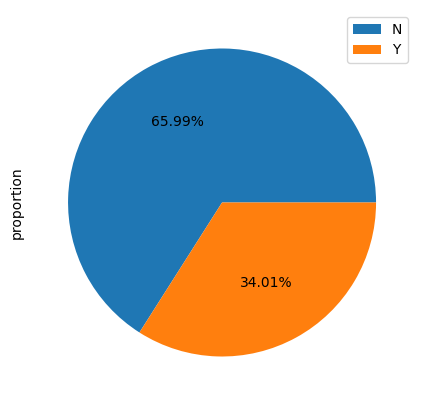

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


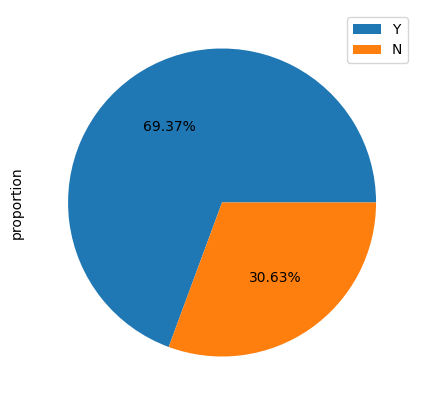

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


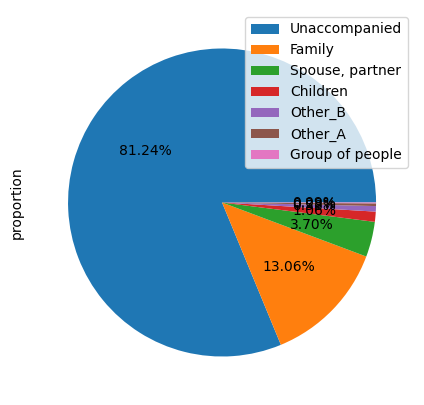

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


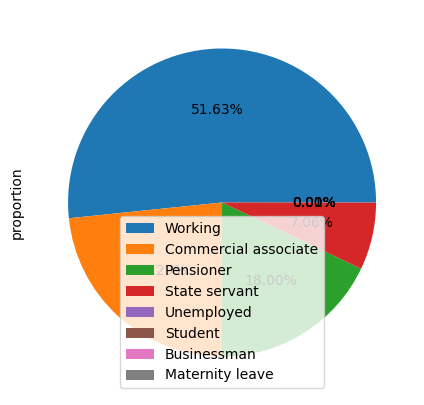

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


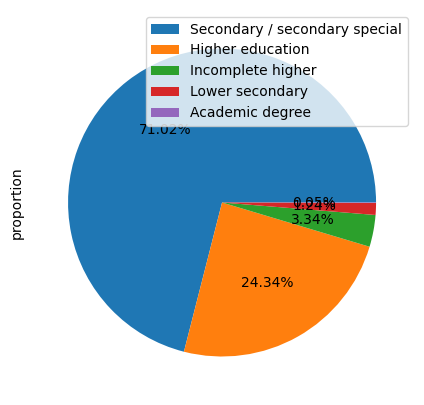

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


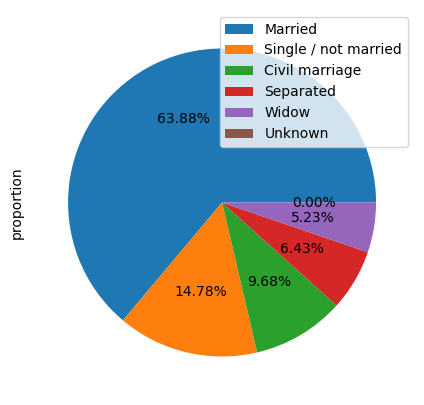

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


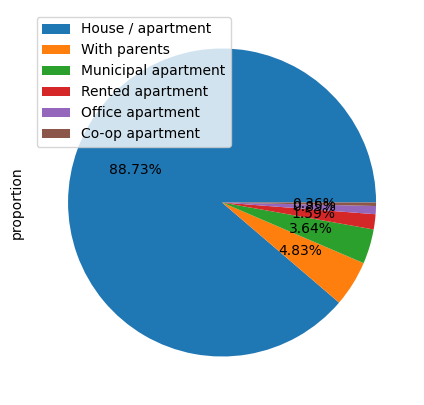

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


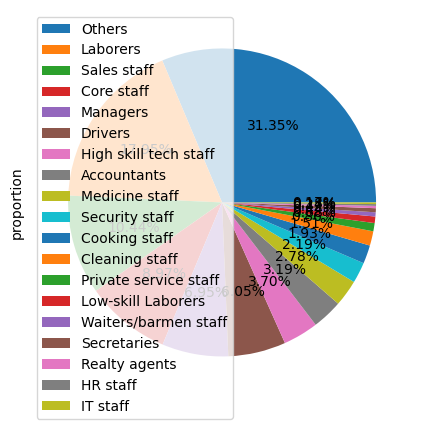

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


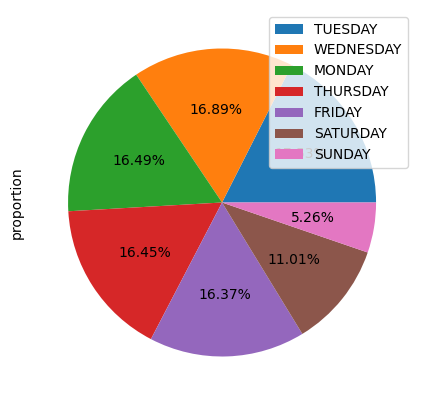

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

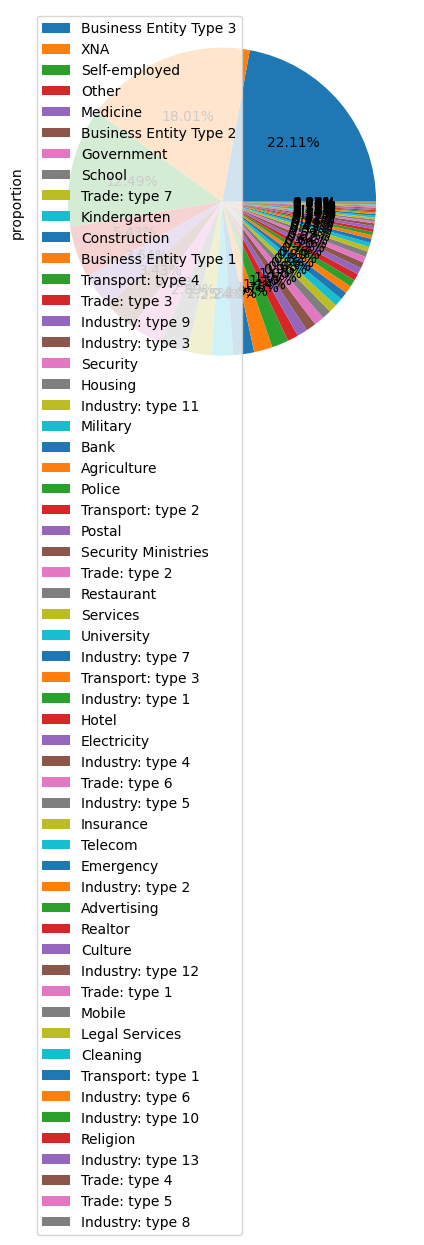

In [52]:
for col in cat_columns:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance = None, autopct = '%1.2f%%')
    plt.legend()
    plt.show()

- CONCLUSION
1. NAME_CONTRACT_TYPE : MORE APPLICATIONS HAVE CASH LOANS THAN REVOLVING LOANS
2. CODE_GENDER : NO. OF FEMALE APPLICANTS ARE MORE THAN THAT OF MALE APPLICANTS
3. FLAG_OWN_CAR : MOST(70%) APPLICANTS DON'T OWN A CAR
4. FLAG_OWN_REALTY : MOST (70% APPLICANTS DON'T OWN A HOUSE)
5. NAME_TYPE_SUITE : MOST (81%) APPLICANTS ARE UNACCOMPANIED
6. NAME_INCOME_TYPE : MOST (51% APPLICANTS ARE EARING THIER INCOME FORM WORK)
7. NAME_EDUCATION_ TYPE : 70% OF APPLICANTS HAVE COMPLETED SECONDARY/SECONDARY SPECIAL EDUCATION
8. NAME_FAMILY_STATUS : 63 % OF APPLICANTS ARE MARRIED
9. NAME_HOUSING_TYPE : 88% OF HOUSING TYPE OF APPLICNTS ARE HOUSE/APARTMENT
10. OCCUPATION_TYPE : MSOT(31%) APPLICANT S HAVE OTHER OCCPATION TYPE
11. WEEKDAY_APPR_PROCESS_START :MSOT APPLICANT HAVE APPLIED FOR LOAN ON TUESDAY
12. ORGANISATION_TYPE : MOST OF THE ORRGANISATION TYPE OF EMPLOYEES ARE BUSINESS ENTITY TYPE 3 

### PLOT ON NUMERICAL COLUMNS

  #### CATEGORIZING COLUMNS WITH AND WITHOUT FLAGS

In [53]:
num_cols_withoutflag = []  
num_cols_withflag = [] 
for col in num_columns:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)
        

In [54]:
 num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

# num_cols_withoutflag

count    307511.000000
mean          0.999997
std           0.001803
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_MOBIL, dtype: float64


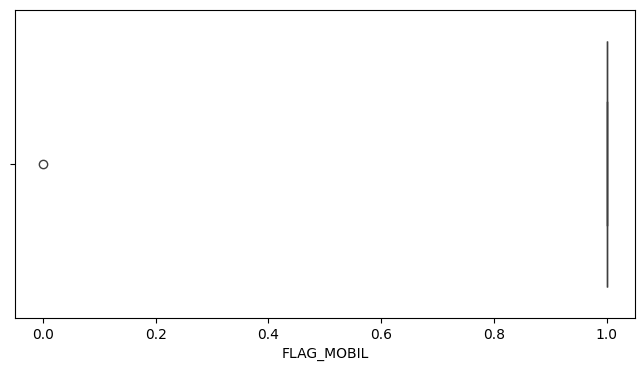

_____________________________
count    307511.000000
mean          0.819889
std           0.384280
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_EMP_PHONE, dtype: float64


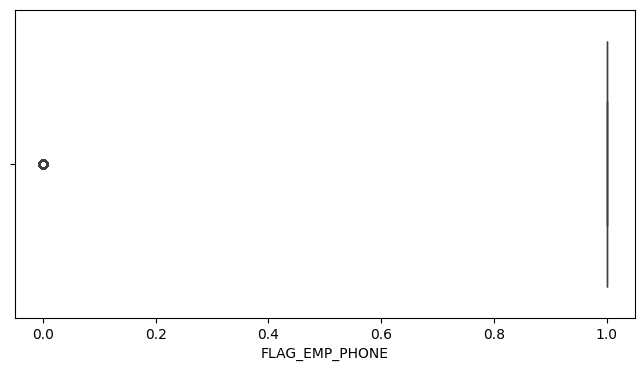

_____________________________
count    307511.000000
mean          0.199368
std           0.399526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_WORK_PHONE, dtype: float64


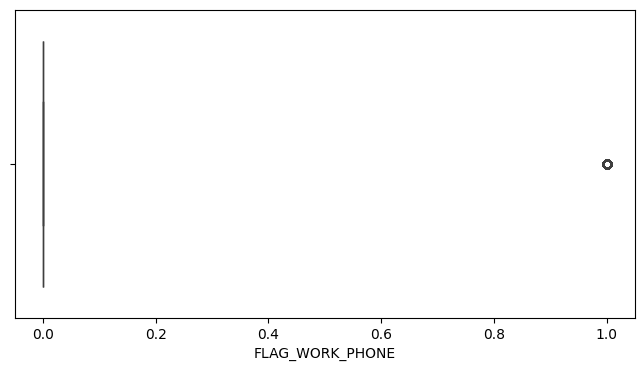

_____________________________
count    307511.000000
mean          0.998133
std           0.043164
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_CONT_MOBILE, dtype: float64


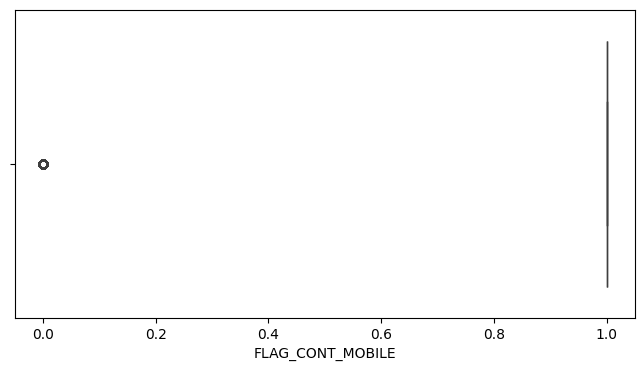

_____________________________
count    307511.000000
mean          0.281066
std           0.449521
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: FLAG_PHONE, dtype: float64


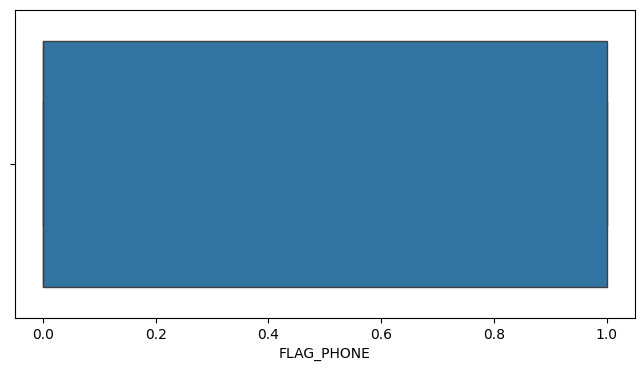

_____________________________
count    307511.000000
mean          0.056720
std           0.231307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64


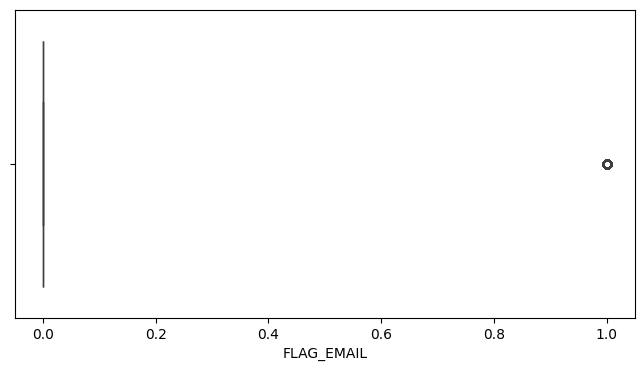

_____________________________
count    307511.000000
mean          0.000042
std           0.006502
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_2, dtype: float64


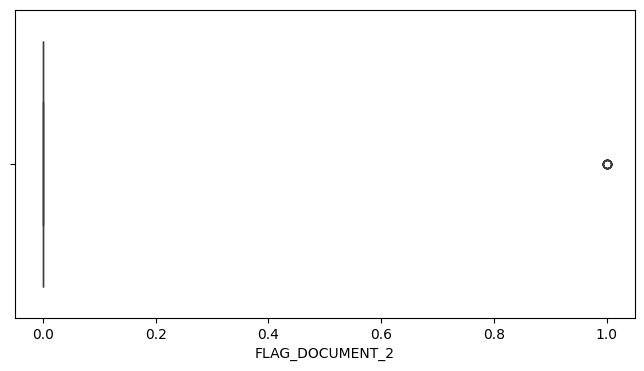

_____________________________
count    307511.000000
mean          0.710023
std           0.453752
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_DOCUMENT_3, dtype: float64


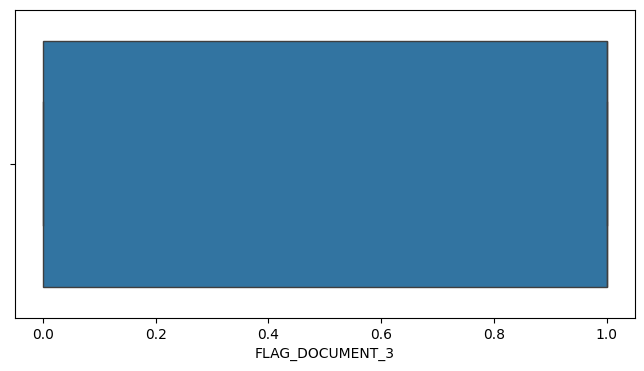

_____________________________
count    307511.000000
mean          0.000081
std           0.009016
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_4, dtype: float64


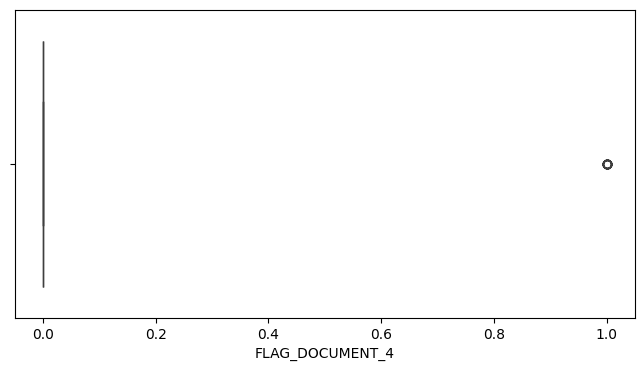

_____________________________
count    307511.000000
mean          0.015115
std           0.122010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_5, dtype: float64


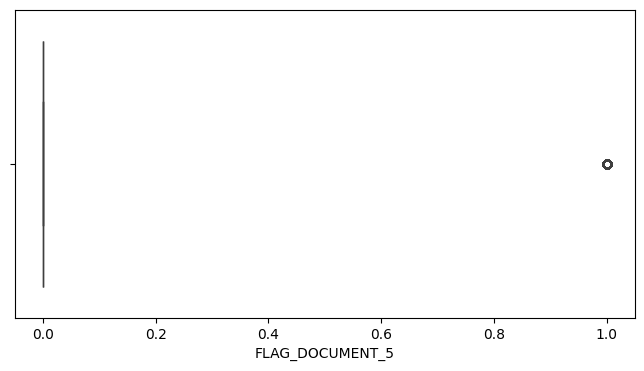

_____________________________
count    307511.000000
mean          0.088055
std           0.283376
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_6, dtype: float64


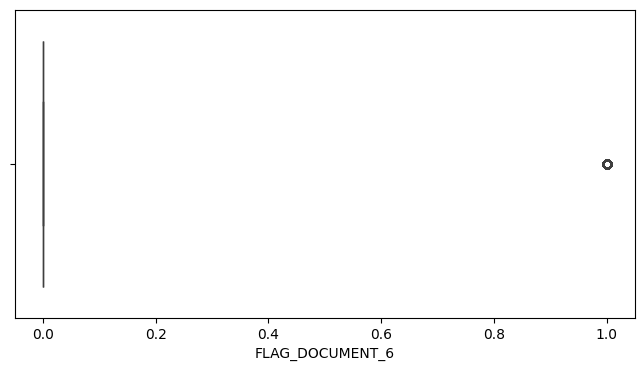

_____________________________
count    307511.000000
mean          0.000192
std           0.013850
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_7, dtype: float64


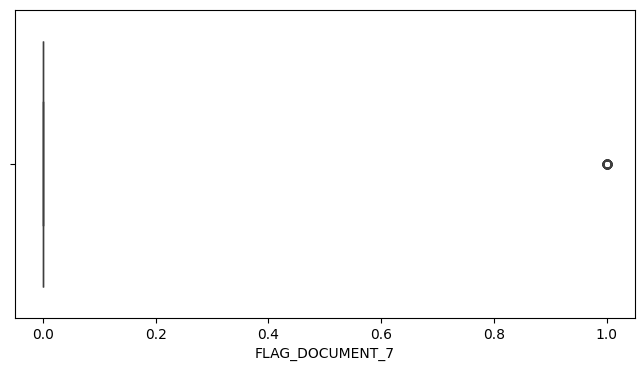

_____________________________
count    307511.000000
mean          0.081376
std           0.273412
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_8, dtype: float64


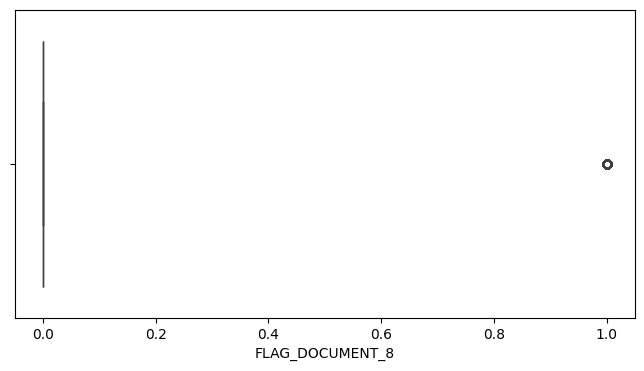

_____________________________
count    307511.000000
mean          0.003896
std           0.062295
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_9, dtype: float64


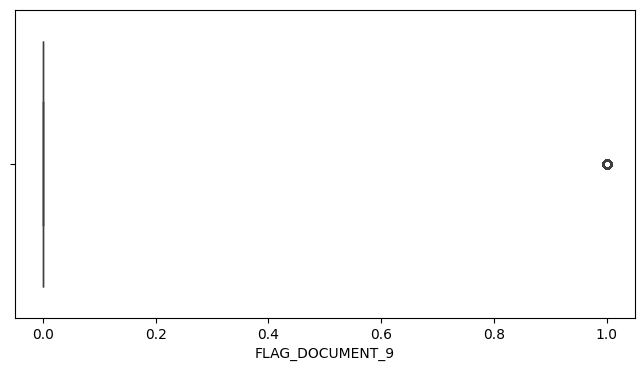

_____________________________
count    307511.000000
mean          0.000023
std           0.004771
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_10, dtype: float64


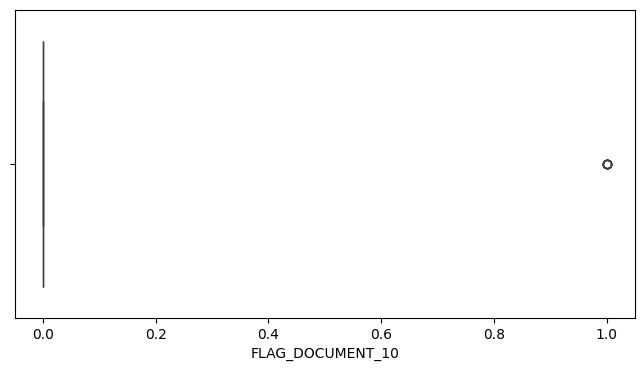

_____________________________
count    307511.000000
mean          0.003912
std           0.062424
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_11, dtype: float64


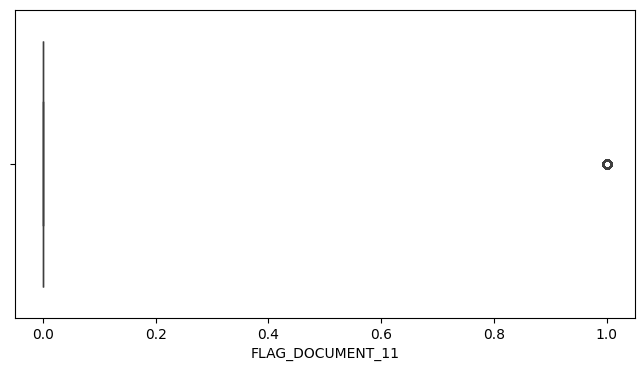

_____________________________
count    307511.000000
mean          0.000007
std           0.002550
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_12, dtype: float64


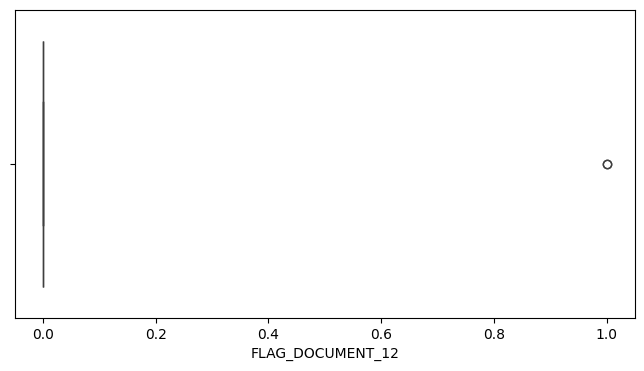

_____________________________
count    307511.000000
mean          0.003525
std           0.059268
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_13, dtype: float64


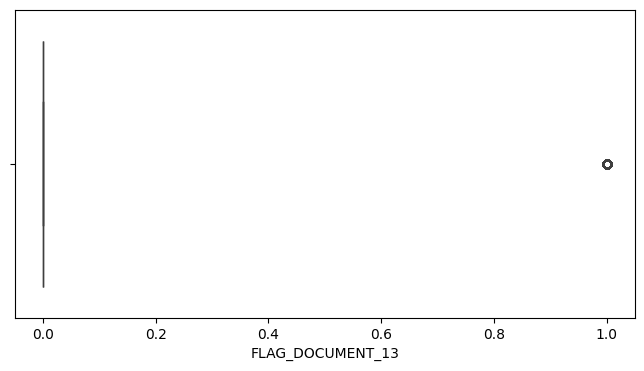

_____________________________
count    307511.000000
mean          0.002936
std           0.054110
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_14, dtype: float64


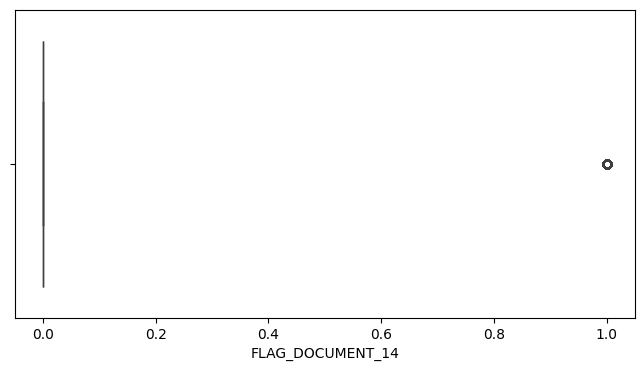

_____________________________
count    307511.00000
mean          0.00121
std           0.03476
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: FLAG_DOCUMENT_15, dtype: float64


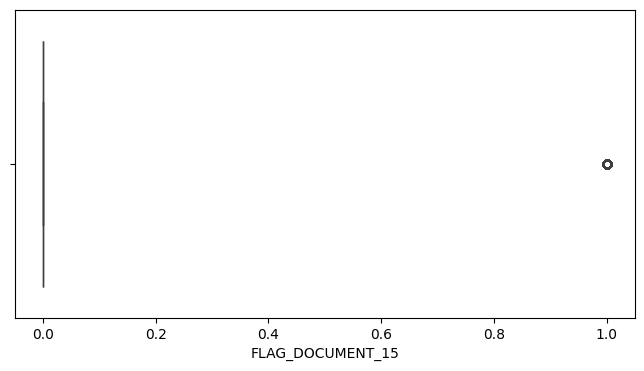

_____________________________
count    307511.000000
mean          0.009928
std           0.099144
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_16, dtype: float64


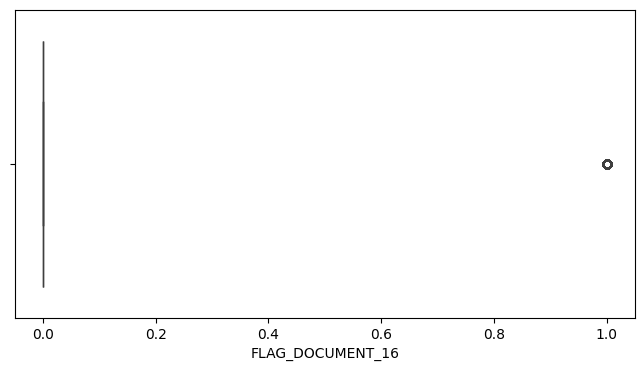

_____________________________
count    307511.000000
mean          0.000267
std           0.016327
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_17, dtype: float64


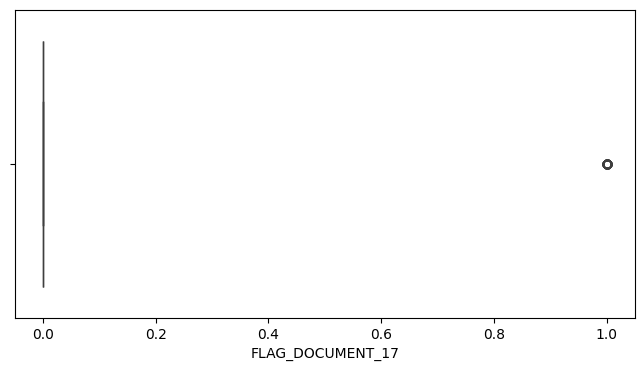

_____________________________
count    307511.000000
mean          0.008130
std           0.089798
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_18, dtype: float64


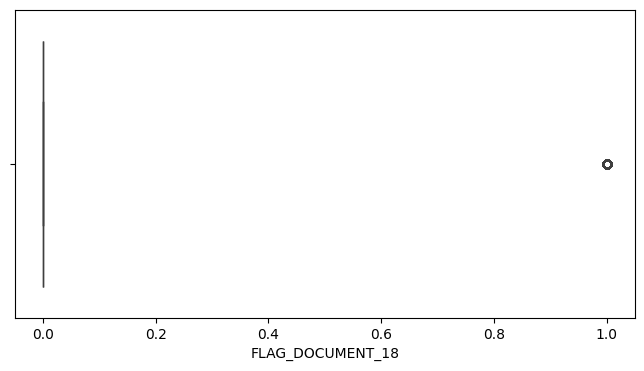

_____________________________
count    307511.000000
mean          0.000595
std           0.024387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_19, dtype: float64


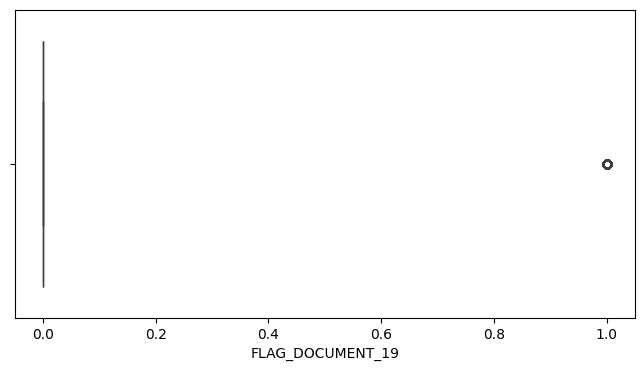

_____________________________
count    307511.000000
mean          0.000507
std           0.022518
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_20, dtype: float64


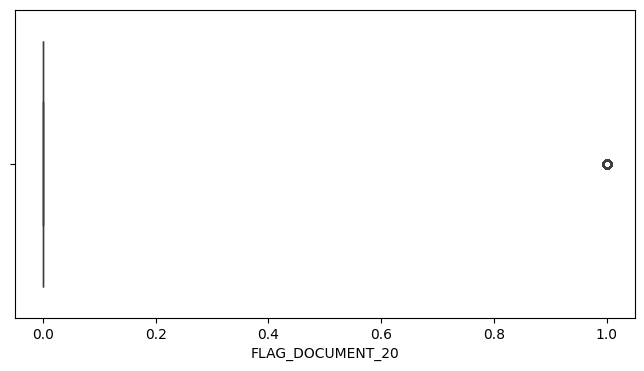

_____________________________
count    307511.000000
mean          0.000335
std           0.018299
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_21, dtype: float64


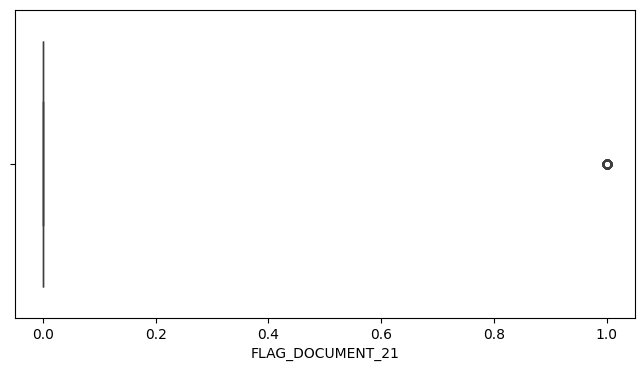

_____________________________


In [55]:
for col in num_cols_withflag:
    print(app_df[col].describe())
    plt.figure(figsize=[8,4])
    sns.boxplot(data=app_df,x = col)
    plt.show()
    print("_____________________________")

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


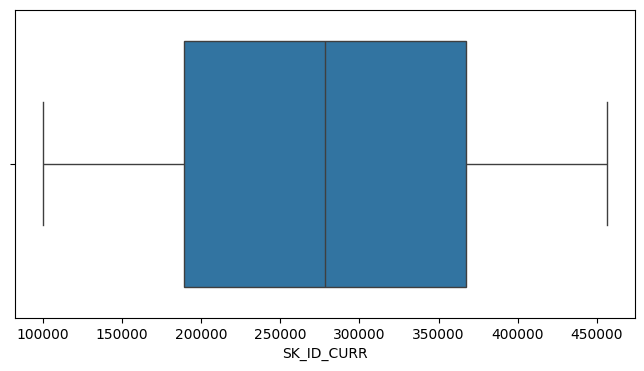

_____________________________
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


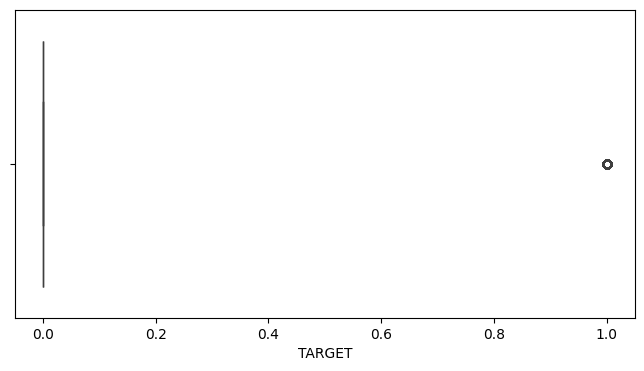

_____________________________
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


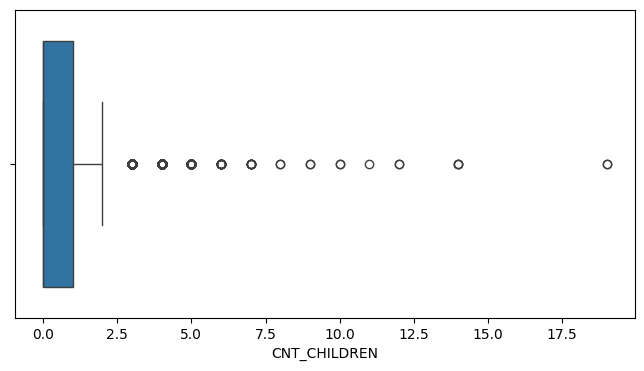

_____________________________
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


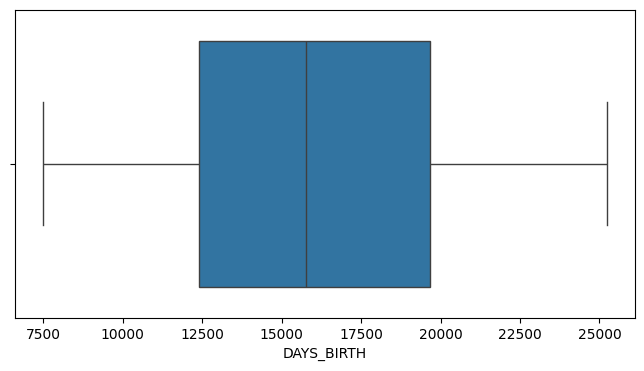

_____________________________
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


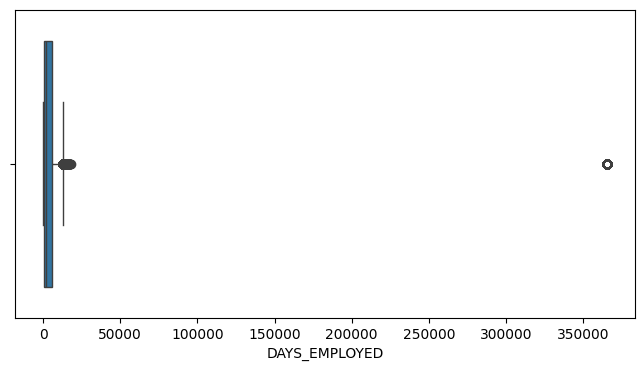

_____________________________
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


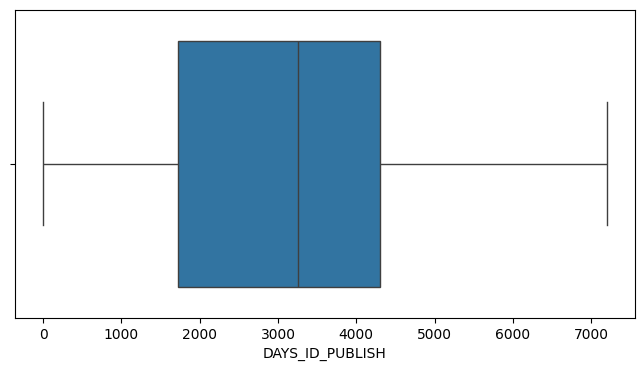

_____________________________
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


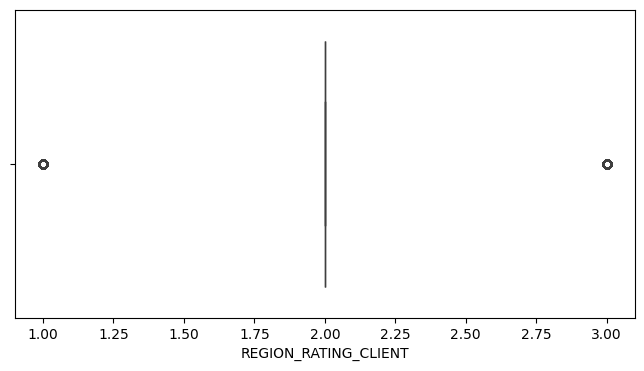

_____________________________
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


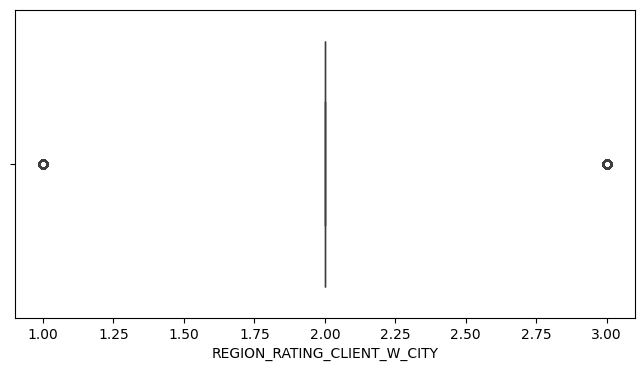

_____________________________
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


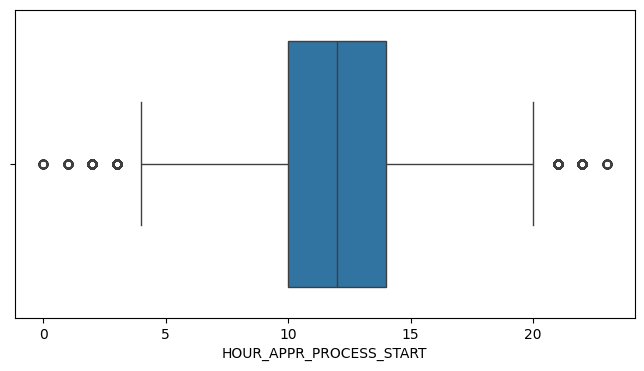

_____________________________
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


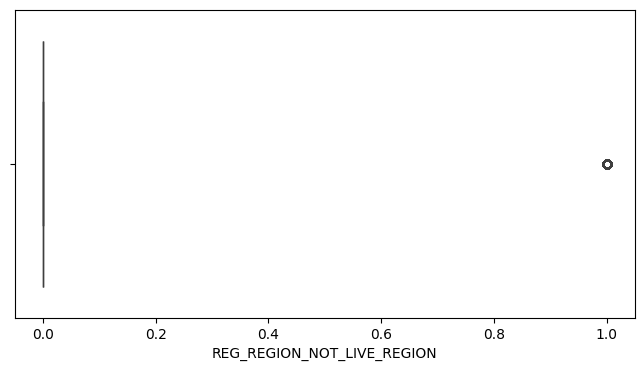

_____________________________
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


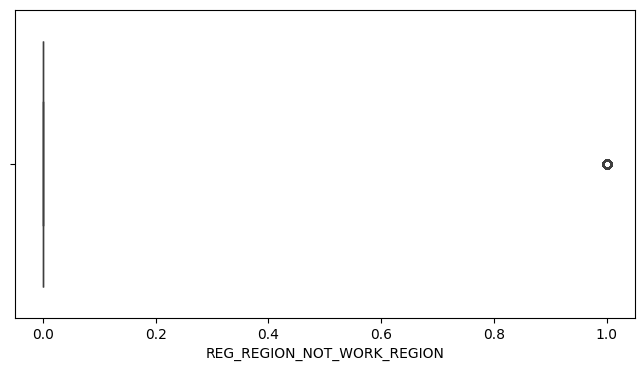

_____________________________
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


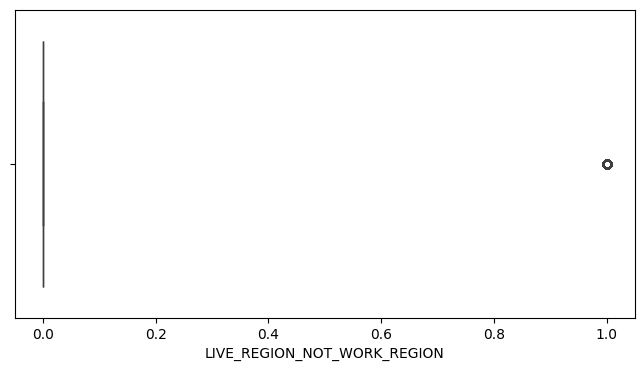

_____________________________
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


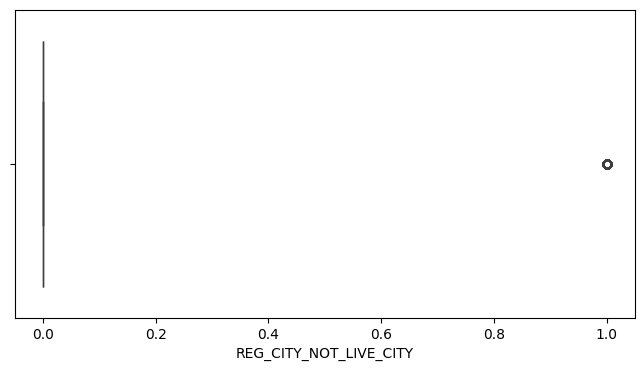

_____________________________
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


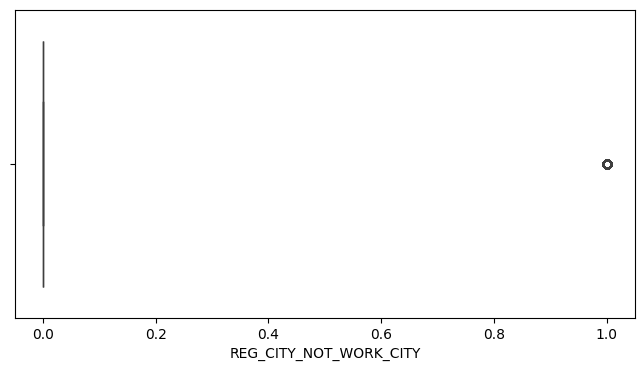

_____________________________
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


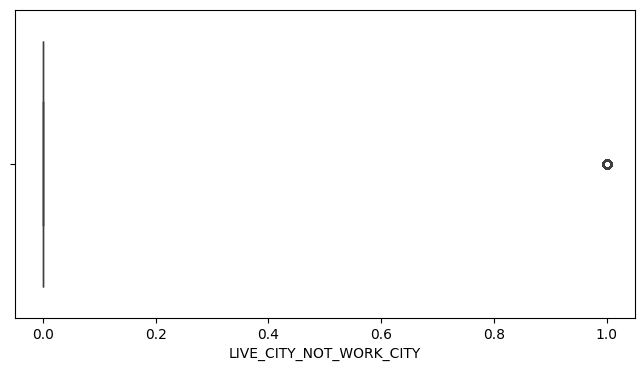

_____________________________
count    307511.000000
mean         44.548992
std          12.263409
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


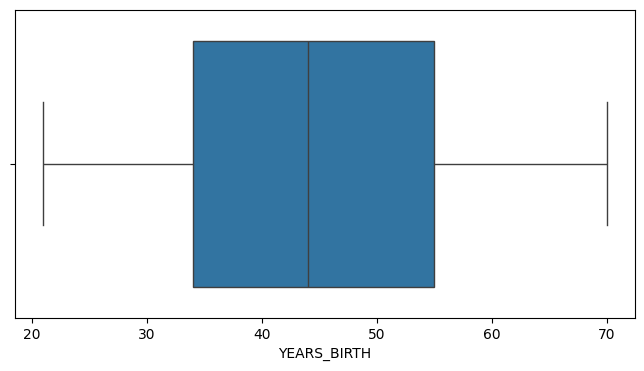

_____________________________
count    307511.000000
mean        189.656025
std         391.517218
min           0.000000
25%           2.000000
50%           6.000000
75%          16.000000
max        1025.000000
Name: YEARS_EMPLOYED, dtype: float64


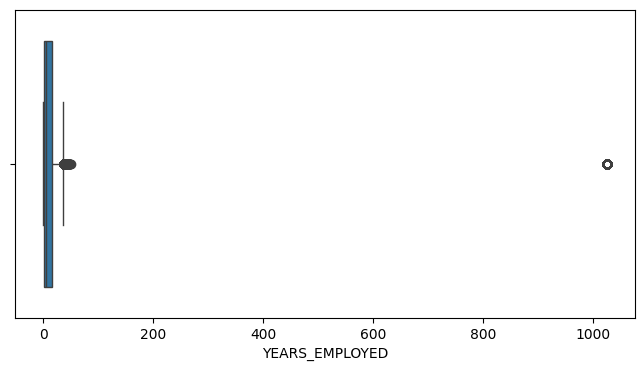

_____________________________
count    307511.000000
mean         13.513478
std           9.891137
min           0.000000
25%           5.000000
50%          12.000000
75%          21.000000
max          69.000000
Name: YEARS_REGISTRATION, dtype: float64


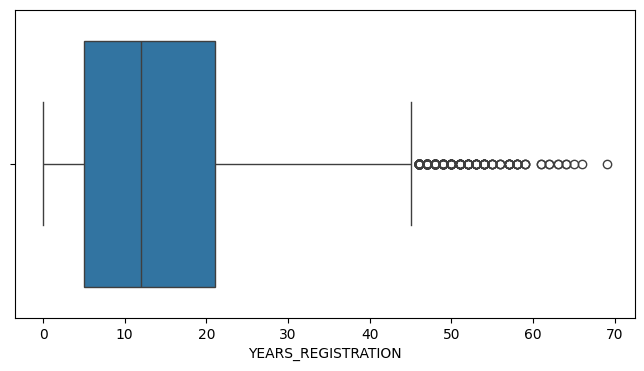

_____________________________
count    307511.000000
mean          7.920845
std           4.238167
min           0.000000
25%           4.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


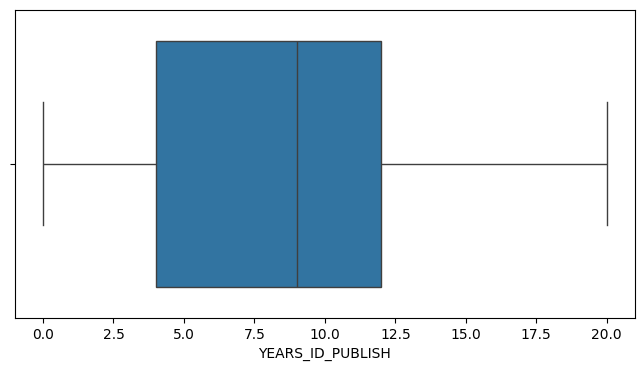

_____________________________
count    307511.000000
mean          2.293095
std           2.249675
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


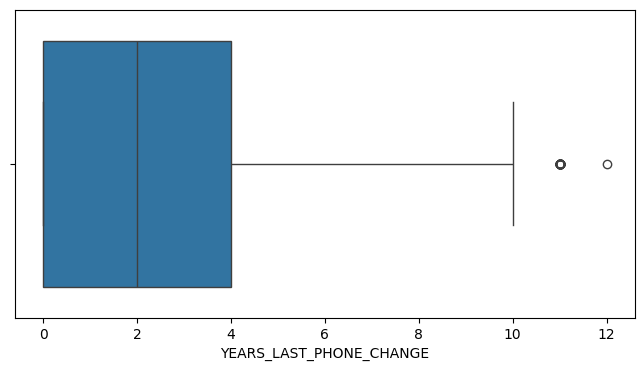

_____________________________
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


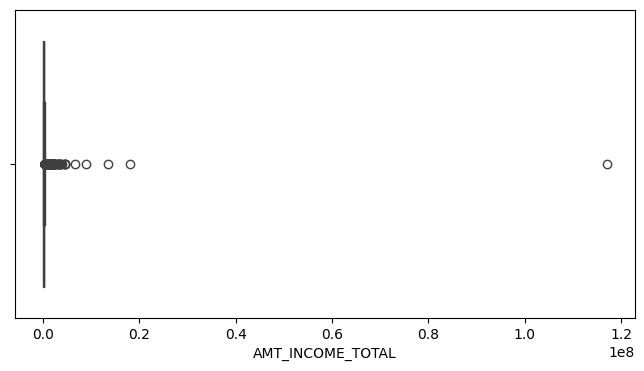

_____________________________
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


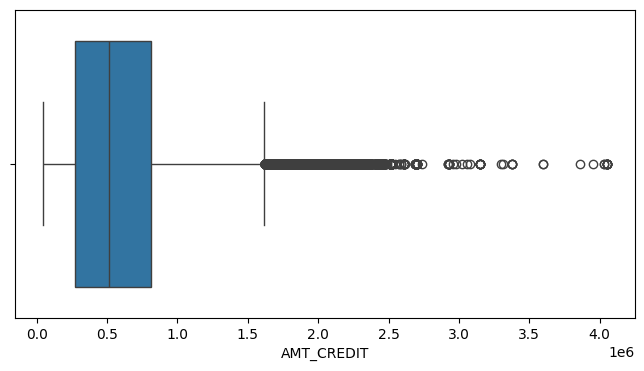

_____________________________
count    307511.000000
mean      27107.867258
std       14493.895950
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


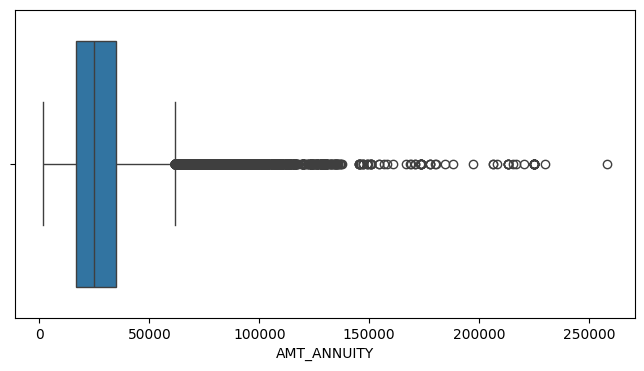

_____________________________
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


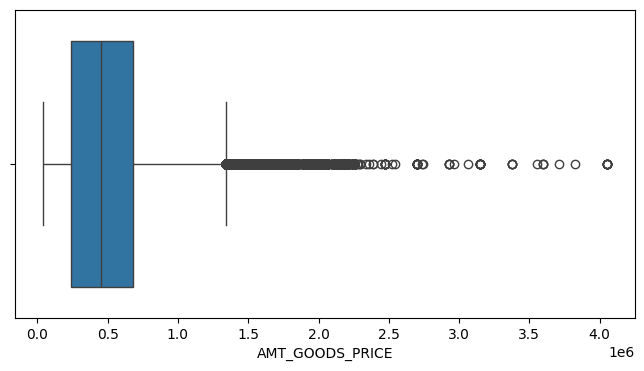

_____________________________
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


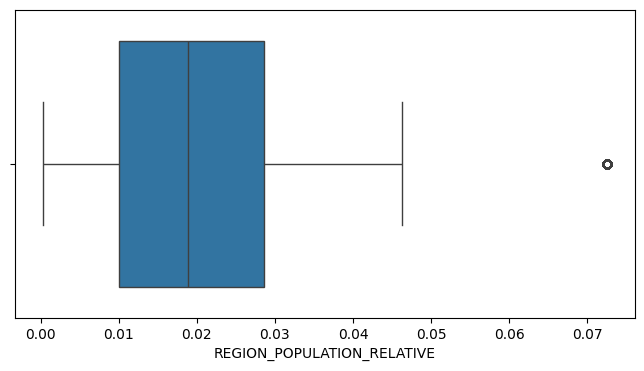

_____________________________
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


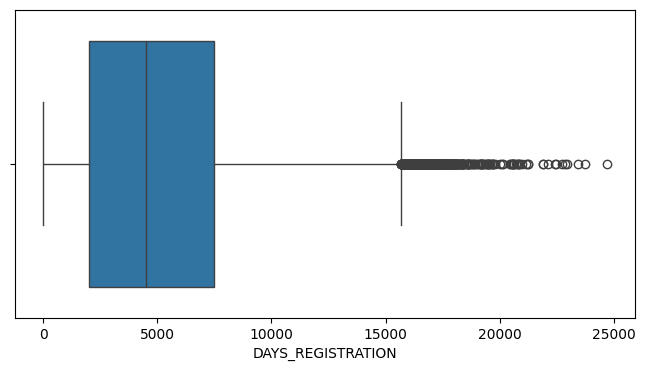

_____________________________
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


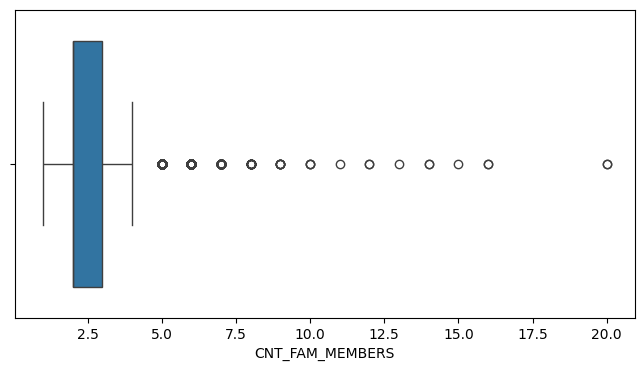

_____________________________
count    3.075110e+05
mean     5.139023e-01
std      1.911477e-01
min      8.173617e-08
25%      3.907824e-01
50%      5.654672e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


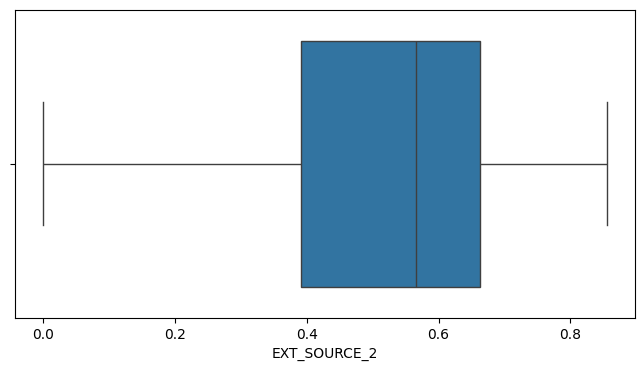

_____________________________
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


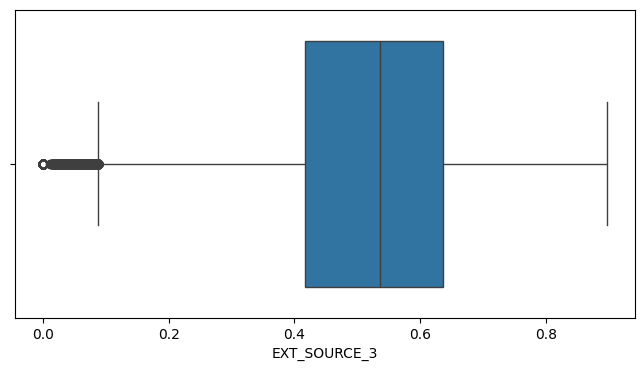

_____________________________
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


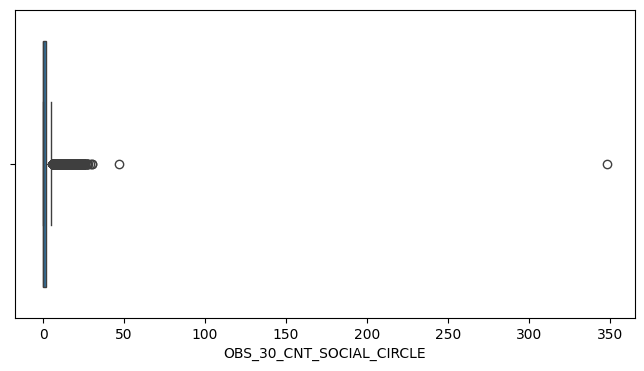

_____________________________
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


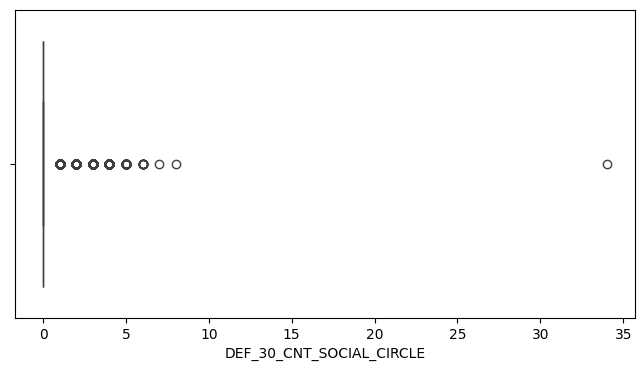

_____________________________
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


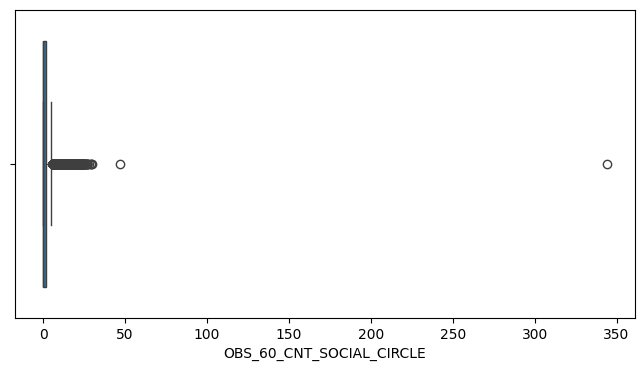

_____________________________
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


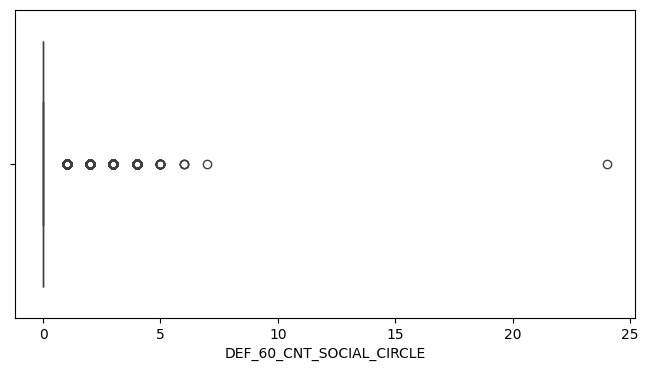

_____________________________
count    307511.000000
mean        962.855657
std         826.808966
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


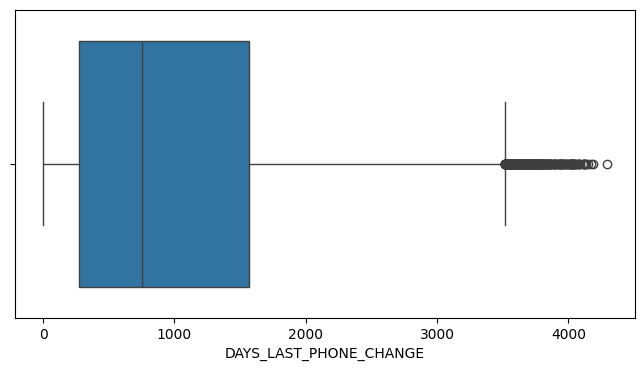

_____________________________
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


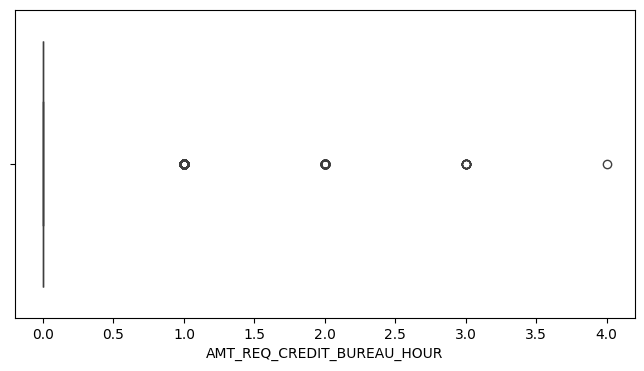

_____________________________
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


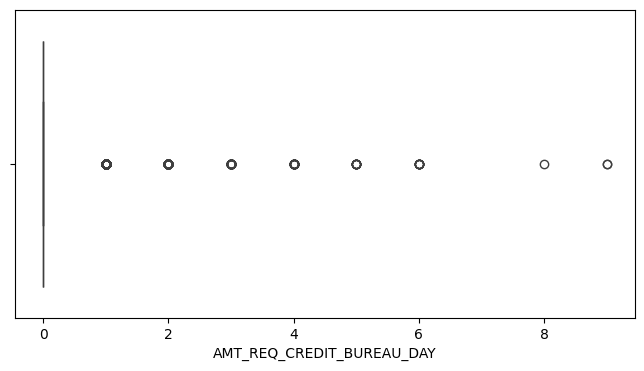

_____________________________
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


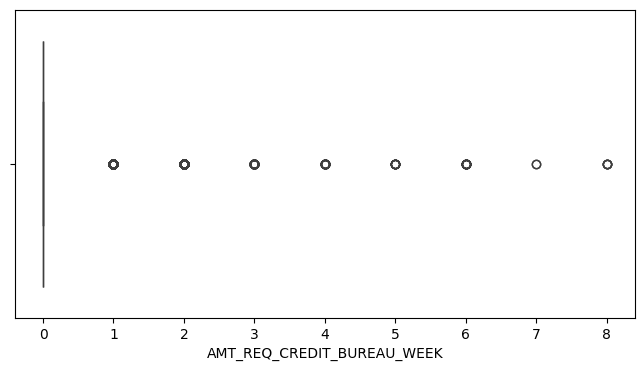

_____________________________
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


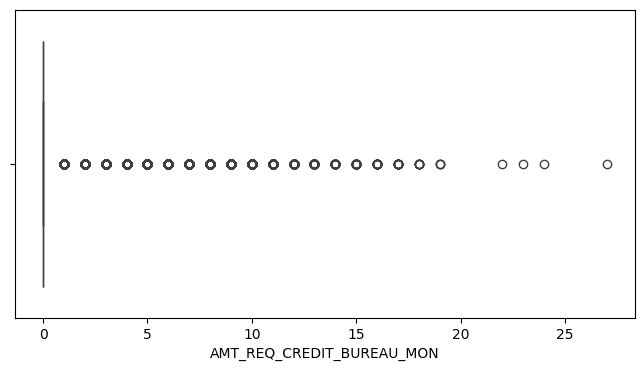

_____________________________
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


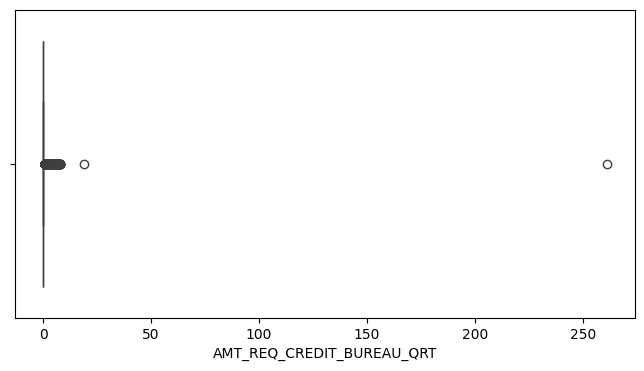

_____________________________
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


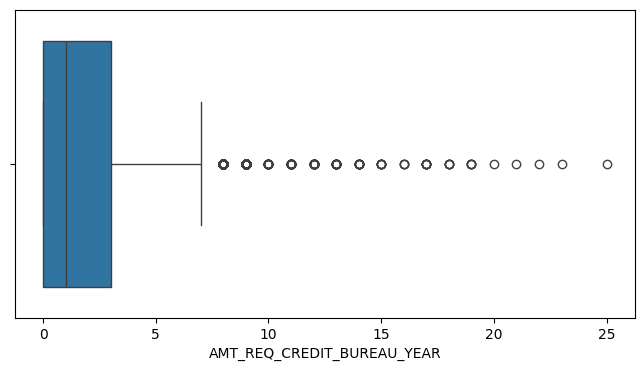

_____________________________


In [56]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize=[8,4])
    sns.boxplot(data=app_df,x = col)
    plt.show()
    print("_____________________________")

- CONCLUSION : FEW COLUMNS WITH OUTLIERS ARE BELOW :-
 1. 'AMT_INCOME_TOTAL' : COLUMN HAS A FEW OUTLIERS AND THERE IS A HUGE DIFFERENCE BETWEEN THE 99TH PERCENTILE AND THE MAX VALUE,ALSO WE CAN SEE HUGE VARIATIONS TIN THE VALUES OF MEAN ND MEDIAN DUE TO OUTLIERS
 2. 'AMT_CREDIT' : COLUMN HAS A FEW OUTLIERS AND THERE IS A HUGE DIFFERENCE BETWEEN THE 99TH PERCENTILE AND THE MAX VALUE,ALSO WE CAN SEE HUGE VARIATIONS TIN THE VALUES OF MEAN ND MEDIAN DUE TO OUTLIERS
 3. 'AMT_ANNUITY' : COLUMN HAS A FEW OUTLIERS AND THERE IS A HUGE DIFFERENCE BETWEEN THE 99TH PERCENTILE AND THE MAX VALUE,ALSO WE CAN SEE HUGE VARIATIONS TIN THE VALUES OF MEAN ND MEDIAN DUE TO OUTLIERS
 4. 'AMT_GOODS_PRICE' : COLUMN HAS A FEW OUTLIERS AND THERE IS A HUGE DIFFERENCE BETWEEN THE 99TH PERCENTILE AND THE MAX VALUE,ALSO WE CAN SEE HUGE VARIATIONS TIN THE VALUES OF MEAN ND MEDIAN DUE TO OUTLIERS
 5. 'REGION_POPULATION_RELATIVE' :COLUMN HAS ONE OUTLIER AND THERE IS NOT MUCH DIFFERENCE BETWEEN MDEAN AND MEDIAN

### UNIVARIATE ANALYSIS IN COLUMNS WITH TARGET 0 AND 1

Plot on NAME_CONTRACT_TYPE for target 0 and 1 


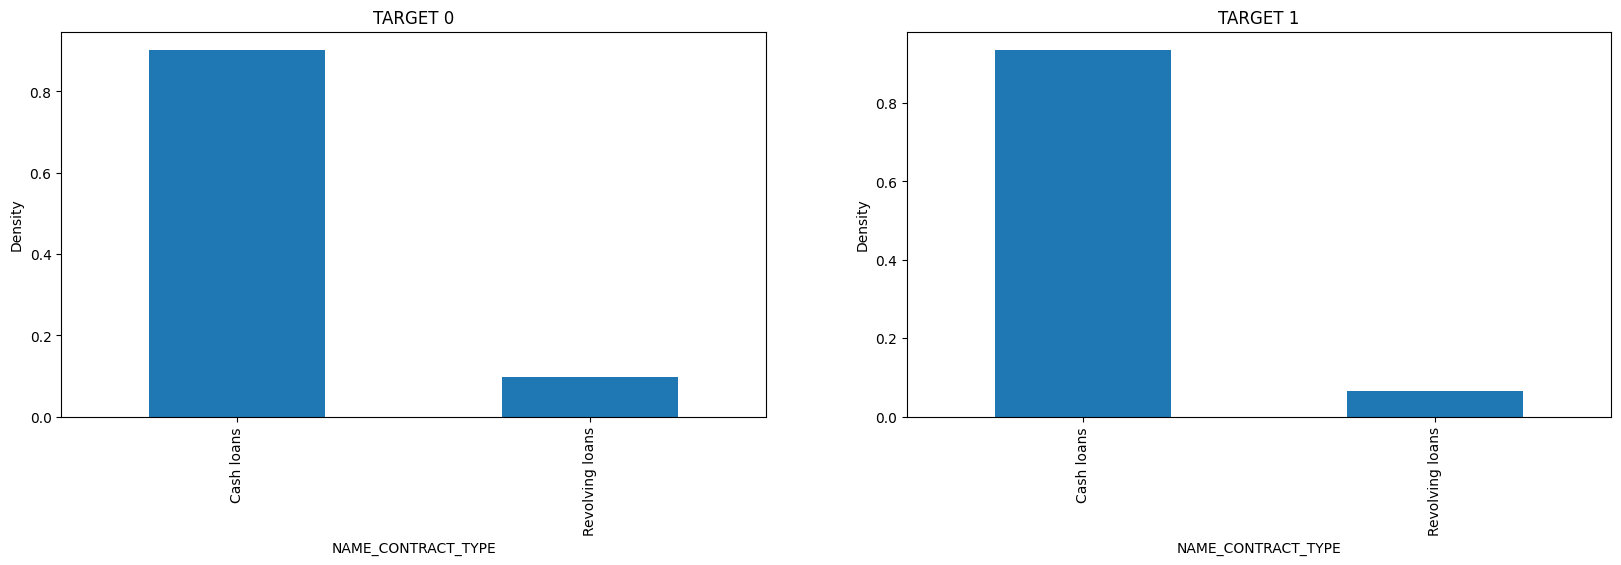



________________________________________________________________


Plot on CODE_GENDER for target 0 and 1 


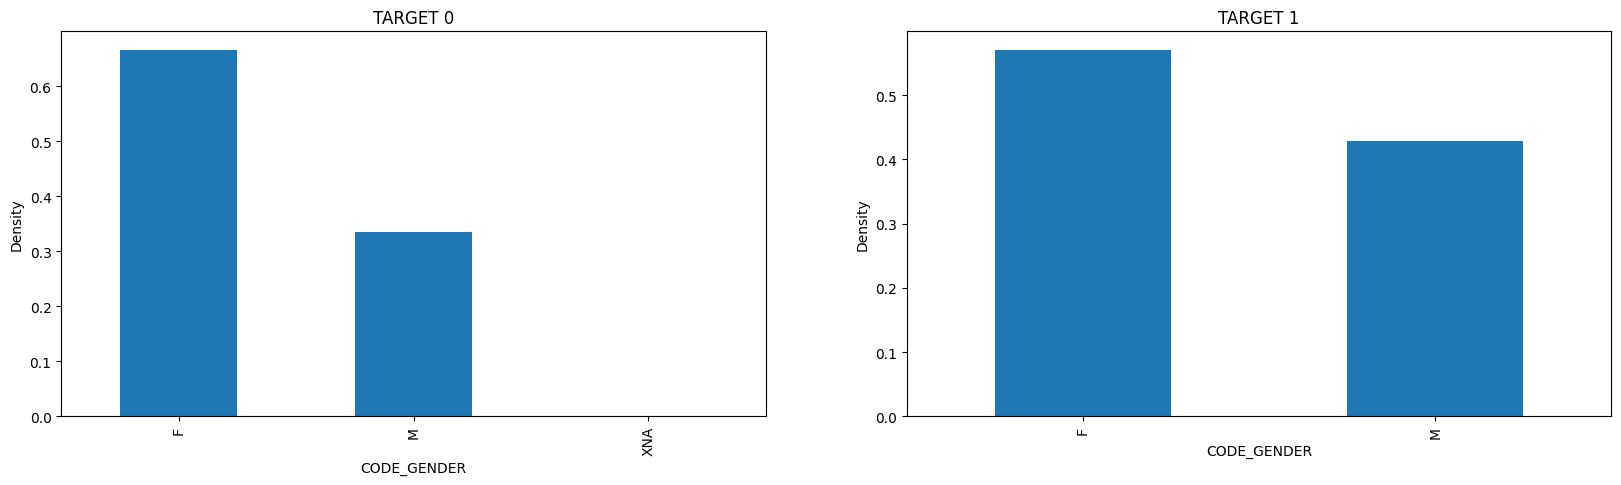



________________________________________________________________


Plot on FLAG_OWN_CAR for target 0 and 1 


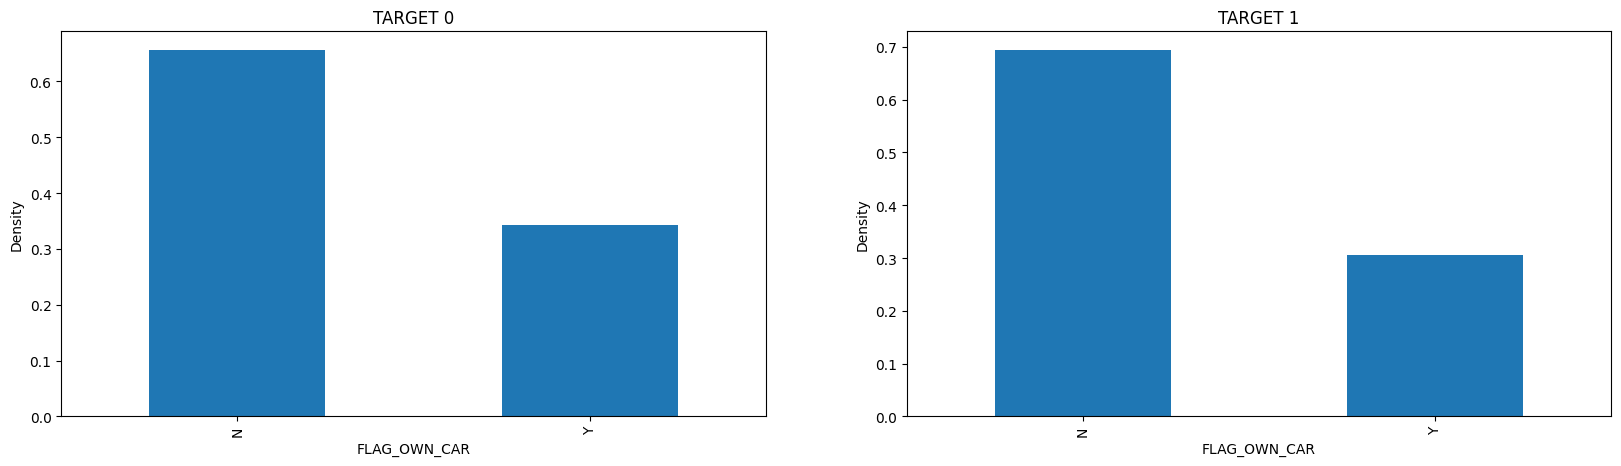



________________________________________________________________


Plot on FLAG_OWN_REALTY for target 0 and 1 


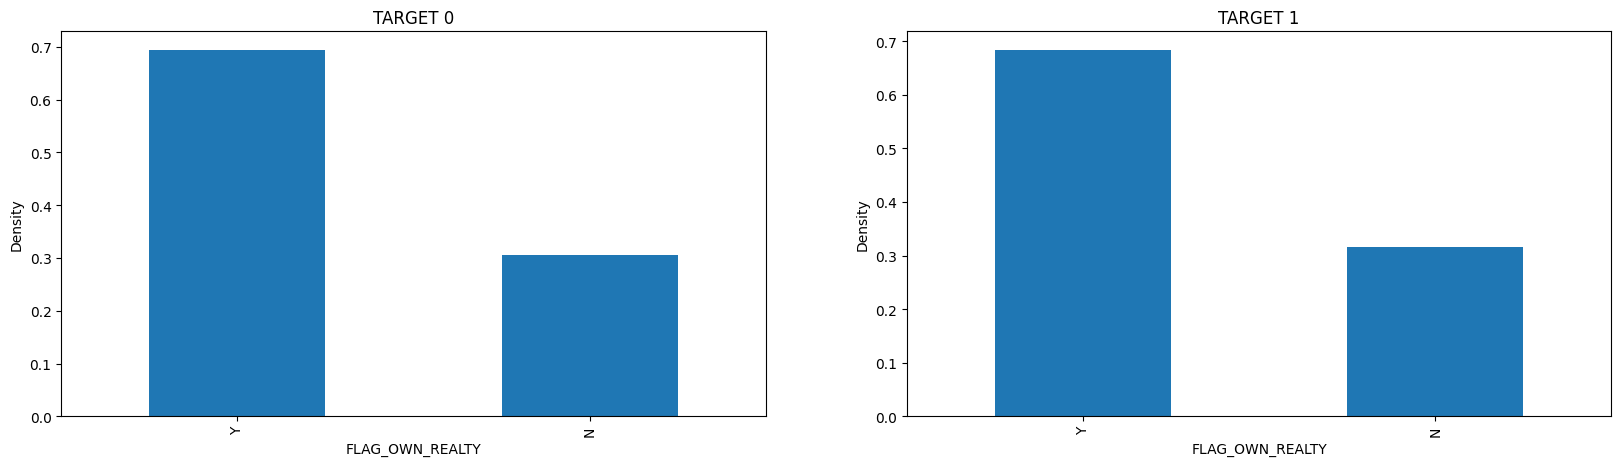



________________________________________________________________


Plot on NAME_TYPE_SUITE for target 0 and 1 


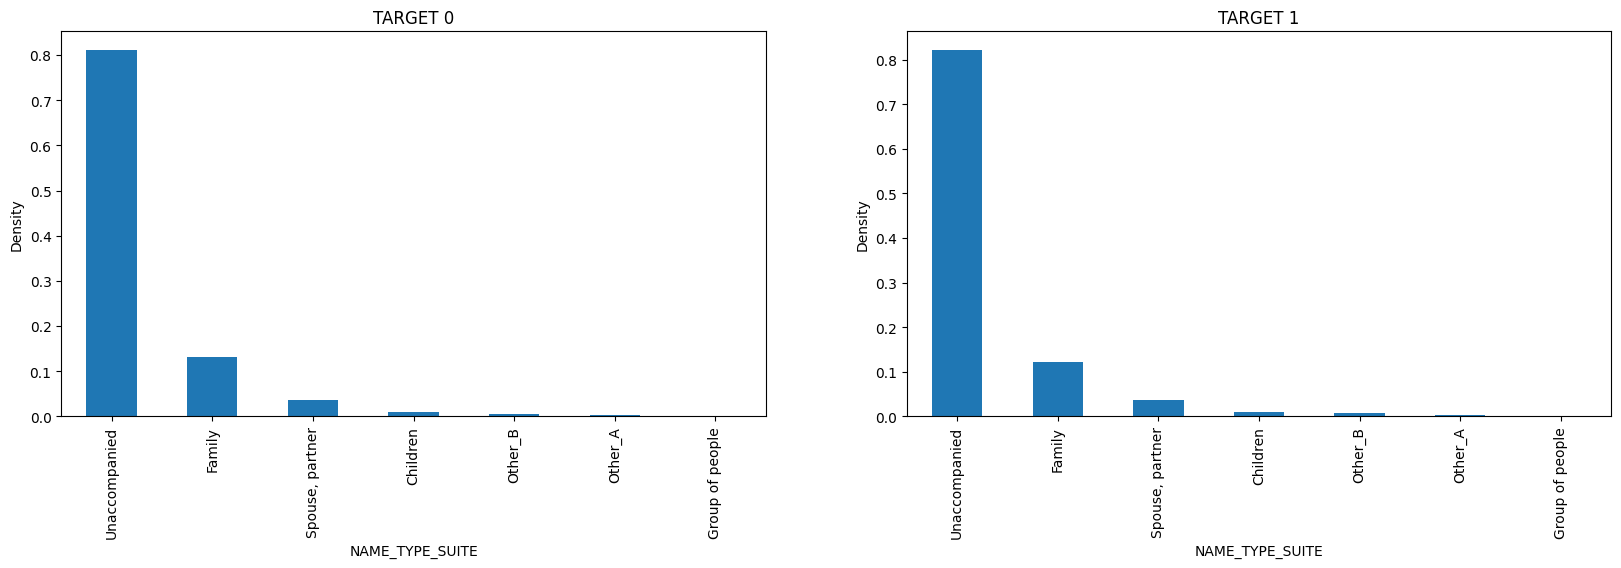



________________________________________________________________


Plot on NAME_INCOME_TYPE for target 0 and 1 


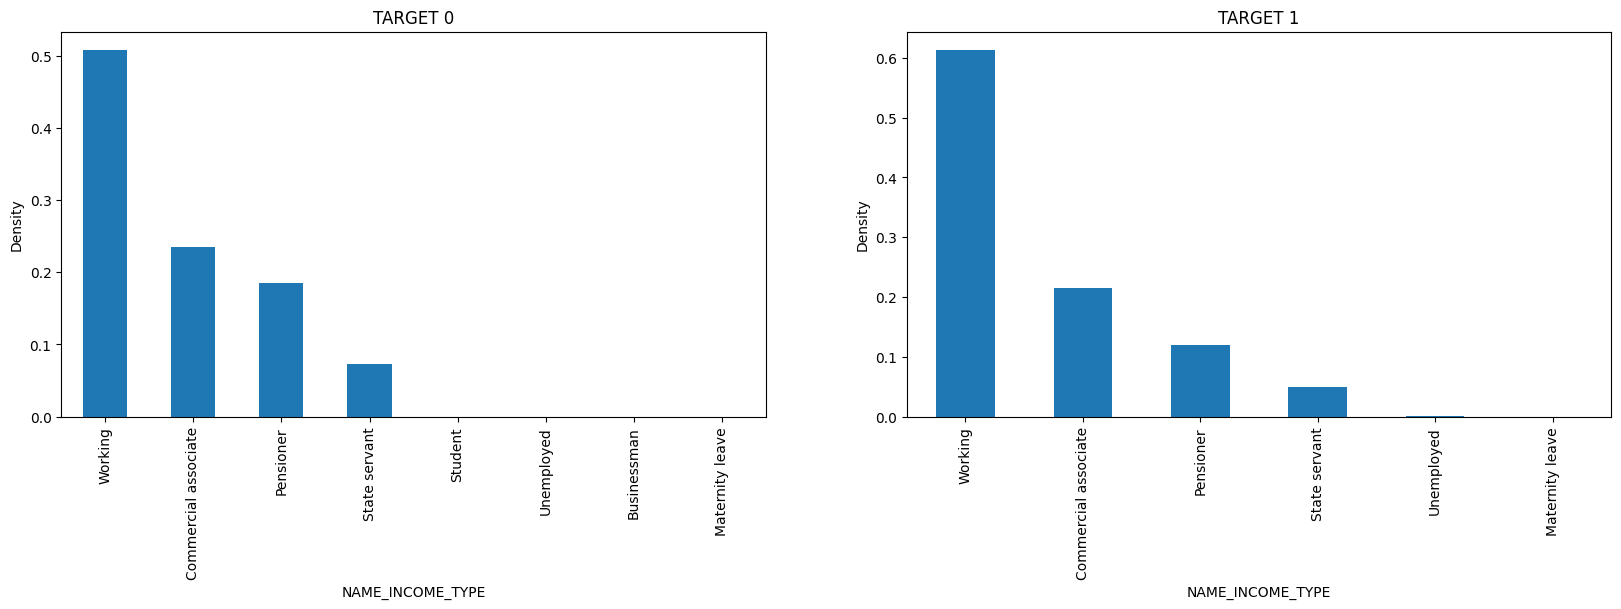



________________________________________________________________


Plot on NAME_EDUCATION_TYPE for target 0 and 1 


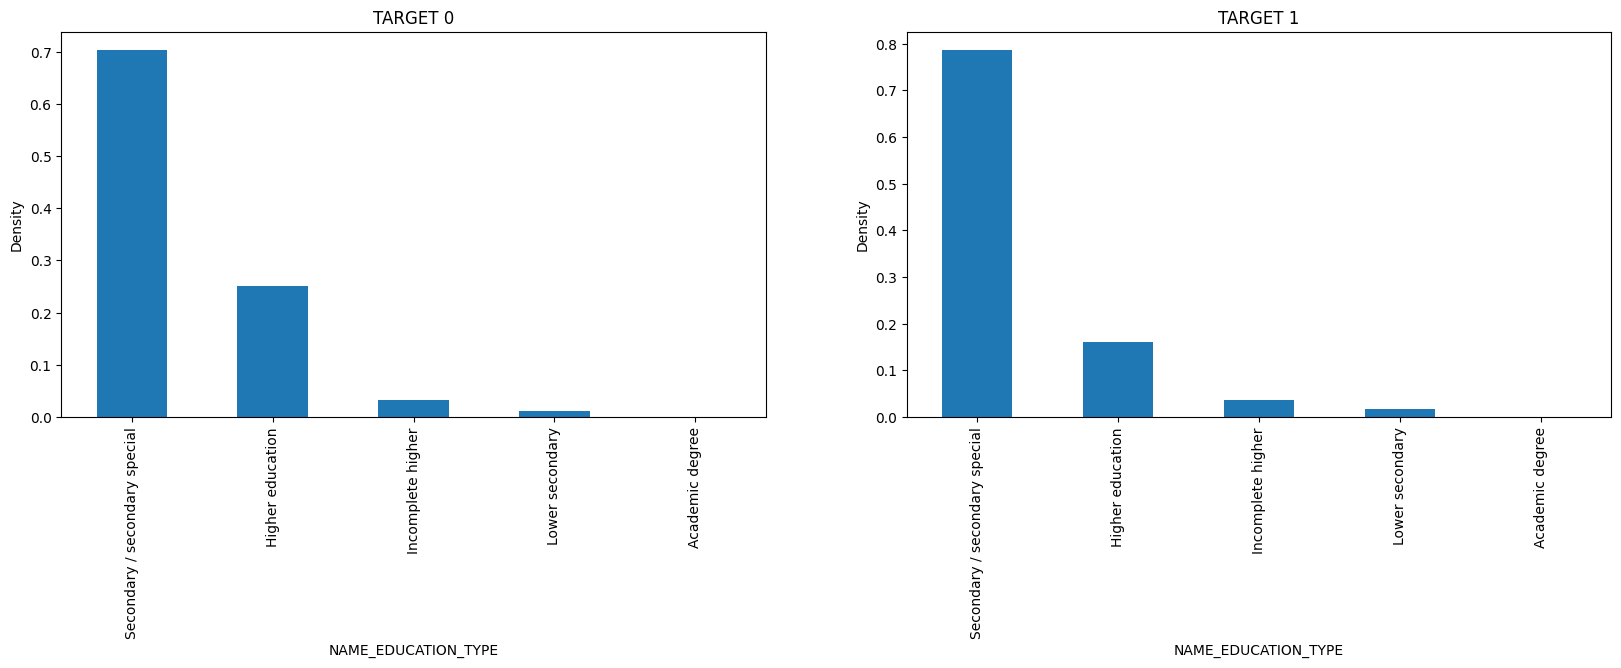



________________________________________________________________


Plot on NAME_FAMILY_STATUS for target 0 and 1 


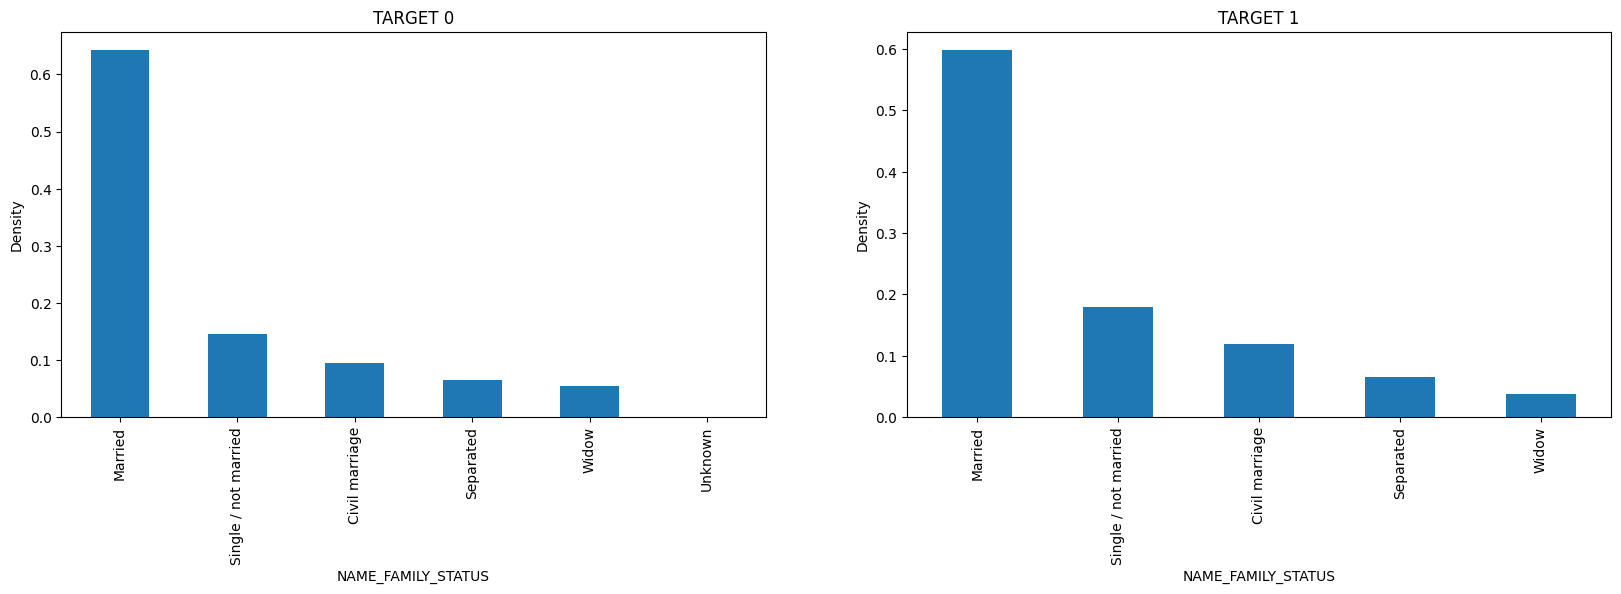



________________________________________________________________


Plot on NAME_HOUSING_TYPE for target 0 and 1 


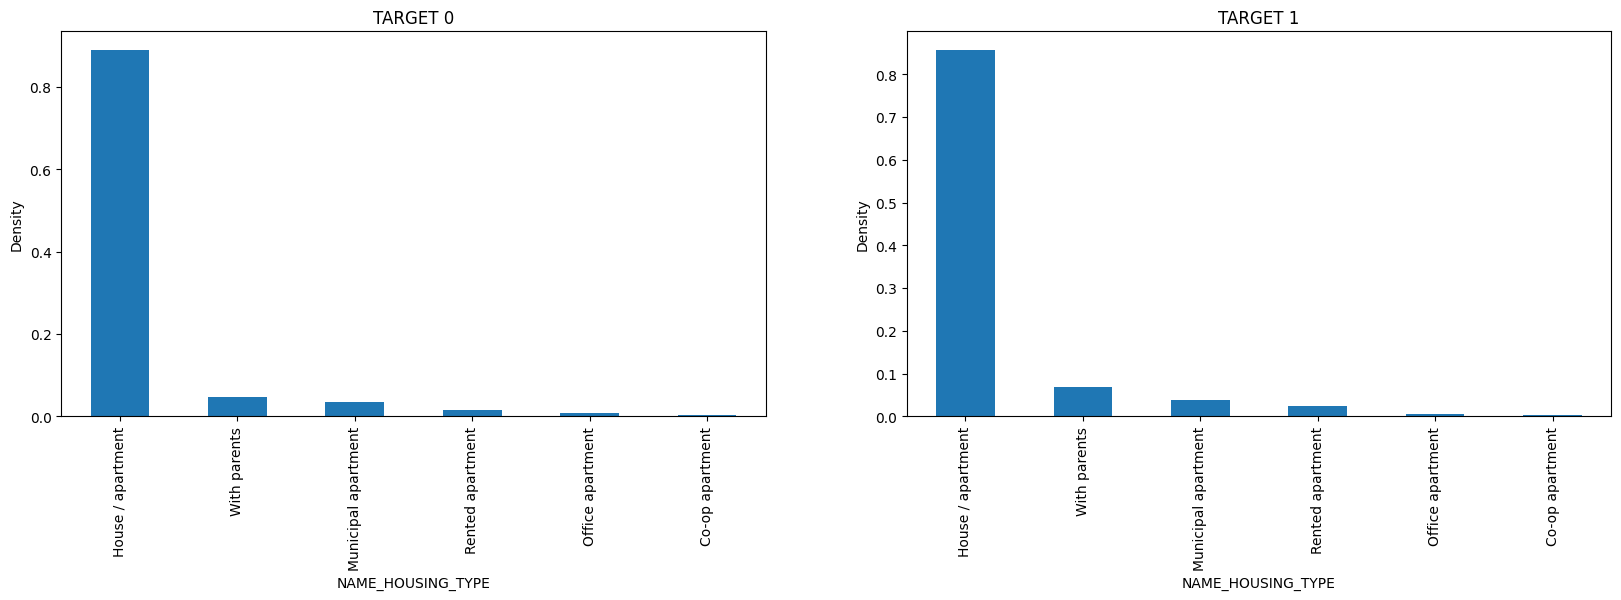



________________________________________________________________


Plot on OCCUPATION_TYPE for target 0 and 1 


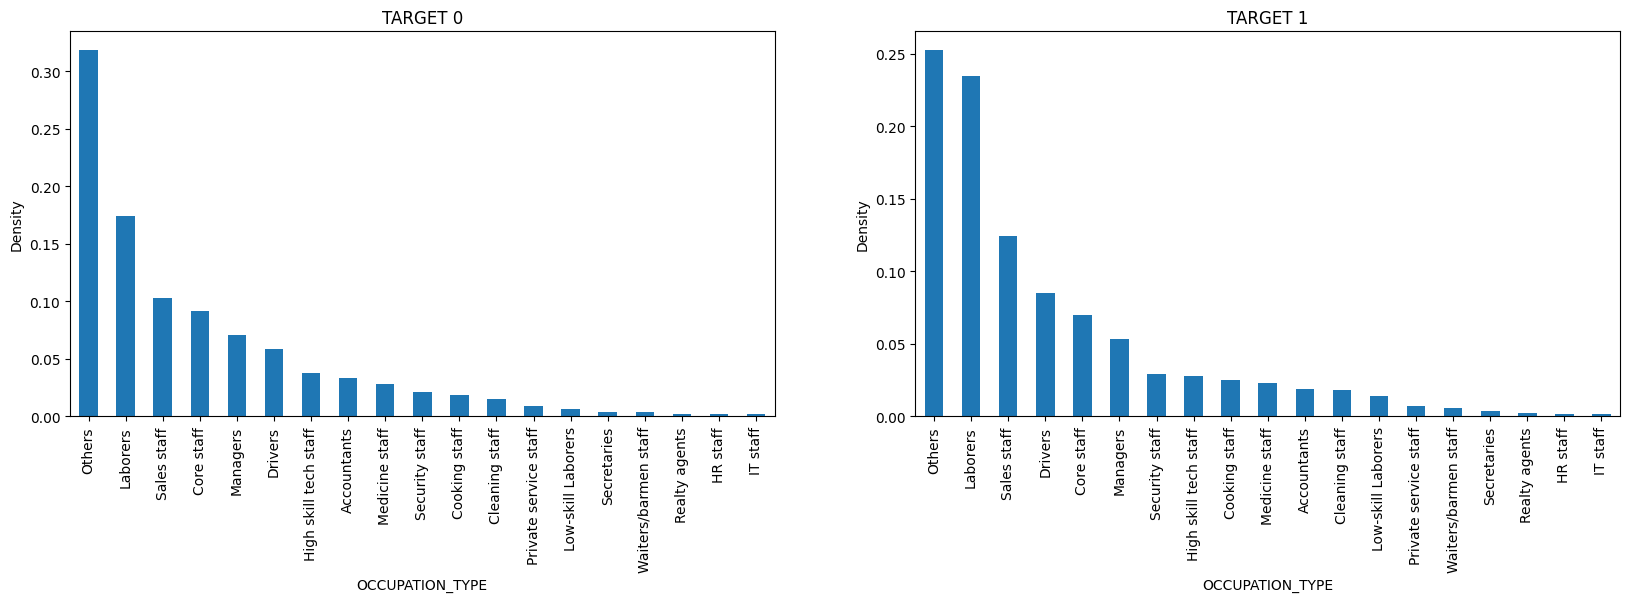



________________________________________________________________


Plot on WEEKDAY_APPR_PROCESS_START for target 0 and 1 


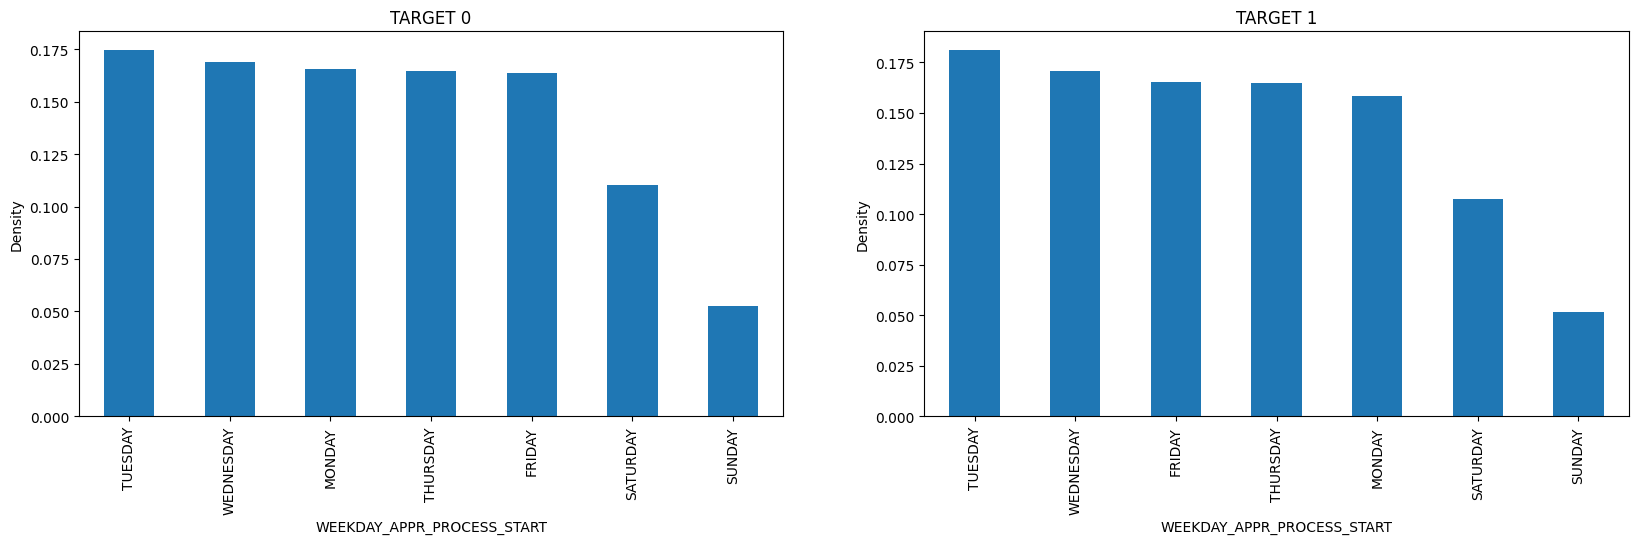



________________________________________________________________


Plot on ORGANIZATION_TYPE for target 0 and 1 


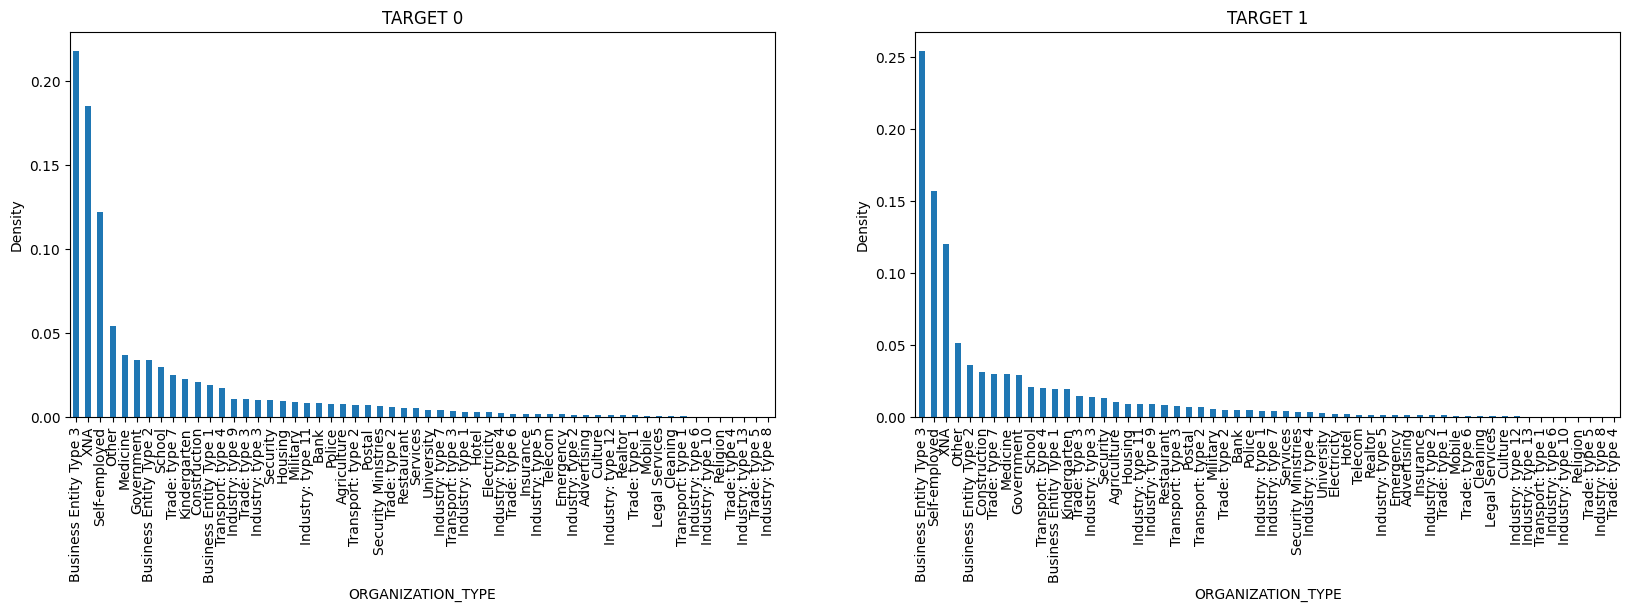



________________________________________________________________




In [57]:
for col in cat_columns:
    print(f"Plot on {col} for target 0 and 1 ")
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize = True).plot.bar()
    plt.title("TARGET 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize = True).plot.bar()
    plt.title("TARGET 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n________________________________________________________________\n\n")

- CONCLUSION :
1. NAME_CONTRACT_TYPE : MORE APPLICATIONS HAVE CASH LOANS THAN REVOLVING LOANS
2. CODE_GENDER : NO. OF FEMALE APPLICANTS ARE MORE THAN THAT OF MALE APPLICANTS
3. FLAG_OWN_CAR : MOST(70%) APPLICANTS DON'T OWN A CAR BOTH FOR TARGET 0 AND 1
4. FLAG_OWN_REALTY : MOST (70% APPLICANTS DON'T OWN A HOUSE) CAR BOTH FOR TARGET 0 AND 1
5. NAME_TYPE_SUITE : MOST (81%) APPLICANTS ARE UNACCOMPANIED BOTH FOR TARGET 0 AND 1
6. NAME_INCOME_TYPE : BOTH FOR TARGET 0 AND 1 MOST (51%) APPLICANTS ARE EARING THIER INCOME FORM WORK
7. NAME_EDUCATION_ TYPE : BOTH FOR TARGET 0 AND 1 70% OF APPLICANTS HAVE COMPLETED SECONDARY/SECONDARY SPECIAL EDUCATION
8. NAME_FAMILY_STATUS : 63 % OF APPLICANTS ARE MARRIED BOTH FOR TARGET 0 AND 1 
9. NAME_HOUSING_TYPE : 88% OF HOUSING TYPE OF APPLICNTS ARE HOUSE/APARTMENT BOTH FOR TARGET 0 AND 1 
10. OCCUPATION_TYPE : MSOT(31%) APPLICANT S HAVE OTHER OCCPATION TYPE, ARE NON-DEFAULTERS AND LABOURERS,SALES STAFF,DRVIERS AND CORE STAFF NOT ABLE TO REPAY LOAN ON TIME
11. WEEKDAY_APPR_PROCESS_START :MSOT APPLICANT HAVE APPLIED FOR LOAN ON TUESDAY AND LEAST ON SATURDAY
12. ORGANISATION_TYPE : MOST OF THE ORRGANISATION TYPE OF EMPLOYEES ARE BUSINESS ENTITY TYPE 3,SELF EMPLOYED AND OTHER OCCUPATION TYPES

### ANALYSIS ON AMT_GOODS_PRICE ON TARGET 0 AND 1

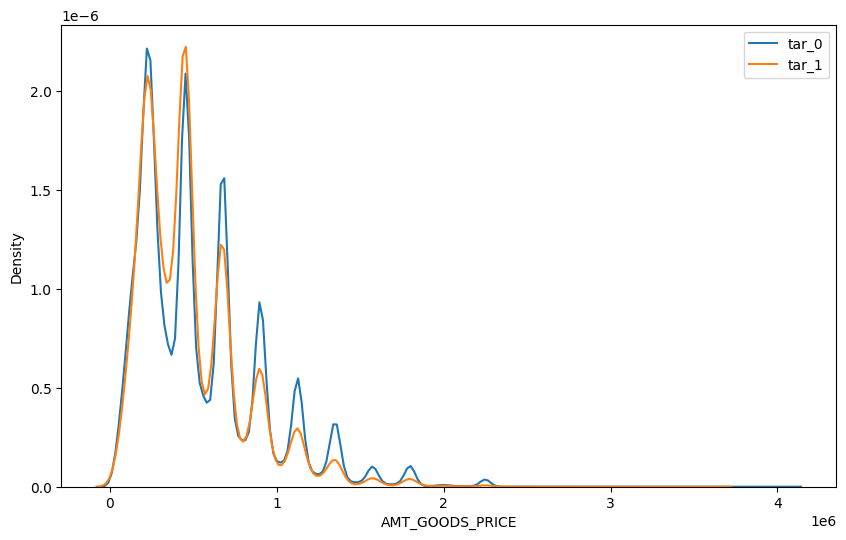

In [58]:
plt.figure(figsize=[10,6])
sns.distplot(tar_0['AMT_GOODS_PRICE'],label = "tar_0",hist = False)
sns.distplot(tar_1['AMT_GOODS_PRICE'],label = "tar_1",hist = False)
plt.legend()
plt.show()

- CONCLUSION : THE PRICE OF GOODS FOR WHICH LOAN IS GIVEN HAS SAME VARIATION FOR TARGET 0 AND 1

### BIVARIATE AND MULTIVRIATE ANALYSIS

#### BIVARIATE ANALYSIS BETWEEN 'WEEKDAY_APPR_PROCESS_START'  VS  'HOUR_APPR_PROCESS_START' 

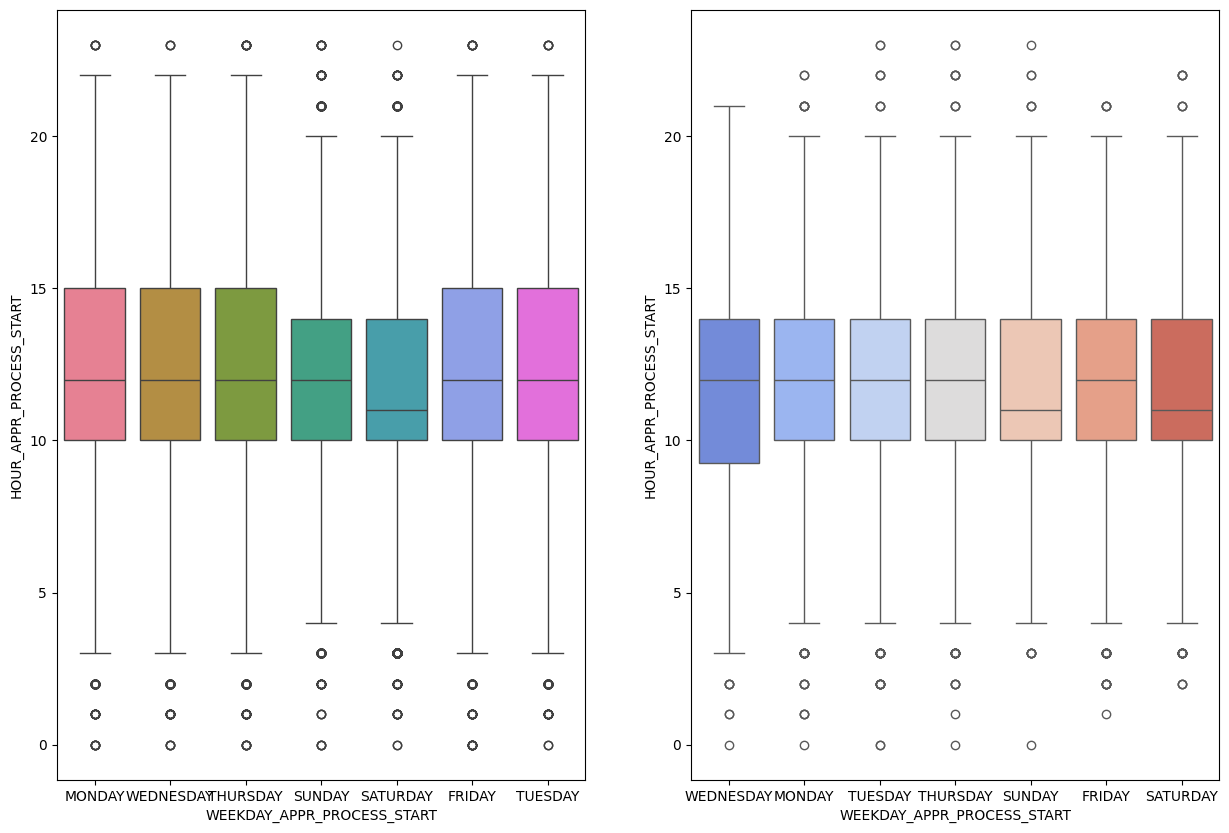

In [59]:
plt.figure(figsize=[15,10])
palette_0 = sns.color_palette("husl", n_colors=tar_0['WEEKDAY_APPR_PROCESS_START'].nunique())
palette_1 = sns.color_palette("coolwarm", n_colors=tar_1['WEEKDAY_APPR_PROCESS_START'].nunique())
plt.subplot(1,2,1)
sns.boxplot(x = 'WEEKDAY_APPR_PROCESS_START', y = 'HOUR_APPR_PROCESS_START',data=tar_0,palette=palette_0)
plt.subplot(1,2,2)
sns.boxplot(x = 'WEEKDAY_APPR_PROCESS_START', y = 'HOUR_APPR_PROCESS_START',data=tar_1,palette=palette_1)
plt.show()

- CONCLUSION :
1. THE BANK OPERATES BETWEEN 10 AM TO 3PM EXCEPT FOR SATURDAY AND SUNDAY,ITS 10 AM TO 2 PM
2. WE CAN OBSERVE THAT AROUND 11.30 AM TO 12PM AROUND 50% OF THE CUSTOMERS VISIT THE BRANCH FOR THE LOAN APPLICATION ON ALL DAYS,WHERE THE TIMEIS BETWEEN 10 AM TO 11 AM FOR BOTH TARGET 0 AND 1
3. THE LOAN DEFAULTERS HAVE APPLIED  FOR THE LOAN BETWEEN 9.30 AM TO 10 AM  WHERAS APPLICANT WHO REPAY THE LOAN HAVE APPLIED FOR THE LOAN BETWEEN 10AP TO 3 PM

### BIVARIATE ANALYSIS BETWEEN 'AGE_CATEGORY' VS 'AMT_CREDIT'

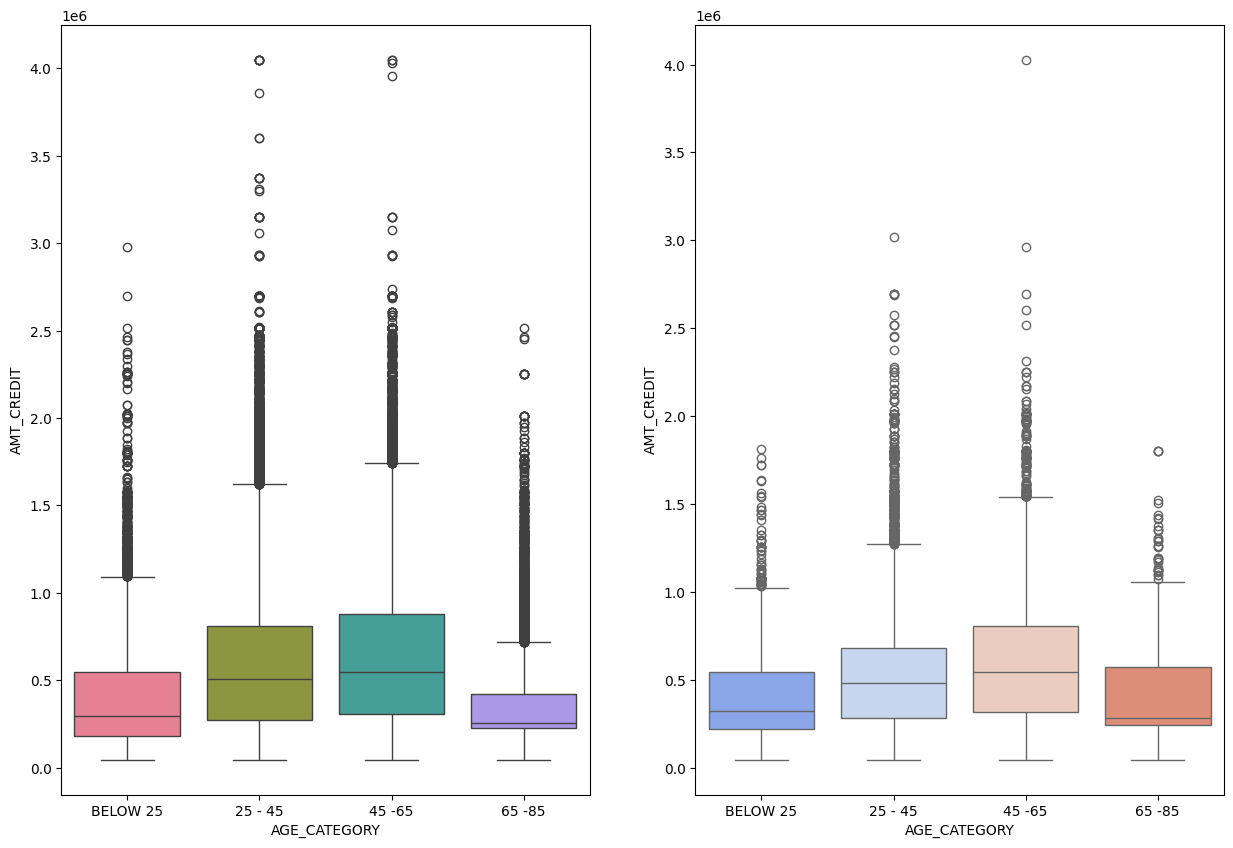

In [60]:
plt.figure(figsize=[15,10])
palette_0 = sns.color_palette("husl", n_colors=tar_0['AGE_CATEGORY'].nunique())
palette_1 = sns.color_palette("coolwarm", n_colors=tar_1['AGE_CATEGORY'].nunique())
plt.subplot(1,2,1)
sns.boxplot(x = 'AGE_CATEGORY', y = 'AMT_CREDIT',data=tar_0,palette=palette_0)
plt.subplot(1,2,2)
sns.boxplot(x = 'AGE_CATEGORY', y = 'AMT_CREDIT',data=tar_1,palette=palette_1)
plt.show()

- CONCLUSION :
1. THE APPLICANTS BETWEEN AGE GROUP 25 TO 65 HAVE CREDIT AMOUNT OF LESS THAN 2500000 ARE ABLE TO REPAY THE LOAN PROPERLY.
2. THE APPLICANTS WITH CREDIT LESS THAN 100000 ARE WITH AGE GROUP ABOVE 65 CAN BE CONSIDERED AS LOAN DEFAULTERS.
3. MOST APPLICANTS WHOSE CREDIT AMAOUNT OF THE LOAN IS LESS THAN 1700000 ARE LOAN DEFAULTER WITH AGE 25 OR LESSER.

### PAIRPLOT FOR AMOUNT COLUMNS OF TARGET 0

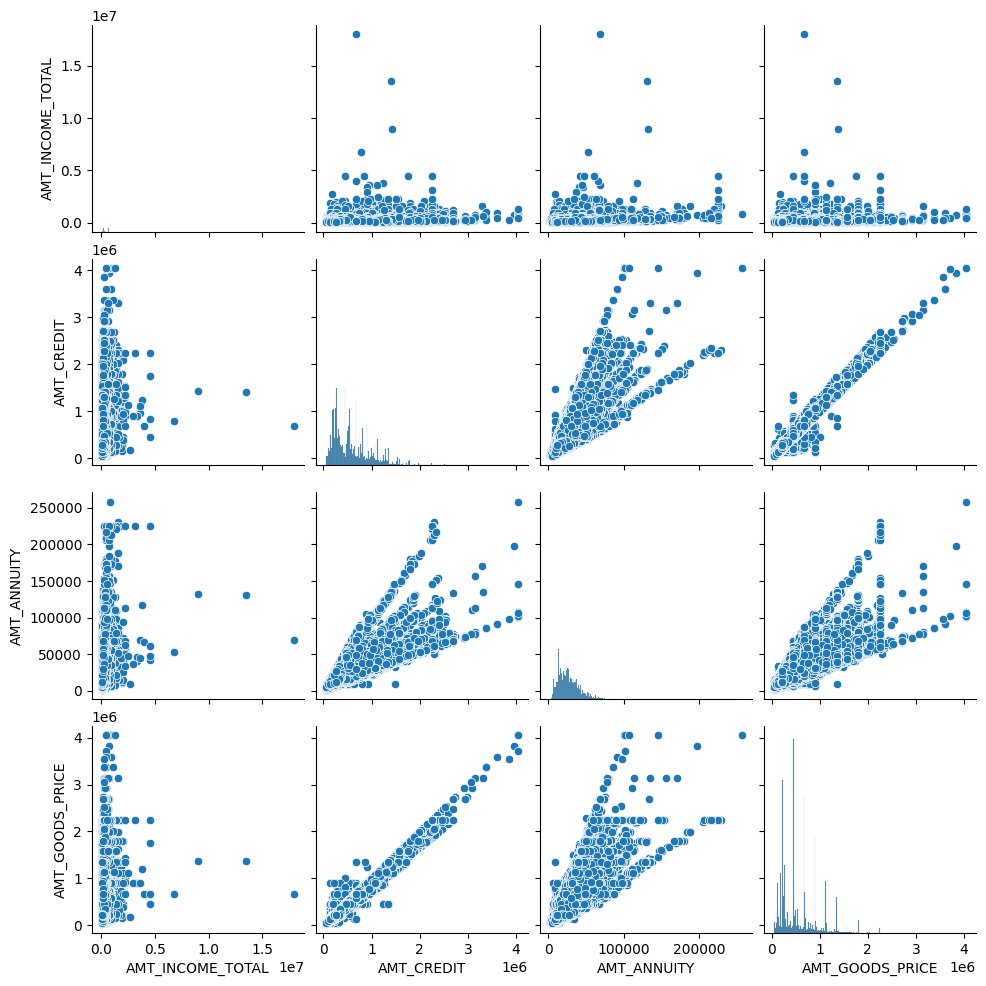

In [61]:
sns.pairplot(tar_0[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()

- CONCLUSION : FOR APPLICANTS WHO CAN REPAY THIER LOANS ON TIME -
1. 'AMT_INCOME_TOTAL' : HAS A DRASTIC INCREASE WITH SLIGHT INCREASE IN  AMT_CREDIT, AMT_GOODS_PRICE AND AMT_ANNUITY
2. 'AMT_CREDIT': INCREASES OR VARIES LINEARLY WITH 'AMT_GOODS_PRICE','AMT_CREDIT' INCREASES WITH 'AMT_ANNUITY'
3. 'AMT_ANNUITY': INCREASE WITH INCREASE IN 'AMT_CREDIT' AND 'AMT_GOODS_PRICE
4. 'AMT_GOODS_PRICE':INCREASE WTIH INCREASE IN'AMT_GOODS_PRICE' AND 'AMT_ANNUITY'

### PAIRPLOT OF AMOUNT COLUMNS IN TARGET 1

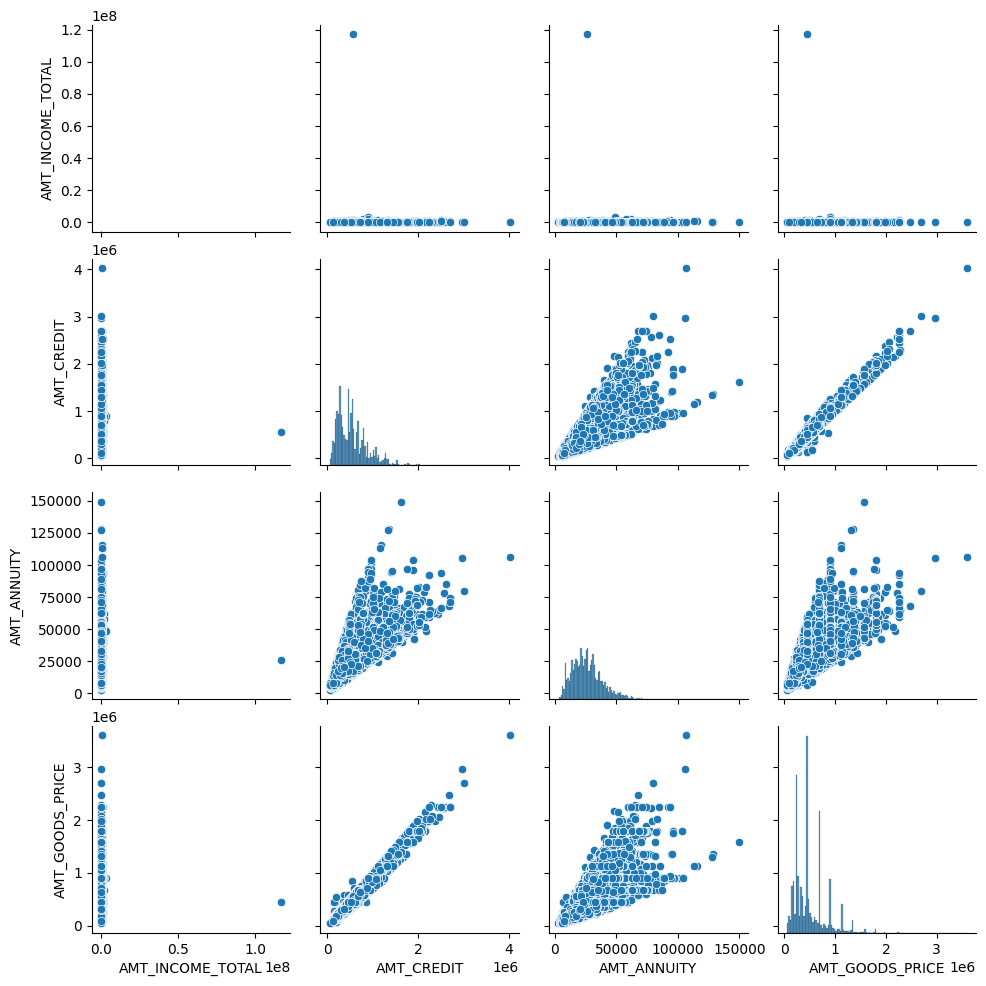

In [62]:
sns.pairplot(tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()

- CONCLUSION : FOR APPLICANTS WHO CAN'T REPAY THIER LOANS ON TIME -
1. 'AMT_INCOME_TOTAL' : HAS A DRASTIC INCREASE WITH SLIGHT INCREASE IN AMT_CREDIT, AMT_GOODS_PRICE AND AMT_ANNUITY
2. 'AMT_CREDIT': INCREASES OR VARIES LINEARLY WITH 'AMT_GOODS_PRICE','AMT_CREDIT' INCREASES WITH 'AMT_ANNUITY'
3. 'AMT_ANNUITY': INCREASE WITH INCREASE IN 'AMT_CREDIT' AND 'AMT_GOODS_PRICE
4. 'AMT_GOODS_PRICE':INCREASE WTIH INCREASE IN'AMT_GOODS_PRICE' AND 'AMT_ANNUITY'

### CORRELATION BETWEEN NUMERICAL COLUMNS 

In [63]:
corr_data = app_df[[  'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']]
corr_data

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                26               1                  10                 5   
1                47               3                   3                 0   
2                53               0                  11                 7   
3                53               8                  27                 6   
4                55               8                  12                 9   
...             ...             ...                 ...               ...   
307506           26               0                  23                 5   
307507           58            1025                  12                11   
307508           42              22                  18                14   
307509           33              13                   7                 2   
307510           47               3                  14                 1   

        YEARS_LAST_PHONE_CHANGE  
0                             3  
1                             2  
2                             2  
3                             1  
4                             3  
...                         ...  
307506                        0  
307507                        0  
307508                        5  
307509                        0  
307510                        2  

[307511 rows x 9 columns]

In [64]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191648   
AMT_CREDIT                       0.156870    1.000000     0.770107   
AMT_ANNUITY                      0.191648    0.770107     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774817   
YEARS_BIRTH                     -0.027239    0.055373    -0.009504   
YEARS_EMPLOYED                  -0.063837   -0.064321    -0.102826   
YEARS_REGISTRATION              -0.027882   -0.009590    -0.038490   
YEARS_ID_PUBLISH                -0.008459    0.006942    -0.011368   
YEARS_LAST_PHONE_CHANGE          0.018571    0.077260     0.064501   

                         AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL                0.159632    -0.027239       -0.063837   
AMT_CREDIT                      0.986734     0.055373       -0.064321   
AMT_ANNUITY                     0.774817    -0.009504       -0.102826   
AMT_GOODS_PRICE                 1.000000     0.053449       -0.062193   
YEARS_BIRTH                     0.053449     1.000000        0.623745   
YEARS_EMPLOYED                 -0.062193     0.623745        1.000000   
YEARS_REGISTRATION             -0.011518     0.331856        0.214652   
YEARS_ID_PUBLISH                0.009647     0.272054        0.274644   
YEARS_LAST_PHONE_CHANGE         0.079351     0.086322       -0.016423   

                         YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.027882         -0.008459   
AMT_CREDIT                        -0.009590          0.006942   
AMT_ANNUITY                       -0.038490         -0.011368   
AMT_GOODS_PRICE                   -0.011518          0.009647   
YEARS_BIRTH                        0.331856          0.272054   
YEARS_EMPLOYED                     0.214652          0.274644   
YEARS_REGISTRATION                 1.000000          0.101831   
YEARS_ID_PUBLISH                   0.101831          1.000000   
YEARS_LAST_PHONE_CHANGE            0.058393          0.092806   

                         YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.018571  
AMT_CREDIT                              0.077260  
AMT_ANNUITY                             0.064501  
AMT_GOODS_PRICE                         0.079351  
YEARS_BIRTH                             0.086322  
YEARS_EMPLOYED                         -0.016423  
YEARS_REGISTRATION                      0.058393  
YEARS_ID_PUBLISH                        0.092806  
YEARS_LAST_PHONE_CHANGE                 1.000000

<Axes: >

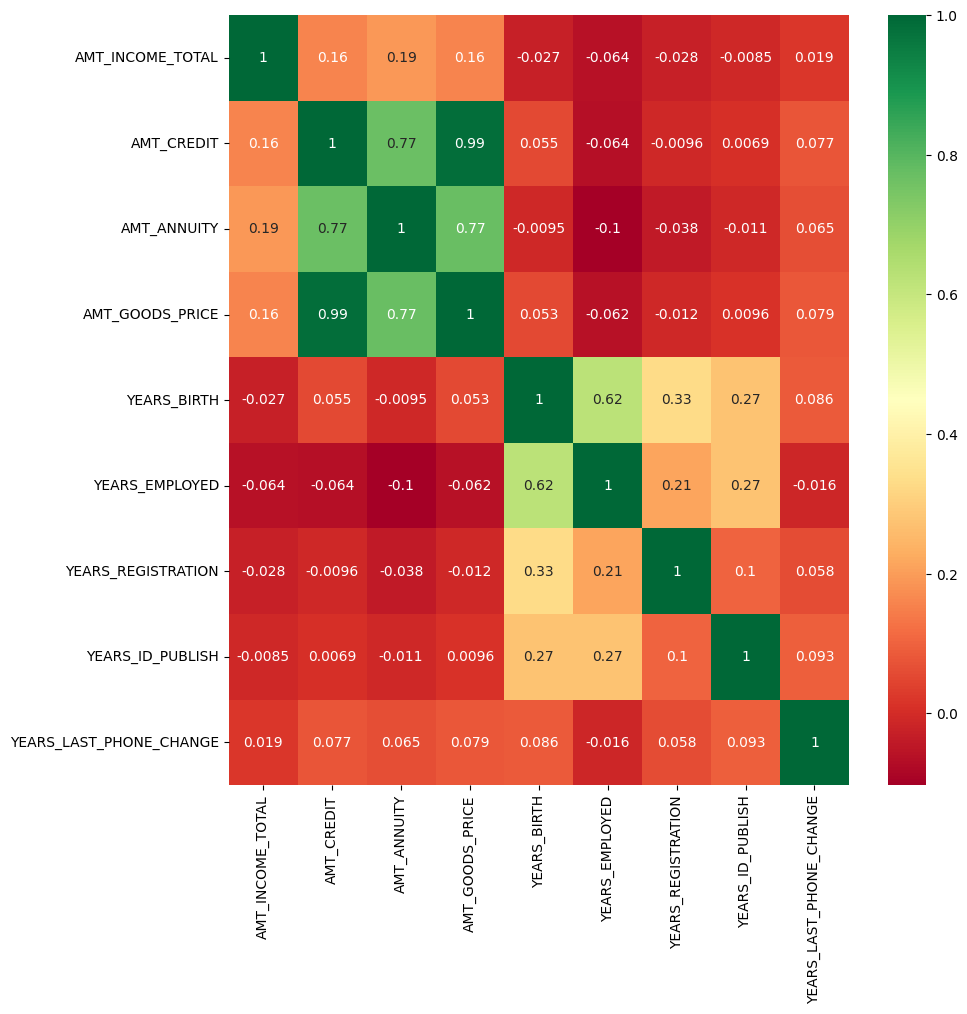

In [65]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data.corr(),annot=True,cmap="RdYlGn")

- CONCLUSION:
1. 'AMT_INCOME_TOTAL': IT HAS POSITIVE CORRELATION INDEX OF 0.16,0.19,0.16 WITH AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE RESPECTIVELY.
2. 'AMT_CREDIT': IT HAS ANEGATIVE CORRELATION INDEX OF 0.064 WITH YEARS_EMPLOYED AND POSITIVE CORRELATION INDEX OF 0.99,0.77 WITH AMT_GOODS_PRICE,AMT_ANNUITY RESPECTIVELY.
3. 'AMT_ANNUITY': IT HAS NEGATIVE CORRELATION INDEX WITH YEARS_EMPLOYED AND POSITVIVE CORRELATION INDEX OF 0.77 WITH AMT_CREDIT. 
4. 'AMT_GOODS_PRICE': POSTIVE CORRELATION INDEX WITH AMT_CREDIT, AMT_ANNUITY. 
5. 'YEARS_BIRTH': POSITIVE CORRELATION WITH YEARS_EMPLOYED,AMT_GOODS_PRICE AND NEGATIVE CORRELATION WITH AMT_ANNUITY,AMT_INCOME_TOTAL.
6. 'YEARS_EMPLOYED':NEGATIVE CORRELATION INDEX OF 0.1 WITH AMT_ANNUITY AND HAS A POSTIVE CORRELATION WITH YEARS_REGISTRATION.
7. 'YEARS_REGISTRATION':POSITIVE CORRELATION WTIH YEARS_ID_PUBLISH,YEARS_BIRTH,YEARS_EMPLOYED.
8. 'YEARS_ID_PUBLISH': POSITVE CORRELATION WITH YEARS_REGISTRATION AND NEGATIVE CORRELATION WITH AMT_INCOME_TOTAL,AMT_ANNUITY. 
9. 'YEARS_LAST_PHONE_CHANGE'NEGATIVE CORRELATION WITH YEARS_EMPLOYED AND POSITIVE CORRELATION WITH AMT_GOODS_PRICE,YEARS_ID_PUBLISH.

### SPLIT THE NUMRICAL VARIABLES BASED ON TARGET 0 AND 1 TO FIND THE CORRELATION 

In [66]:
corr_data_0 = tar_0[[ 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']]
corr_data_0

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
5                99000.0    490495.5      27517.5         454500.0   
...                  ...         ...          ...              ...   
307505          112500.0    225000.0      22050.0         225000.0   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307510          157500.0    675000.0      49117.5         675000.0   

        YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1                47               3                   3                 0   
2                53               0                  11                 7   
3                53               8                  27                 6   
4                55               8                  12                 9   
5                47               4                  13                 1   
...             ...             ...                 ...               ...   
307505           68            1025                  20                 6   
307506           26               0                  23                 5   
307507           58            1025                  12                11   
307508           42              22                  18                14   
307510           47               3                  14                 1   

        YEARS_LAST_PHONE_CHANGE  
1                             2  
2                             2  
3                             1  
4                             3  
5                             7  
...                         ...  
307505                        0  
307506                        0  
307507                        0  
307508                        5  
307510                        2  

[282686 rows x 9 columns]

In [67]:
corr_data_1 = tar_1[[ 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',  'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']]
corr_data_1

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
26              112500.0    979992.0      27076.5         702000.0   
40              202500.0   1193580.0      35028.0         855000.0   
42              135000.0    288873.0      16258.5         238500.0   
81               81000.0    252000.0      14593.5         252000.0   
...                  ...         ...          ...              ...   
307448          207000.0    450000.0      32746.5         450000.0   
307475          144000.0   1303200.0      46809.0        1125000.0   
307481          225000.0    297000.0      19975.5         297000.0   
307489          225000.0    521280.0      23089.5         450000.0   
307509          171000.0    370107.0      20205.0         319500.0   

        YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                26               1                  10                 5   
26               52               7                  18                 5   
40               49               3                   3                 2   
42               37              10                   0                12   
81               69            1025                  15                11   
...             ...             ...                 ...               ...   
307448           27               8                  23                 7   
307475           37               6                   1                13   
307481           57               8                  25                10   
307489           46               0                  23                 0   
307509           33              13                   7                 2   

        YEARS_LAST_PHONE_CHANGE  
0                             3  
26                            0  
40                            3  
42                            4  
81                            0  
...                         ...  
307448                        0  
307475                        4  
307481                        8  
307489                        0  
307509                        0  

[24825 rows x 9 columns]

<Axes: >

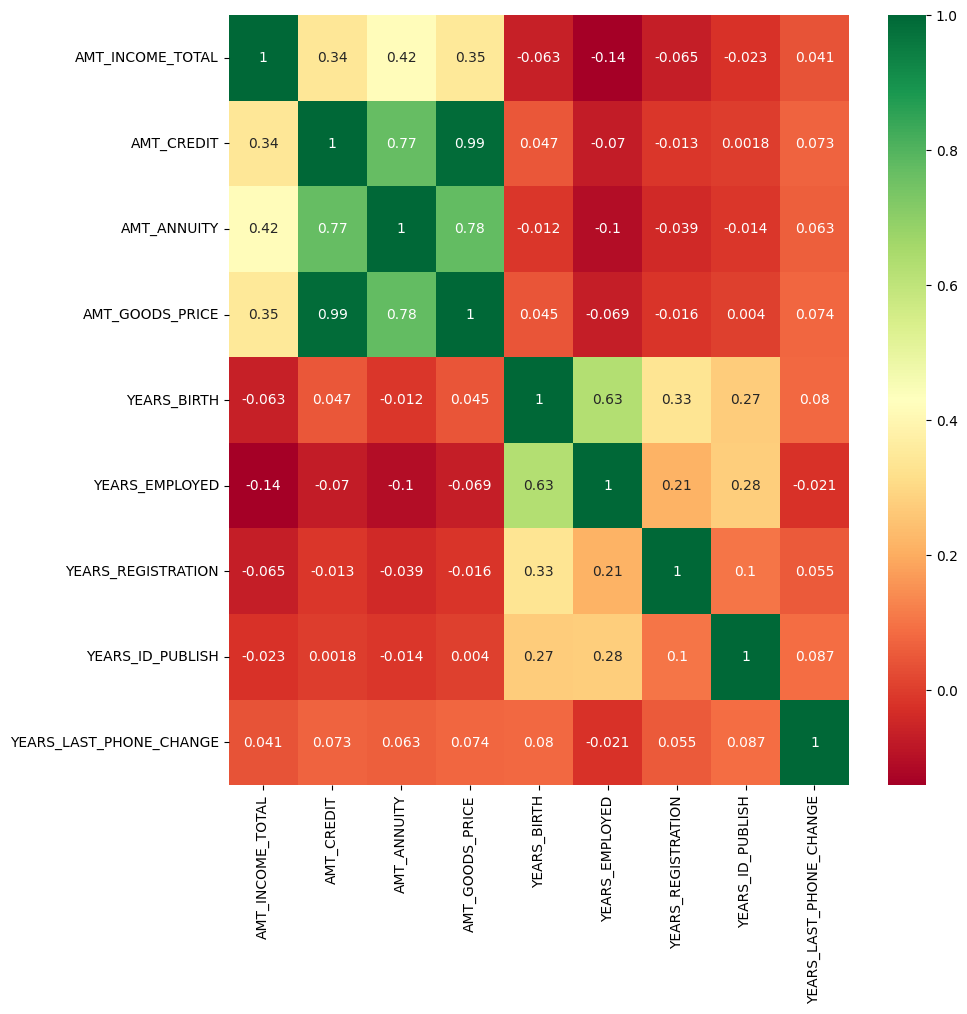

In [68]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data_0.corr(),annot=True,cmap="RdYlGn")

- COCLUSION:
1. 'AMT_INCOME_TOTAL': POSITIVE CORRELATION OF 0.34,0.42,0.35 WITH AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY.
2. 'AMT_CREDIT': STRONG POSITIVE CORRELATION INDEX OF 0.99,0.77 WITH AMT_GOODS_PRICE,AMT_ANNUITY RESPECTIVELY. 
3. 'AMT_ANNUITY': POSITVE CORRELATION INDEX OF 0.77,0.78 WITH AMT_CREDIT, AMT_GOODS_PRICES RESPECTIVELY ANN NEGATIVE WITH MOST OF THE YEARS COLUMNS.
4. 'AMT_GOODS_PRICE':  STRONG POSITIVE CORRELATION INDEX OF 0.78,0.99 WITH AMT_ANNUITY, AMT_CREDIT RESPEVTIVELY.

<Axes: >

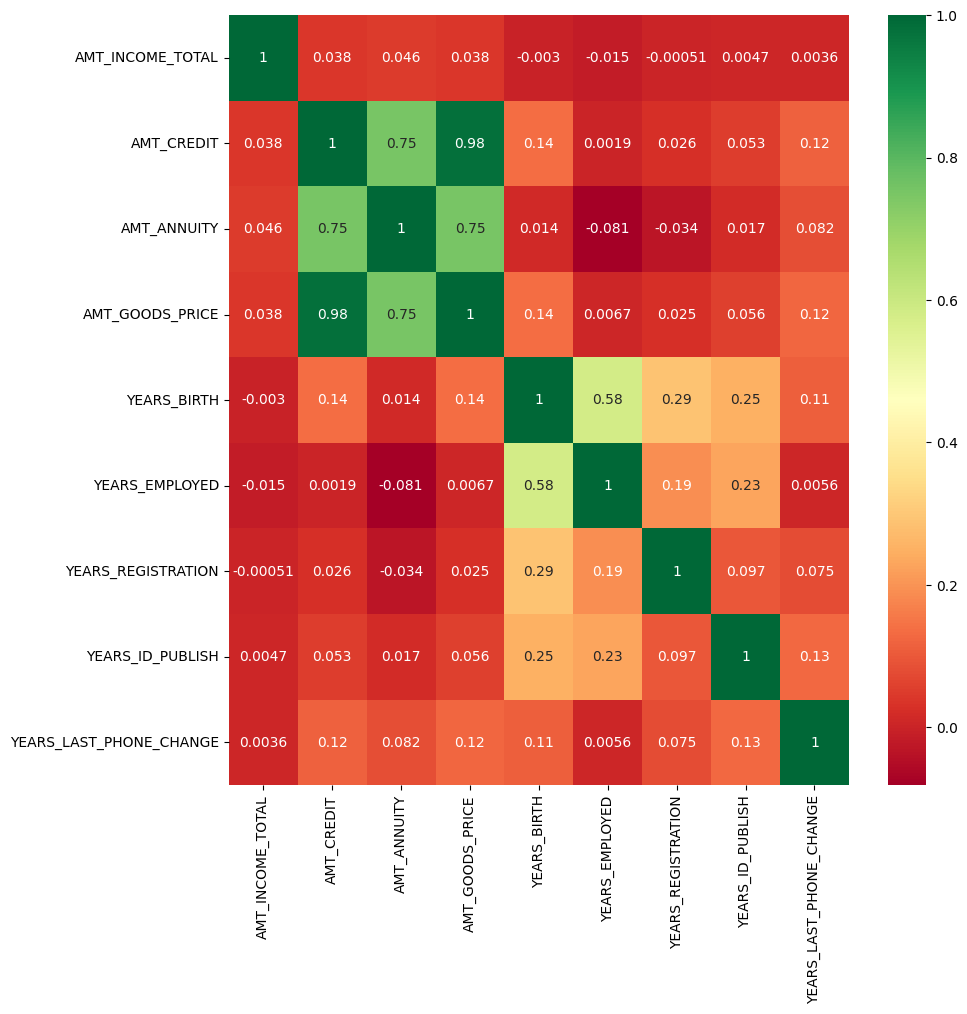

In [69]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data_1.corr(),annot=True,cmap="RdYlGn")

- CONCLUSION:
1. AMT_INCOME_TOTAL : IT IS LESS CORRELATED WITH AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE RESPECTIVELY.
2. AMT_CREDIT : HAS A STRONG POSITIVE CORRELATION OF 0.75 WITH AMT_GOODS_PRICE, AMT_ANNUITY RESPECTIVELY AND ALSO POSITIVE CORRELATION WITH OTHER YEARS COLUMNS.
3. AMT_ANNIUTY : HAS A POSITIVE CORRELATION INDEX OF 0.75 WITH AMT_GOODS_PRICE,AMT_CREDIT AND NEGATIVE WITH YEAR_EMPLOYED,YEAR_REGISTRTION.
4. AMT_GOODS_PRICE : HAS A STRONG POSITVE CORRELATION INDEX OF 0.75,0.98 WITH AMT_ANNUITY,AMT_CREDIT RESPLETIVELY AND WEAK POSITIVE CORRELATION WITH OTHER YEAR COLUMNS.

# PREVIOUS APPLICATION

In [70]:
pre_app_data = pd.read_csv("previous_application.csv")

In [71]:
pre_app_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### DATA INPECTION ON PREVIOUS APPLICATION DATASET

#### GET INFO AND SHAPE ON DATASET

In [72]:
pre_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [73]:
pre_app_data.shape

(1670214, 37)

## DATA QUALITY CHECK

### CHECK THE PERCENTAGE NULL VALUES IN THE APPLICATION DATASET

In [74]:
pre_app_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

## DROPPING COLUMNS WITH MISSING VALUES GREATER THAN 49%

In [75]:
PERCENTAGE = 49
threshold_p = int((100 - PERCENTAGE)/100 * pre_app_data.shape[0] + 1)
pre_app_df = pre_app_data.dropna(axis= 1,thresh=threshold_p)
pre_app_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4          

In [76]:
pre_app_df.shape

(1670214, 32)

### IMPUTE THE MISSING VALUES

#### CHECK THE dtype OF ANY MISSING VALUES IN APPLICATION DATASET BEFORE IMPUTING VALUES 

In [77]:
for col in pre_app_df.columns:
    if pre_app_df[col].dtypes == np.int64 or pre_app_df[col].dtypes == np.float64:
        pre_app_df[col] = pre_app_df[col].apply(lambda x : abs(x))

### VALIDATE IF ANY NULL VALUES PRESENT IN THE DATASET

In [78]:
null_cols = list(pre_app_df.columns[pre_app_df.isna().any()])
len(null_cols)

11

In [79]:
pre_app_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

### BINNING OF CONTINUOUS VARIABLES 

#### BINNNG AMT_CREDIT COLUMNS

In [80]:
pre_app_df["AMT_CREDIT_CATEGORY"] = pd.cut(pre_app_df.AMT_CREDIT,[0, 200000, 400000, 600000, 800000, 1000000],
                                          labels=["VERY LOW CREDIT", "LOW CREDIT", "MEDIUM CREDIT", "HIGH CREDIT", "VERY HIGH CREDIT"])

<Axes: xlabel='AMT_CREDIT_CATEGORY'>

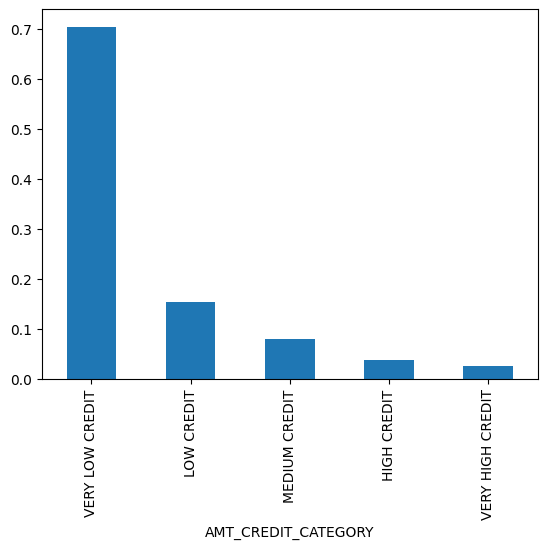

In [81]:
pre_app_df["AMT_CREDIT_CATEGORY"].value_counts(normalize=True).plot.bar()

- CONCLUSION : THE CREDIT AMOUNT OF THE APPLICANTS IS LOW(200000 TO 400000)

In [82]:
pre_app_df["AMT_GOODS_PRICE_CATEGORY"] = pd.qcut(pre_app_df.AMT_GOODS_PRICE,q=[0, 0.25, 0.45, 0.65, 0.85, 1],
                                          labels=["VERY LOW PRICE", "LOW PRICE", "MEDIUM PRICE", "HIGH PRICE", "VERY HIGH PRICE"])

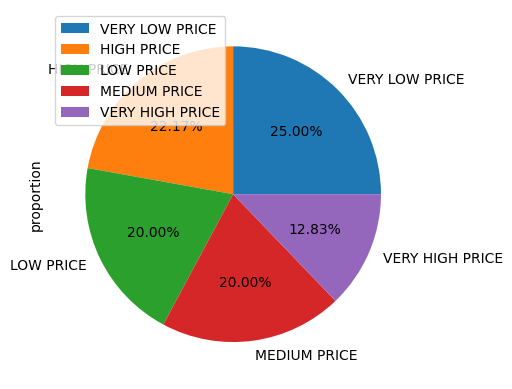

In [83]:
pre_app_df['AMT_GOODS_PRICE_CATEGORY'].value_counts(normalize=True).plot.pie(autopct = '%1.2f%%')
plt.legend()

## DATA IMBALANCE CHECK
### DIVIDING APPLICATION DATASET WITH NAME_CONTRACT_STATUS

In [101]:
# Fill with median
pre_app_df['AMT_ANNUITY'].fillna(pre_app_df['AMT_ANNUITY'].mean(), inplace=True)
pre_app_df['AMT_GOODS_PRICE'].fillna(pre_app_df['AMT_GOODS_PRICE'].median(), inplace=True)



In [102]:
approved = pre_app_df[pre_app_df.NAME_CONTRACT_STATUS == "Approved"]
cancelled = pre_app_df[pre_app_df.NAME_CONTRACT_STATUS == "Canceled"]
refused = pre_app_df[pre_app_df.NAME_CONTRACT_STATUS == "Refused"]
unused = pre_app_df[pre_app_df.NAME_CONTRACT_STATUS == "Unused offer"]

In [86]:
pre_app_df.NAME_CONTRACT_STATUS.value_counts(normalize = True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

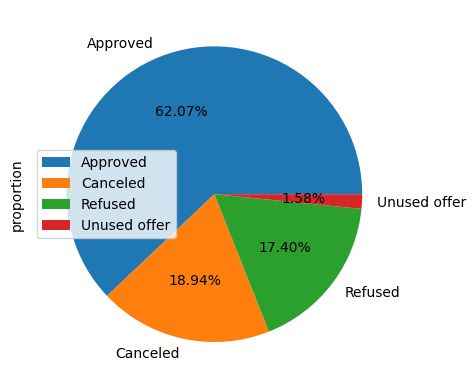

In [87]:
pre_app_df.NAME_CONTRACT_STATUS.value_counts(normalize = True).plot.pie(autopct = '%1.2f%%')
plt.legend()

- CONCLUSION : 62% APPLICANTS AVE THIER LOAN APPROVED,19% CANCELLED ,17% REFUSED AND 2% UNUSED

# UNIVARIATE ANALYSIS

In [88]:
cat_cols1 = list(pre_app_df.columns[pre_app_df.dtypes == object])
num_cols1 = list(pre_app_df.columns[pre_app_df.dtypes == np.int64]) + list(pre_app_df.columns[pre_app_df.dtypes == np.float64])

In [89]:
cat_cols1

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [90]:
num_cols1

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [91]:
cat_cols1 = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

In [92]:
num_cols1 = ['HOUR_APPR_PROCESS_START','AMT_ANNUITY','DAYS_DECISION', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT'] 

### PLOT ON CATEGORICAL COLUMNS

NAME_CONTRACT_TYPE
Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: proportion, dtype: float64
WEEKDAY_APPR_PROCESS_START
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: proportion, dtype: float64
NAME_CASH_LOAN_PURPOSE
XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment    

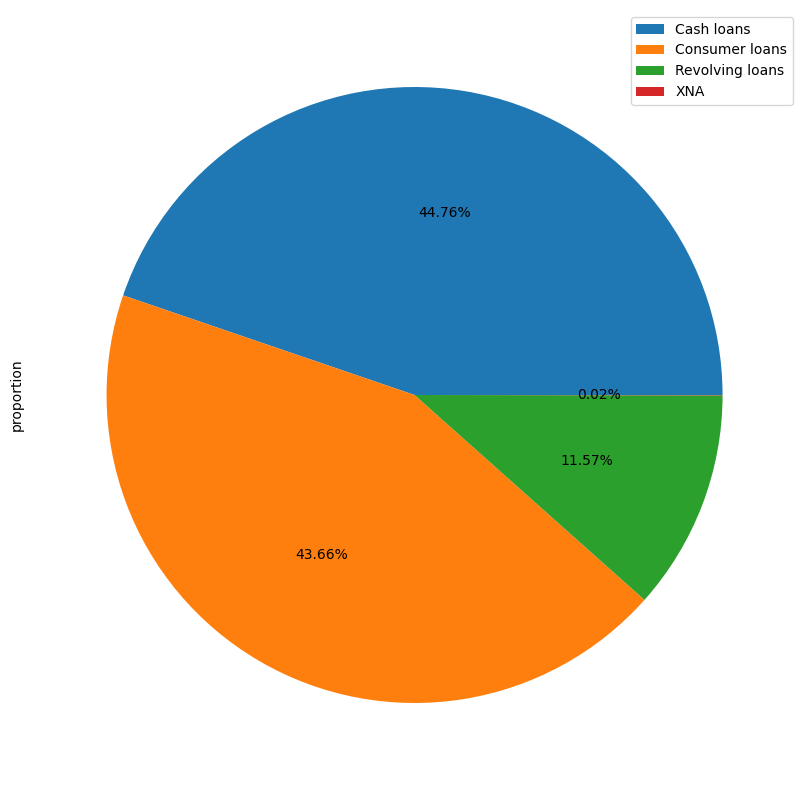

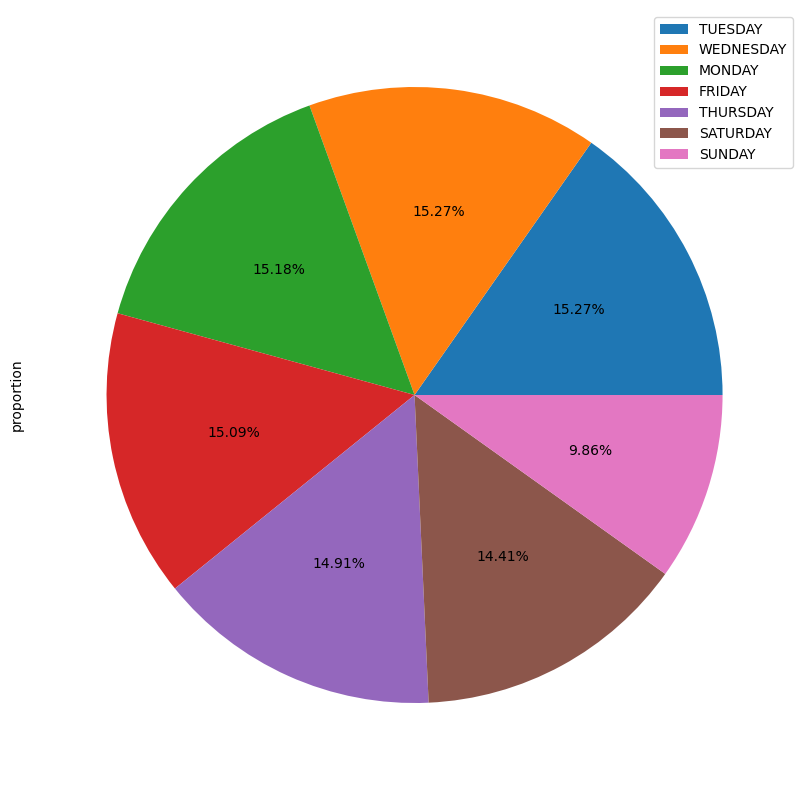

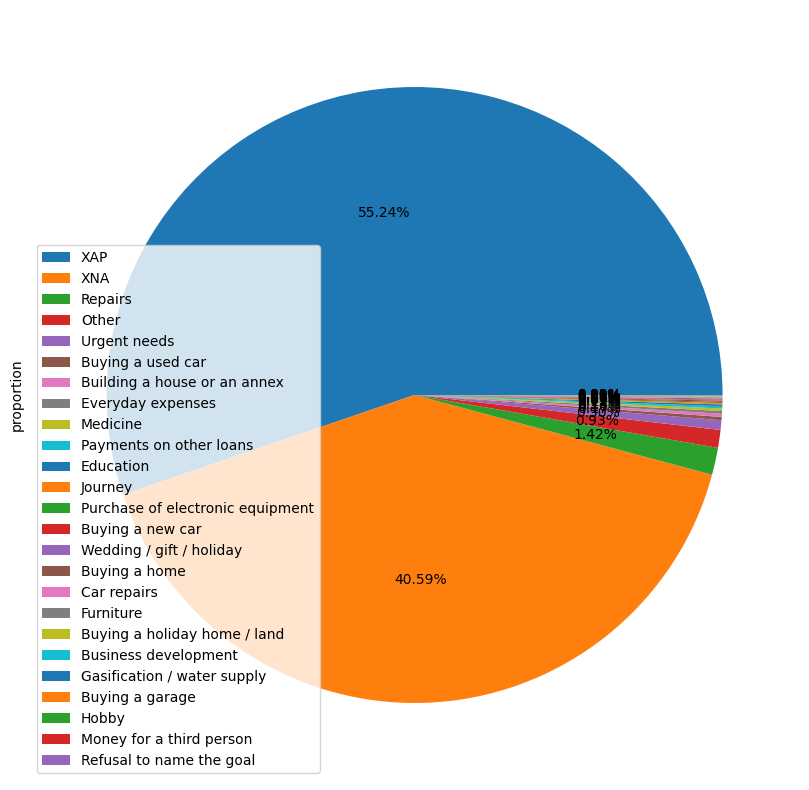

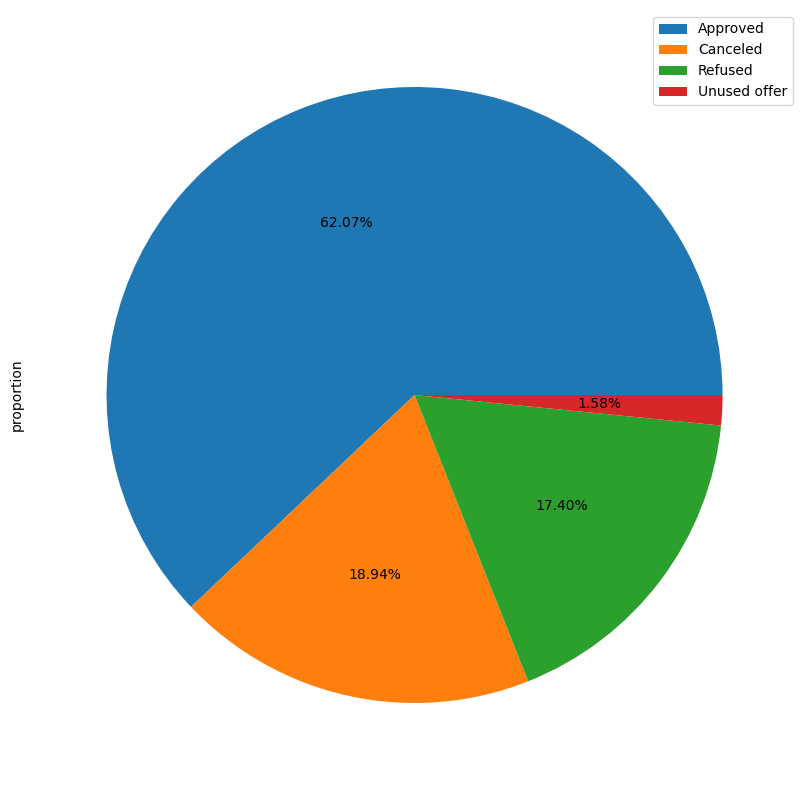

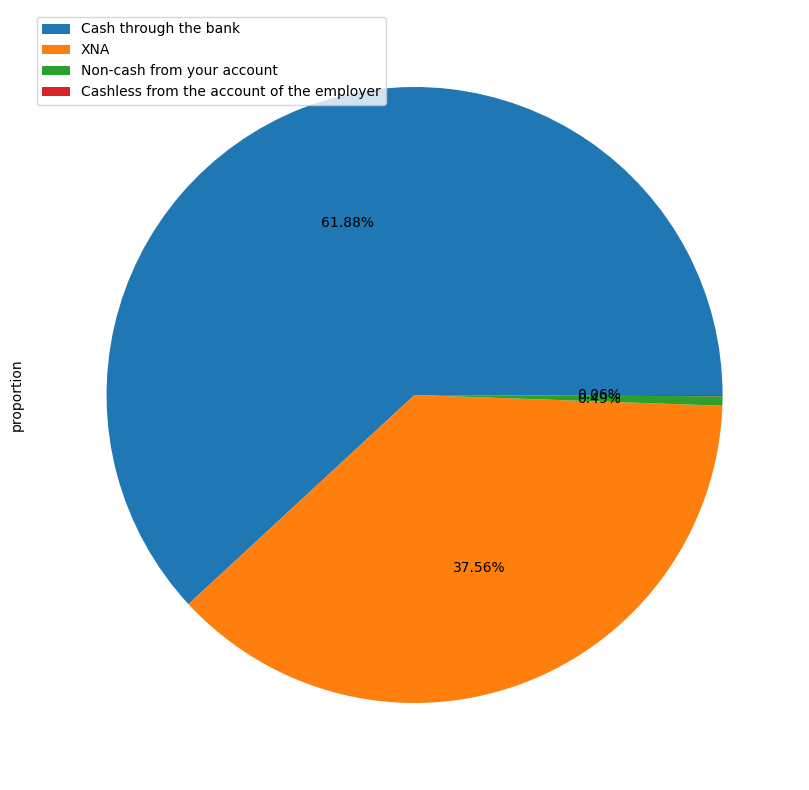

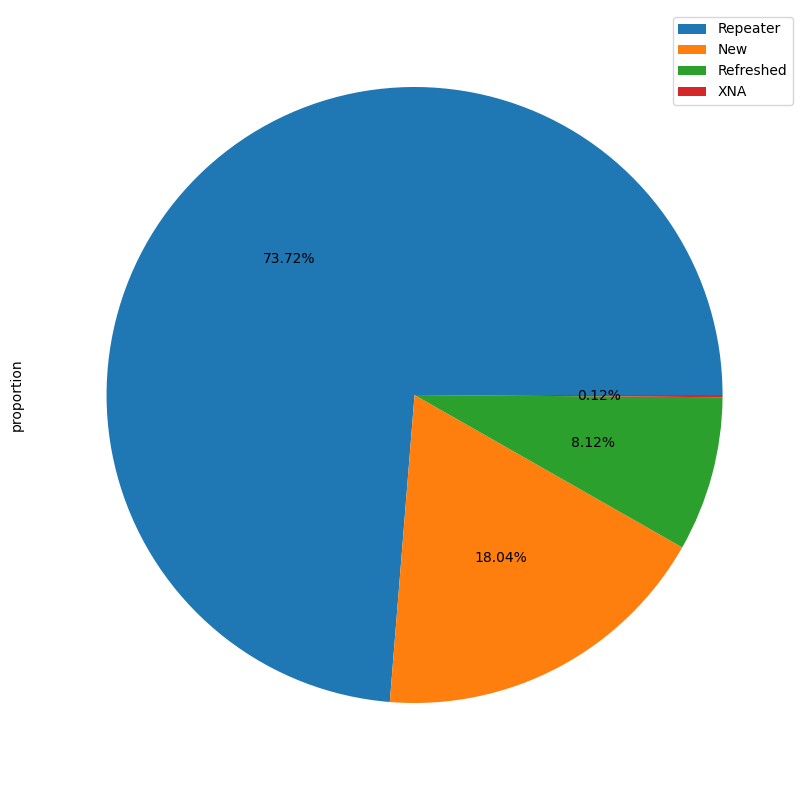

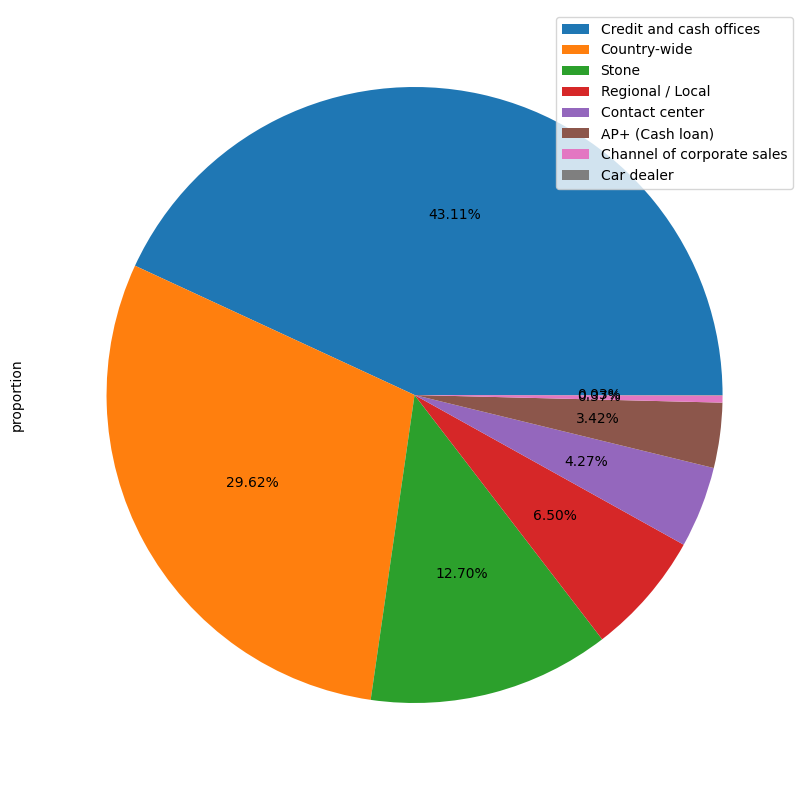

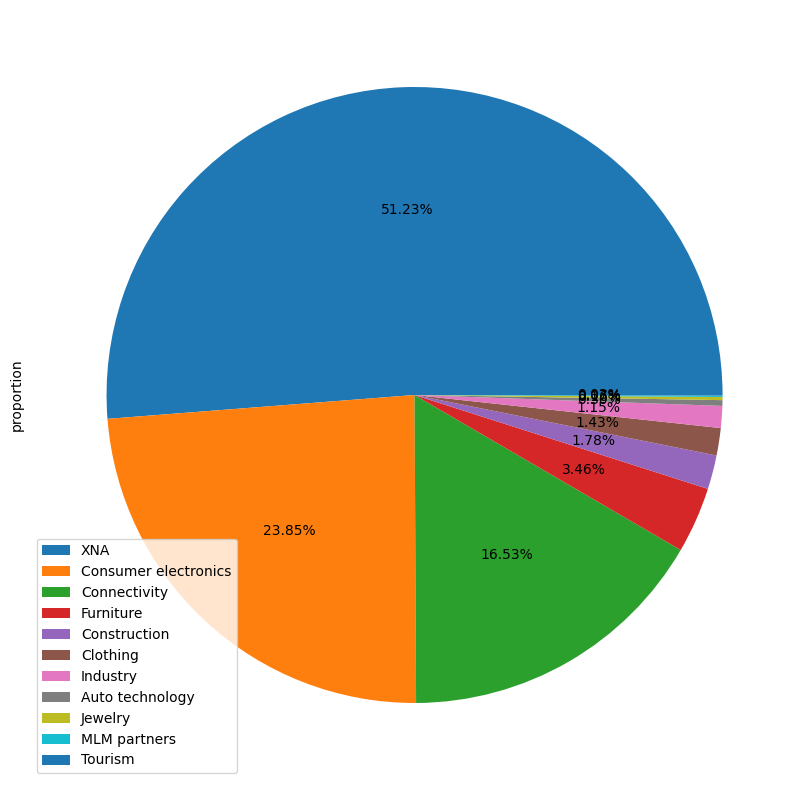

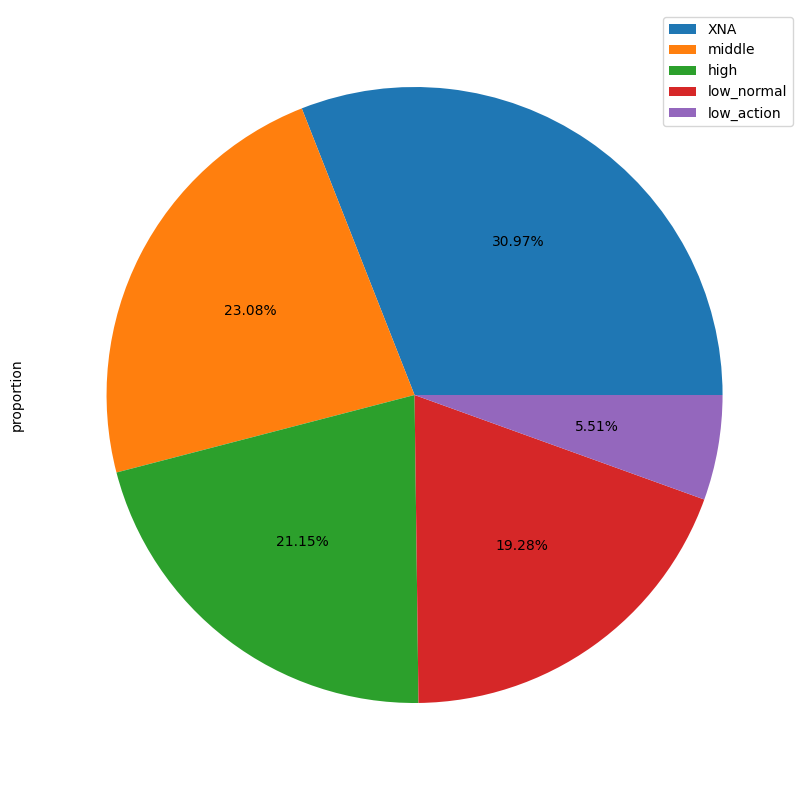

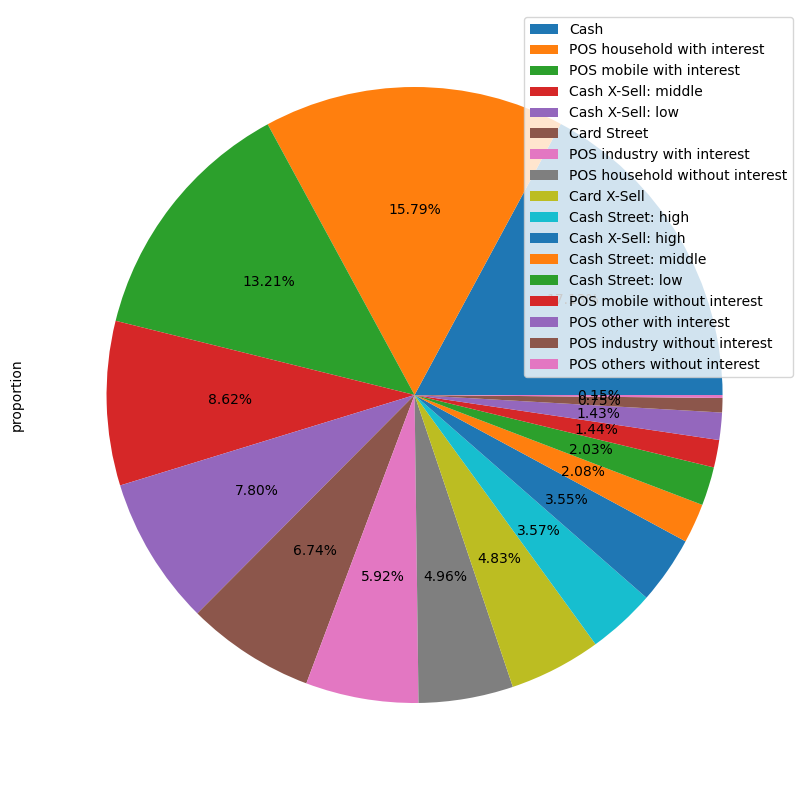

In [93]:
for col in cat_cols1:
    print(pre_app_data[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[10,10])
    pre_app_data[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct ='%1.2f%%')
    plt.legend()

- CONCLUSION :
1. 'NAME_CONTRACT_TYPE': 45% APPLICANTS RECIEVED CASH LOANS,44% APPLICANTS RECIEVED CONSUMER LOANS,12% RECIEVED REVOLVING DURING PREVIOUS APPLICATION.
2. 'WEEKDAY_APPR_PROCESS_START': ALL THE DAYS HAVE ALMOST EQUAL NUMBER OF PREVIOS LOAN APPLICATION.
3. 'NAME_CONTRACT_STATUS': 62% OF APPLICATON ARE APPROVED,19% CANCELLED,17% REFUSED AND 2% UNUSED. 
4. 'NAME_PAYMENT_TYPE':62% OF PAYMENT TYPE ARE CASH THROUGH BANK, 32% OTHER MODES.
5. 'NAME_CLIENT_TYPE':74% APPLICANTS ARE REPEATERS,18% ARE NEW APPLICANTS,8% ARE REFRESHED APPLICANTS.
6. 'CHANNEL_TYPE': 43% CHANNEL TYPE IS CREDIT AND THE CASH OFFICES ,29% ARE COUNRY WIDE.
7. 'NAME_SELLER_INDUSTRY': 51% ARE FROM OTHER INDUSTRIES,24.17% ARE FROM CONSUMER ELECRONICS,CONNECTIVITY INDUSTRY RESPECTIVELY.
8. 'NAME_YIELD_GROUP':MAJORITY OF THE YIELD GROUP ARE OTHERS.
9. 'PRODUCT_COMBINATION':MOST USED PRODUCT COMBINATION IS CASH FOLLOWED BY POS HOUSEHOLD WITH INTEREST,POS M0BILE WITH INTEREST.

### PLOT ON NUMERICAL COLUMNS

99th Percentile 20.0
_______________________________________________
99th Percentile 65758.5
_______________________________________________
99th Percentile 2835.0
_______________________________________________
99th Percentile 1350000.0
_______________________________________________
99th Percentile nan
_______________________________________________
99th Percentile 1350000.0
_______________________________________________
99th Percentile nan
_______________________________________________


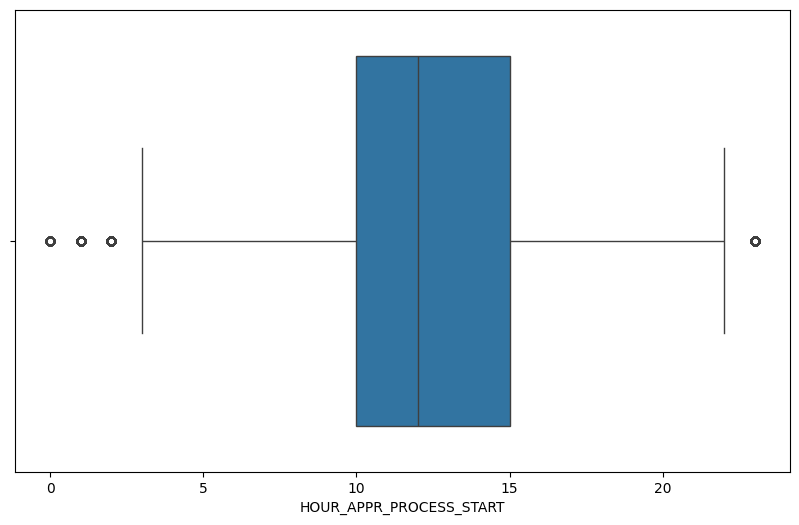

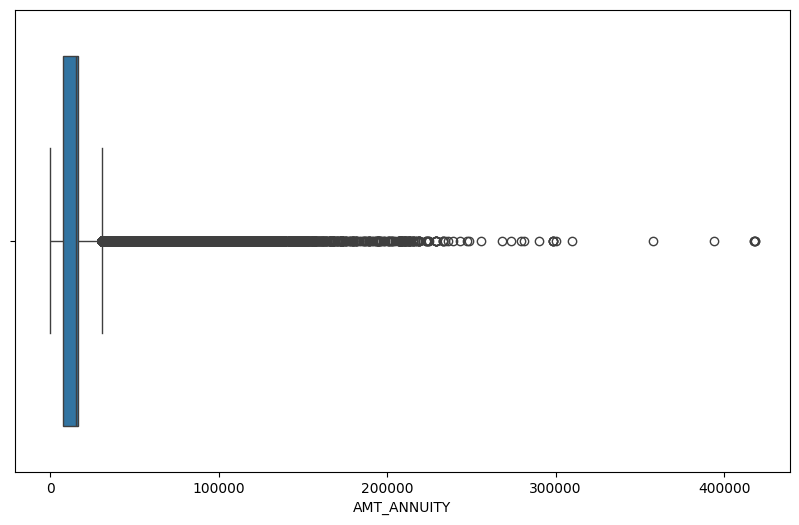

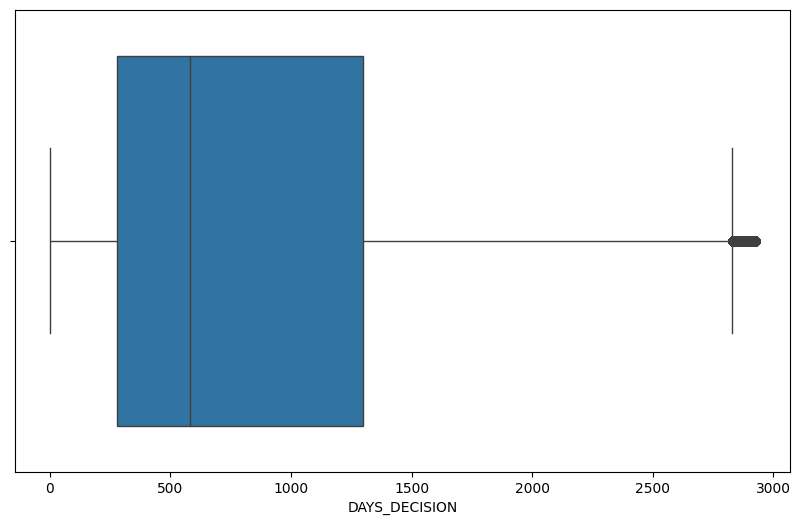

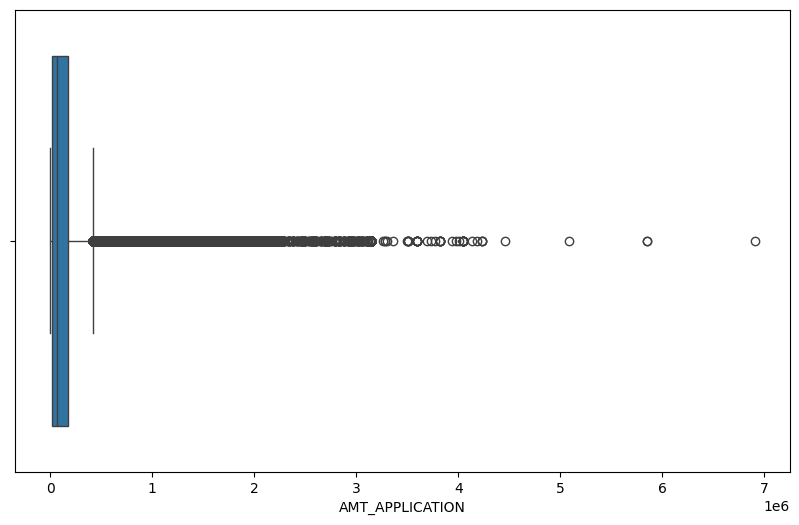

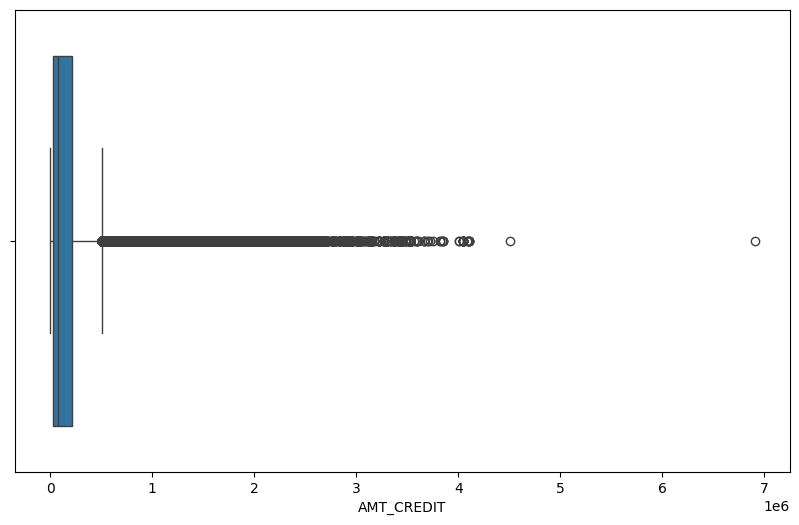

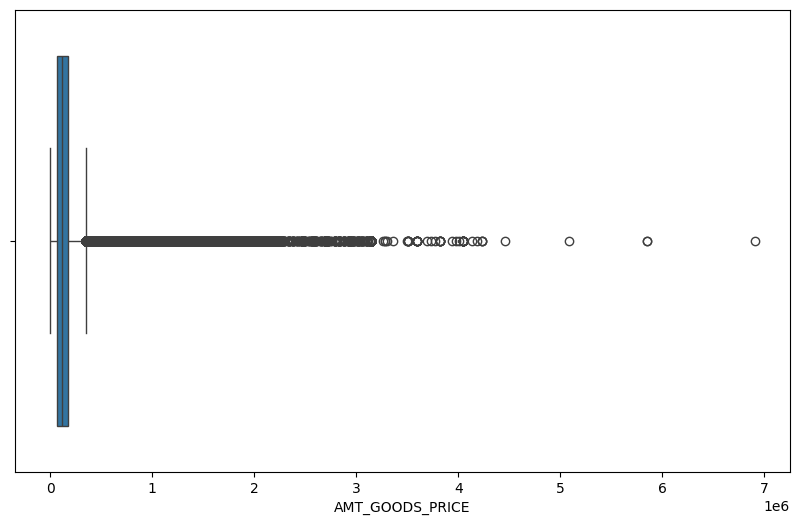

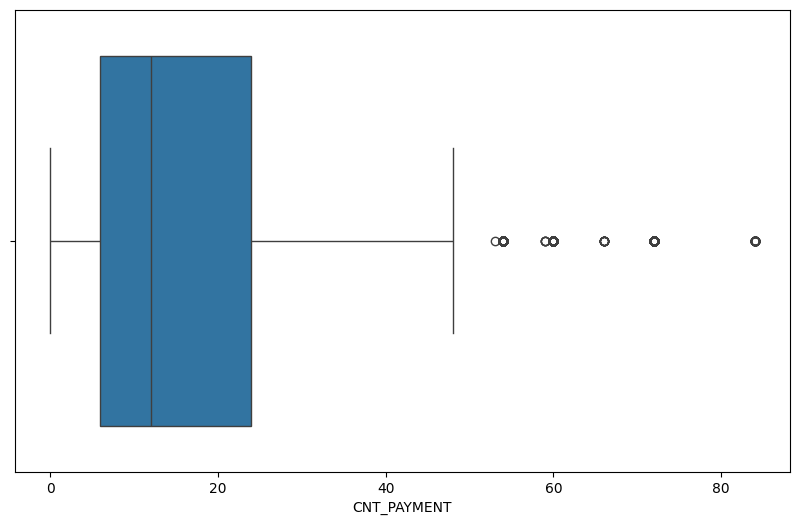

In [94]:
for col in num_cols1:
    print("99th Percentile",np.percentile(pre_app_df[col],99))
    plt.figure(figsize=[10,6])
    sns.boxplot(data=pre_app_df,x = col)
    print("_______________________________________________")

- CONCLUSION :
1. 'HOUR_APPR_PROCESS_START': HAS FEW OUTLIERS AND HAS A SMALL DIFFERENCE BETWEEN MEAN AND MEDIAN.
2. 'AMT_ANNUITY': HAS A FEW OUTLIERS AND HAS A HUGE DIFFERENCE BETWEEN 99TH PERCENTILE AND THE MAX VALUE,ALSO WE COULD SEE SIGNIFICANT VARIATION IN MEAN AND MEDIAN DUE TO OUTLIERS.
4. 'DAYS_DECISION': HAS A FEW OUTLIERS AND HAS A SMALL DIFFERENCE BETWEEN MEAN AND MEDIAN.
5. 'AMT_APPLICATION': HAS A FEW OUTLIERS AND HAS A HUGE DIFFERENCE BETWEEN 99TH PERCENTILE AND THE MAX VALUE,ALSO WE COULD SEE HUGE VARIATION IN MEAN AND MEDIAN DUE TO OUTLIERS.
6. 'AMT_CREDIT': HAS A FEW OUTLIERS AND HAS A HUGE DIFFERENCE BETWEEN 99TH PERCENTILE AND THE MAX VALUE,ALSO WE COULD SEE HUGE VARIATION IN MEAN AND MEDIAN DUE TO OUTLIERS.
7. 'AMT_GOODS_PRICE':HAS A FEW OUTLIERS AND HAS A HUGE DIFFERENCE BETWEEN 99TH PERCENTILE AND THE MAX VALUE,ALSO WE COULD SEE SIGNIFICANT VARIATION IN MEAN AND MEDIAN DUE TO OUTLIERS.
8. 'CNT_PAYMENT': HAS A FEW OUTLIERS AND HAS A SMALL DIFFERENCE BETWEEN MEAN AND MEDIAN.

## BIVARIATE AND MULTIVARIATE ANALYSIS

#### BIVARIATE ANALYSIS BETWEEN WEEKDAY_APPR_PROCESS_START VS AMT_APPLICATION 

In [95]:
week_order = ['MONDAY','TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

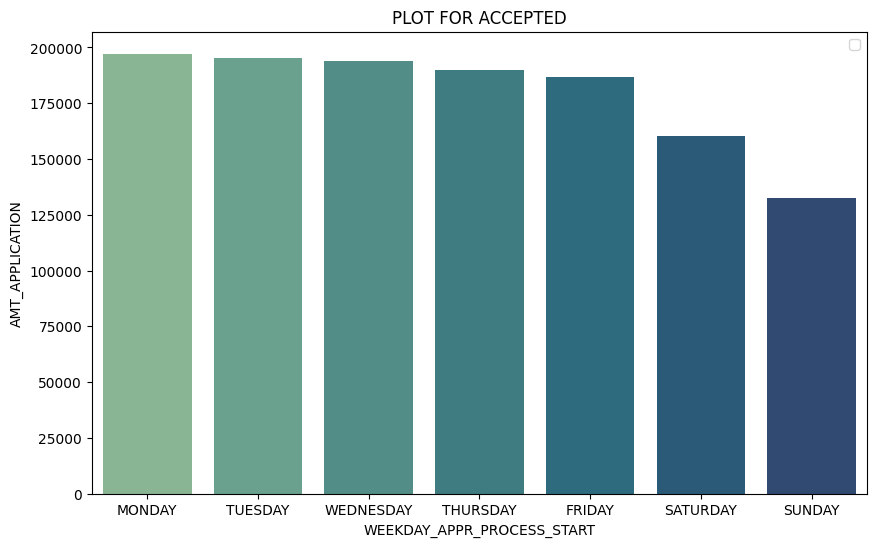

In [96]:
pallete3 = sns.color_palette("crest",n_colors=approved['WEEKDAY_APPR_PROCESS_START'].nunique())
approved = approved.groupby('WEEKDAY_APPR_PROCESS_START',as_index=False)['AMT_APPLICATION'].mean()
approved = approved.set_index('WEEKDAY_APPR_PROCESS_START').reindex(week_order).reset_index()
plt.figure(figsize=[10,6])
sns.barplot(approved,x ="WEEKDAY_APPR_PROCESS_START", y ="AMT_APPLICATION",palette=pallete3)
plt.title("PLOT FOR ACCEPTED")
plt.legend()

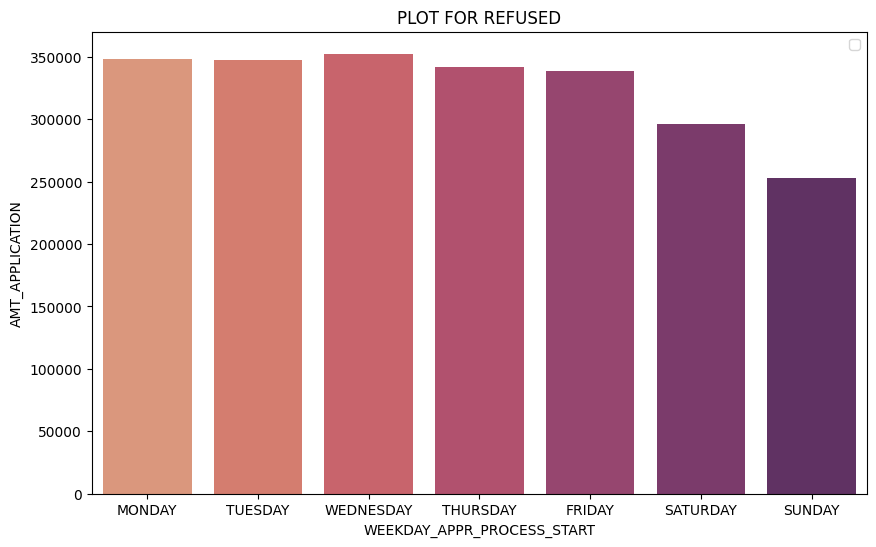

In [97]:
pallete3 = sns.color_palette("flare",n_colors=approved['WEEKDAY_APPR_PROCESS_START'].nunique())
refused = refused.groupby('WEEKDAY_APPR_PROCESS_START',as_index=False)["AMT_APPLICATION"].mean()
refused = refused.set_index('WEEKDAY_APPR_PROCESS_START').reindex(week_order).reset_index()
plt.figure(figsize= [10,6])
sns.barplot(refused,x ="WEEKDAY_APPR_PROCESS_START", y ="AMT_APPLICATION",palette=pallete3)
plt.title("PLOT FOR REFUSED")
plt.legend()

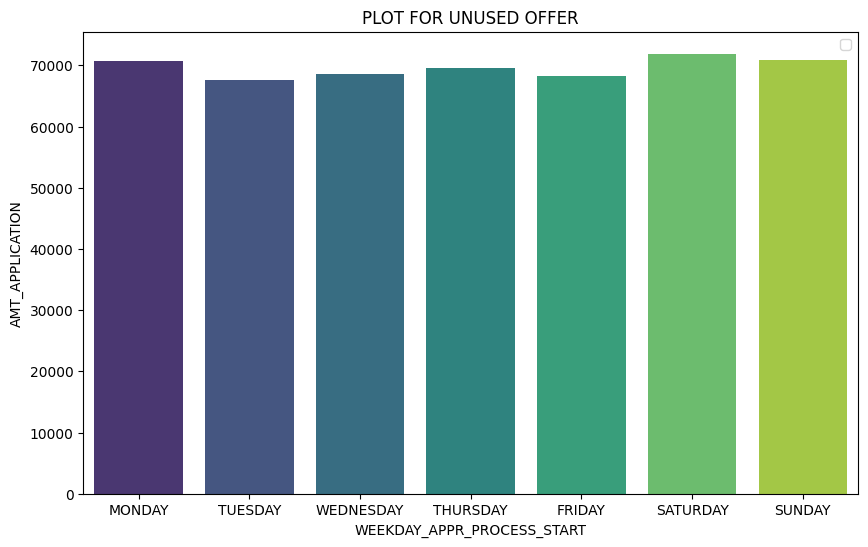

In [98]:
pallete3 = sns.color_palette("viridis",n_colors=approved['WEEKDAY_APPR_PROCESS_START'].nunique())
unused = unused.groupby('WEEKDAY_APPR_PROCESS_START',as_index=False)["AMT_APPLICATION"].mean()
unused = unused.set_index('WEEKDAY_APPR_PROCESS_START').reindex(week_order).reset_index()
plt.figure(figsize= [10,6])
sns.barplot(unused,x ="WEEKDAY_APPR_PROCESS_START", y ="AMT_APPLICATION",palette=pallete3)
plt.title("PLOT FOR UNUSED OFFER")
plt.legend()

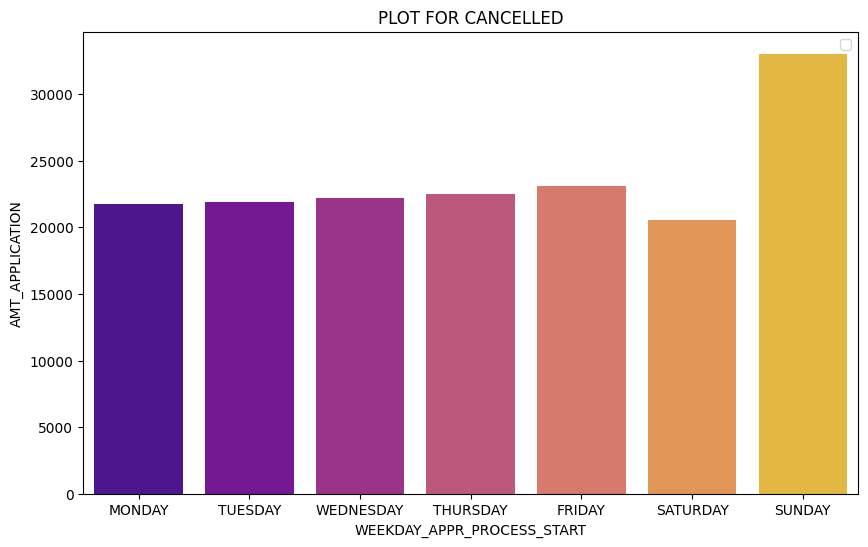

In [99]:
pallete3 = sns.color_palette("plasma",n_colors=approved['WEEKDAY_APPR_PROCESS_START'].nunique())
cancelled = cancelled.groupby('WEEKDAY_APPR_PROCESS_START',as_index=False)["AMT_APPLICATION"].mean()
cancelled = cancelled.set_index('WEEKDAY_APPR_PROCESS_START').reindex(week_order).reset_index()
plt.figure(figsize= [10,6])
sns.barplot(data=cancelled,x ="WEEKDAY_APPR_PROCESS_START", y ="AMT_APPLICATION",palette=pallete3)
plt.title("PLOT FOR CANCELLED")
plt.legend()

#### BIVARIATE ANALYSIS BETWEEN AMT_ANNUITY VS AMT_GOODS_PRICE

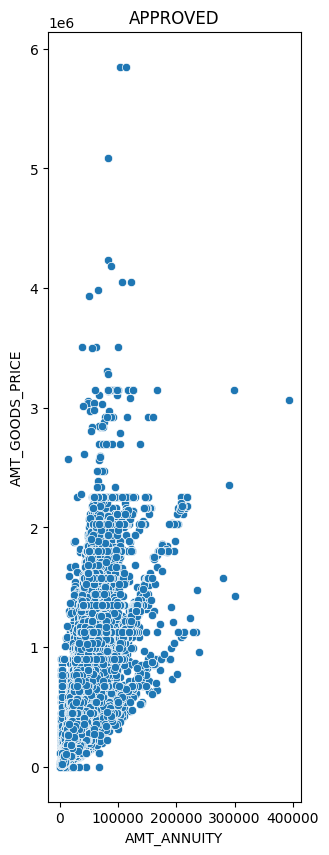

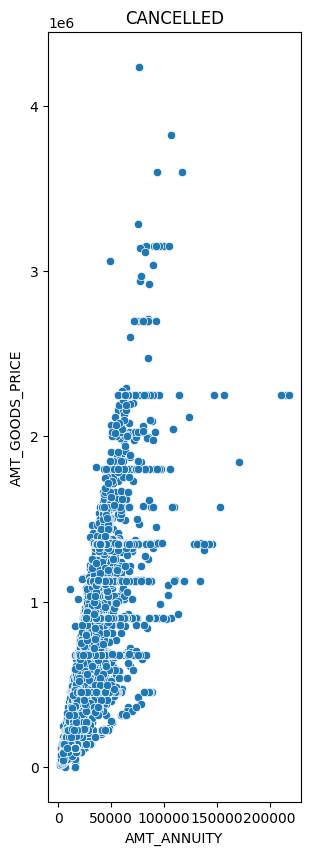

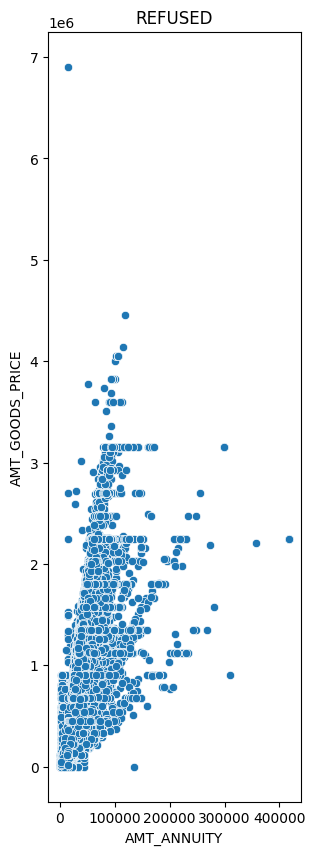

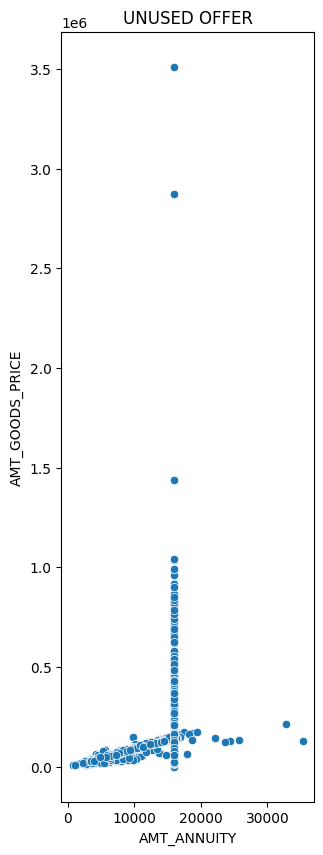

<Figure size 640x480 with 0 Axes>

In [103]:
plt.figure(figsize=[15,10])

plt.subplot(1,4,1)
plt.title("APPROVED")
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=approved)
plt.show()
plt.figure(figsize=[15,10])
plt.subplot(1,4,2)
plt.title("CANCELLED")
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=cancelled)
plt.show()
plt.figure(figsize=[15,10])
plt.subplot(1,4,3)
plt.title("REFUSED")
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=refused)
plt.show()
plt.figure(figsize=[15,10])
plt.subplot(1,4,4)
plt.title("UNUSED OFFER")
sns.scatterplot(x='AMT_ANNUITY', y='AMT_GOODS_PRICE', data=unused)
plt.show()
plt.tight_layout()

- CONCLUSION:
1. For loan status as Approved,Refused,Cancelled Amount of AMT_ANNUITY increases with AMT_GOODS_PRICE.
2. For loan status as Refused AMT_ANNUITY and AMT_GOODS_PRICE has no linear relationship.

### Co-relation between Numerical Columns

In [104]:
corr_approved = approved[['AMT_ANNUITY','DAYS_DECISION', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']]
corr_cancelled = cancelled[['AMT_ANNUITY','DAYS_DECISION', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']]
corr_refused = refused[['AMT_ANNUITY','DAYS_DECISION', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']]
corr_unused = unused[['AMT_ANNUITY','DAYS_DECISION', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']]

### Co-relation tor Numerical columns for Approved

Text(0.5, 1.0, 'HEATMAP PLOT FOR APPROVED')

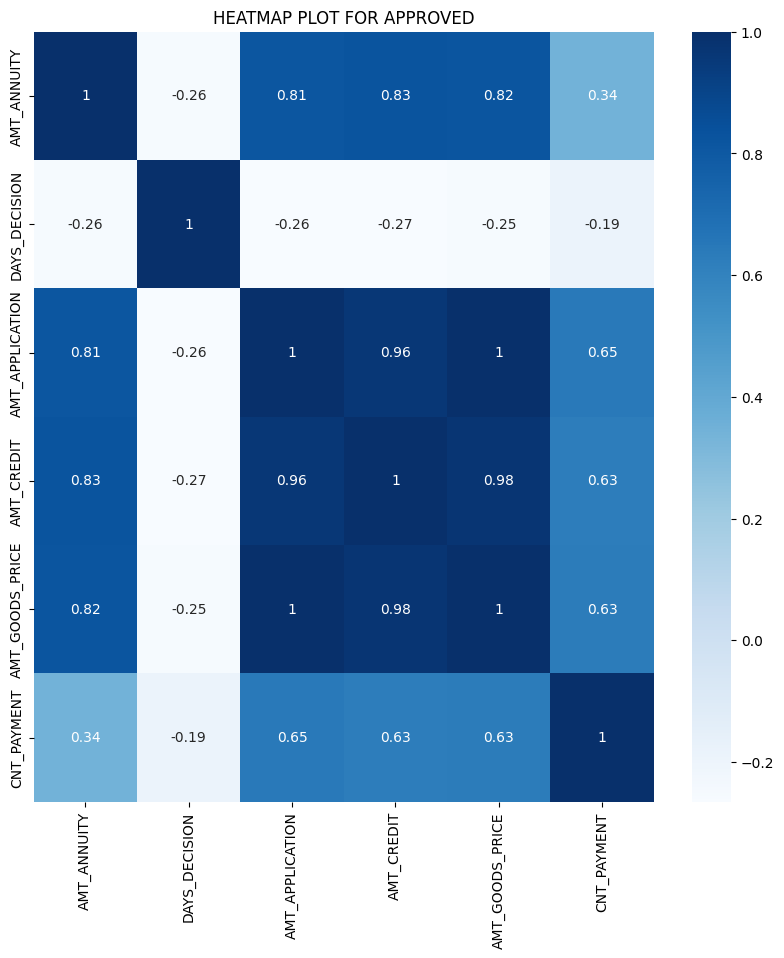

In [105]:
plt.figure(figsize=[10,10])
sns.heatmap(data=corr_approved.corr(),annot=True,cmap="Blues")
plt.title("HEATMAP PLOT FOR APPROVED")

- Conclusion:
1. AMT_APPLICATION has higher corelation with AMT_CREDIT and AMT_GOOOS_PRICE,AMT_ANNUITY
2. DAYS_DECISION has negative corelation with AMT_APPLICATION,CNT_PAYMENT,AMT_ANNUITY

### Co-relation tor Numerical columns for Unused Order

Text(0.5, 1.0, 'HEATMAP PLOT FOR UNUSED ORDER')

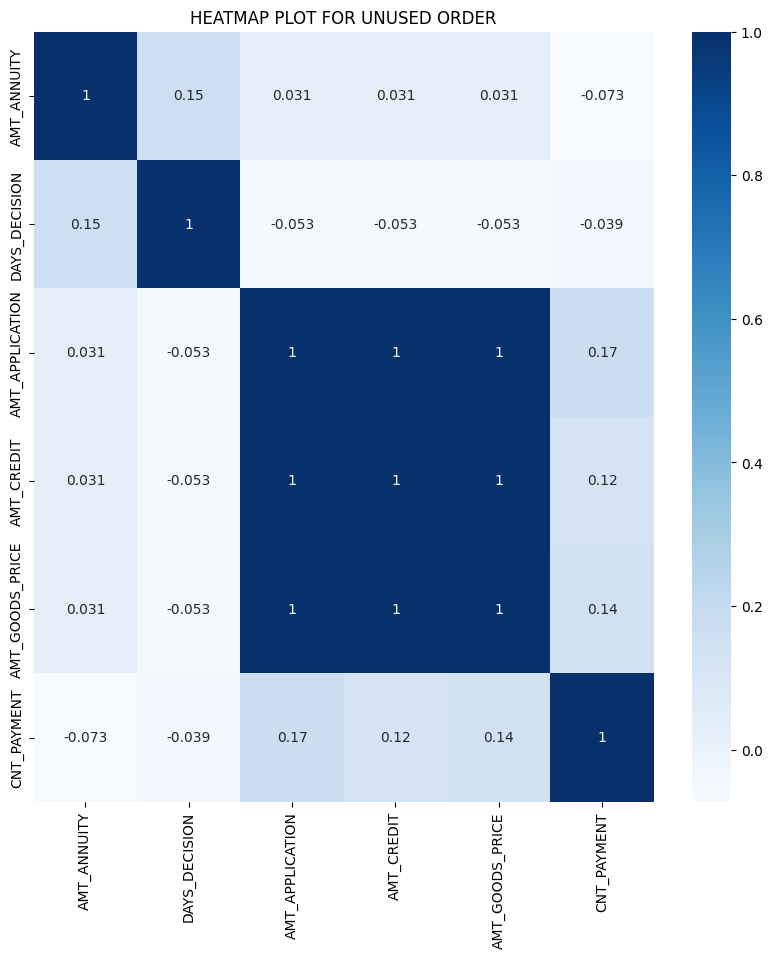

In [106]:
plt.figure(figsize=[10,10])
sns.heatmap(data=corr_unused.corr(),annot=True,cmap="Blues")
plt.title("HEATMAP PLOT FOR UNUSED ORDER")

Conclusion For Unused Category:
1. AMT_APPLICAIION has higher corelation with AMT_CREDIT and AMT_GOODS_PRICE
2. DAYS_DECISION and CNT_PAYMENT has negative Corelation with AMT_APPLTCATION,AMT_GOODS_PRICE,AMT_CREDIT

### Co-relation tor Numerical columns for Cancelled

Text(0.5, 1.0, 'HEATMAP PLOT FOR CANCELLED')

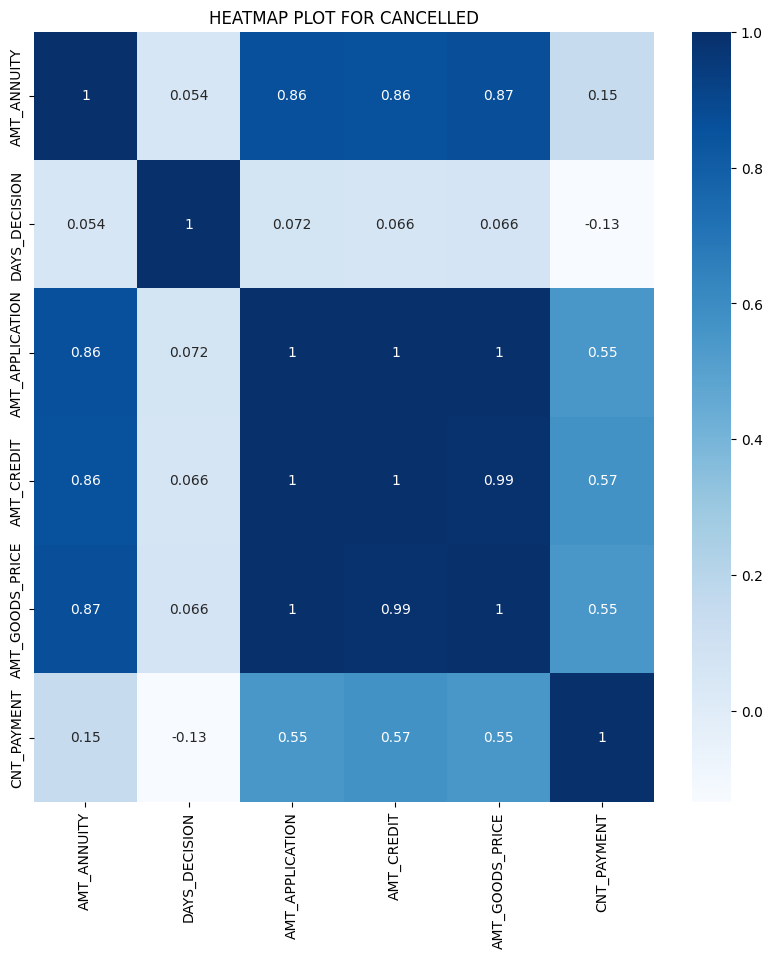

In [107]:
plt.figure(figsize=[10,10])
sns.heatmap(data=corr_cancelled.corr(),annot=True,cmap="Blues")
plt.title("HEATMAP PLOT FOR CANCELLED")

Conclusion For Cancelled Category:
1. AMT_APPLICATION has higher Corelation AMT_CREDIT and AMT_GOOD_PRICE
2. DAYS_DECISION has positive Corelation with AMT_GOODS_PRICE, AMT_CREDIT, AMT_APPLICATION

### Co-relation tor Numerical columns for Refused

Text(0.5, 1.0, 'HEATMAP PLOT FOR REFUSED')

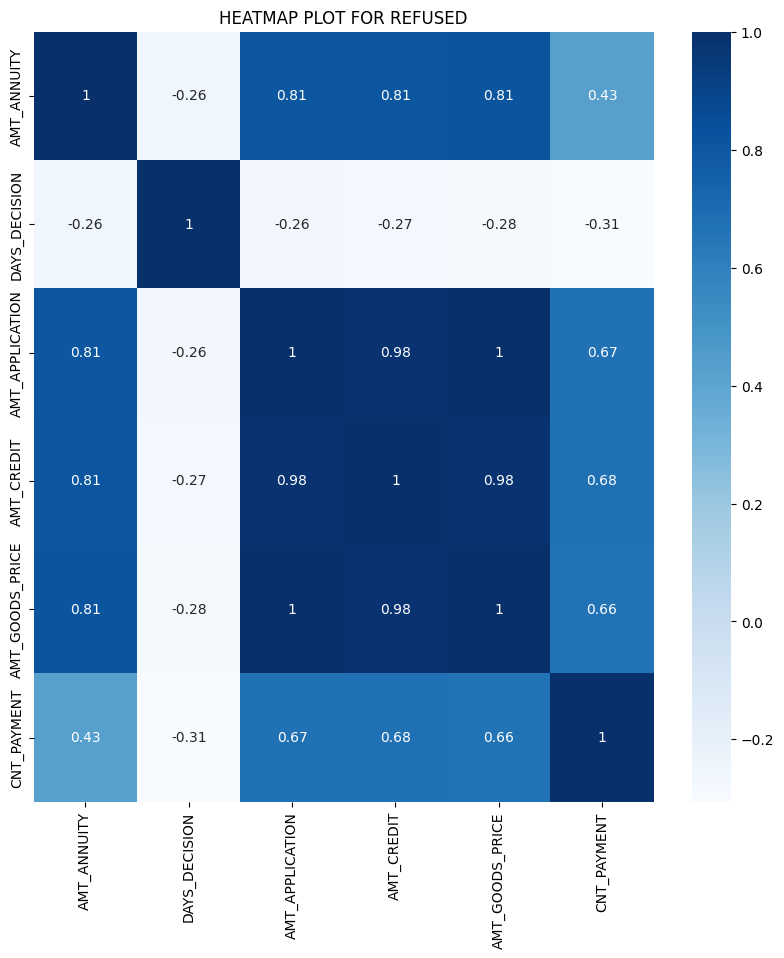

In [108]:
plt.figure(figsize=[10,10])
sns.heatmap(data=corr_refused.corr(),annot=True,cmap="Blues")
plt.title("HEATMAP PLOT FOR REFUSED")

• Conclusion For Refused Category:
1. AMT_APPLICATION has higher corelation with AMT_CREDIT and AMT_ANNUITY
2. DAYS_DECISION has negative corelation with AMT_GOODS_PRICE, AMT_CREDIT, AMT_APPLICATION, CNT_PAYMENT, AMT_ANNUITY

### Merge the Application and Previous Application DataFrames

In [109]:
merge_df = app_df.merge(pre_app_df,on=['SK_ID_CURR'],how='left')
merge_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406597.5   
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
...                 ...           ...               ...           ...   
1430150               N             0          157500.0      675000.0   
1430151               N             0          157500.0      675000.0   
1430152               N             0          157500.0      675000.0   
1430153               N             0          157500.0      675000.0   
1430154               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE  \
0              24700.5           351000.0   Unaccompanied   
1              35698.5          1129500.0          Family   
2              35698.5          1129500.0          Family   
3              35698.5          1129500.0          Family   
4               6750.0           135000.0   Unaccompanied   
...                ...                ...             ...   
1430150        49117.5           675000.0   Unaccompanied   
1430151        49117.5           675000.0   Unaccompanied   
1430152        49117.5           675000.0   Unaccompanied   
1430153        49117.5           675000.0   Unaccompanied   
1430154        49117.5           675000.0   Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1430150  Commercial associate               Higher education   
1430151  Commercial associate               Higher education   
1430152  Commercial associate               Higher education   
1430153  Commercial associate               Higher education   
1430154  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
...                       ...                ...                         ...   
1430150               Married  House / apartment                    0.046220   
1430151               Married  House / apartment                 

In [110]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 113 entries, SK_ID_CURR to AMT_GOODS_PRICE_CATEGORY
dtypes: category(4), float64(36), int64(46), object(27)
memory usage: 1.2+ GB


### Filtering required columns for our Analysis

In [111]:
for col in merge_df:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col, axis=1, inplace= True)

In [112]:
merge_df.shape

(1430155, 84)

In [113]:
res1 = pd.pivot_table(data=merge_df, index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"],columns=["NAME_CONTRACT_STATUS"],values="TARGET",aggfunc='mean')
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

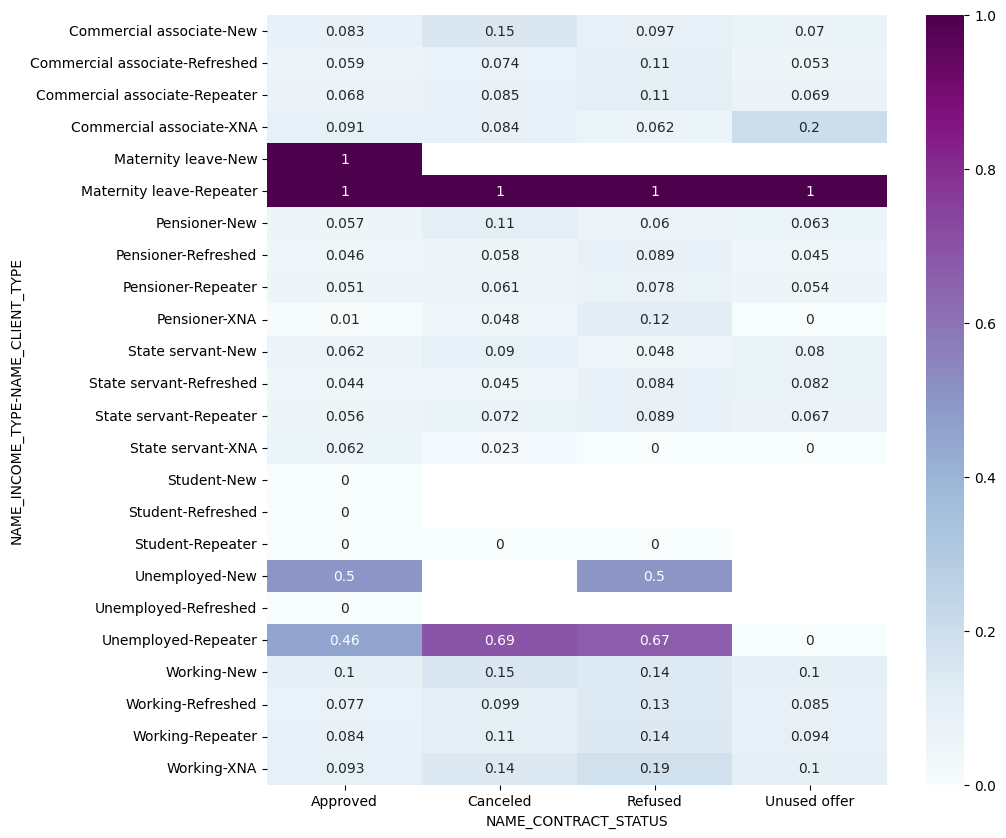

In [114]:
plt.figure(figsize=[10,10])
sns.heatmap(res1,annot=True,cmap="BuPu")
plt.show()

- CONCLUSION:
1.  Applicants with Income type Maternity leave and client type New are havtng more chances of getting the loan approved
2. Applicants with Income type Maternity leave, Unemployed and client type Repeater are having getting the loan cancelled
3. Applicants with Income type Maternity leave, Unemployed and client type Repeater are having getting the loan Refused
4. Applicants with income type Maternity leave and client type Repeater. Working and client type New are not able to utiltize the Bank's offer

In [115]:
res2 = pd.pivot_table(data=merge_df, index=["CODE_GENDER","NAME_SELLER_INDUSTRY"],columns=["TARGET"],values="AMT_GOODS_PRICE_x",aggfunc='sum')
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

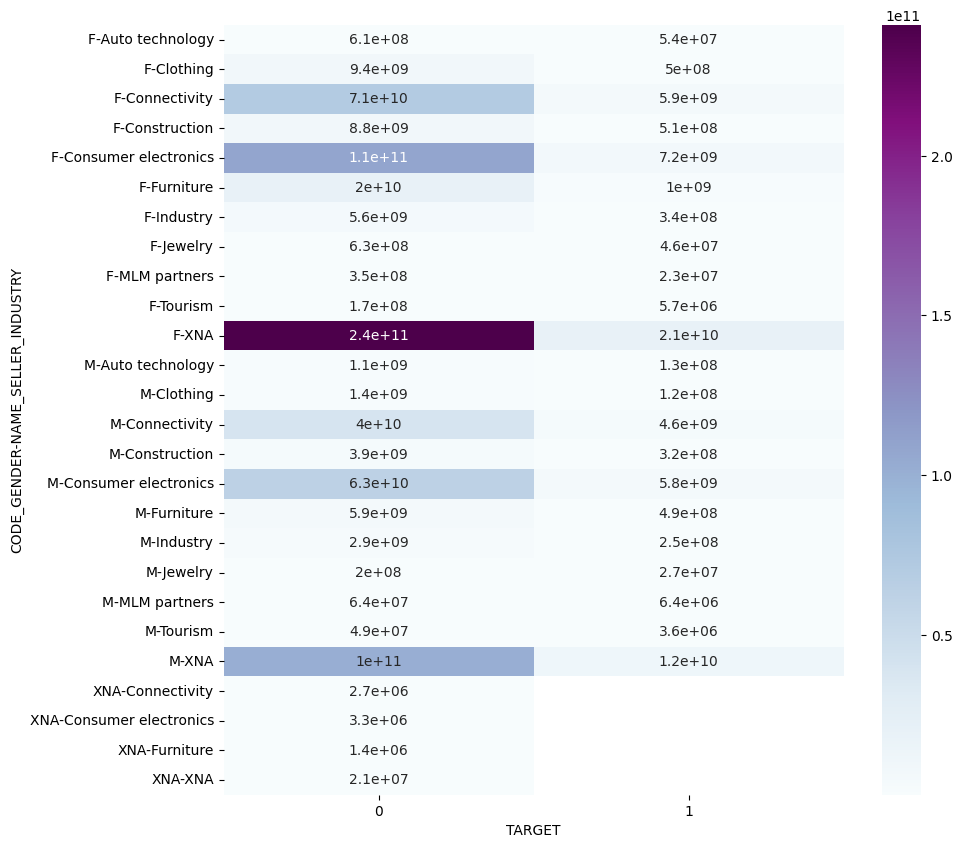

In [116]:
plt.figure(figsize=[10,10])
sns.heatmap(res2,annot=True,cmap="BuPu")
plt.show()

## IMPORTING IMPORTANT LIBRARIES FOR TRAINING THE MODEL

In [117]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [118]:
merge_df.to_csv('merged_data.csv', index=False)


In [119]:

file_path = r'E:\downloads 2\New folder\merged_data.csv'


merge_df.to_csv(file_path, index=False)

print(f"File saved successfully at: {file_path}")


File saved successfully at: E:\downloads 2\New folder\merged_data.csv


In [120]:
merger= pd.read_csv('merged_data.csv')

In [121]:
import pandas as pd

# Define the columns you want to keep
columns_to_keep = [
    "CODE_GENDER", "NAME_FAMILY_STATUS", "CNT_CHILDREN", "CNT_FAM_MEMBERS",
    "NAME_EDUCATION_TYPE", "NAME_INCOME_TYPE", "AMT_INCOME_TOTAL", "AMT_CREDIT_x",
    "AMT_APPLICATION", "AMT_CREDIT_y", "EXT_SOURCE_3", "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "NAME_HOUSING_TYPE",
    "AMT_GOODS_PRICE_x", "NAME_CONTRACT_STATUS", "CNT_PAYMENT"
]

# Create an empty DataFrame to hold filtered data
filtered_data = pd.DataFrame()

# Process the file in chunks
chunk_size = 100000  # Number of rows per chunk
for chunk in pd.read_csv("merged_data.csv", chunksize=chunk_size, usecols=columns_to_keep):
    filtered_data = pd.concat([filtered_data, chunk], ignore_index=True)

# Save the filtered DataFrame to a new CSV file
filtered_data.to_csv("filtered_data.csv", index=False)

print("Filtered CSV file created: LOAN_data.csv")


Filtered CSV file created: LOAN_data.csv


In [124]:
print(merger.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREA